In [3]:
from F1_library import libraryF1dataNotebook as libraryDataF1
import pandas as pd
import fastf1 as ff1

# FORMULA 1 PIRELLI GRAN PREMIO D'ITALIA 2025
The Italian Grand Prix (Italian: Gran Premio d'Italia) is the fifth oldest national motor racing Grand Prix (after the French Grand Prix, the United States Grand Prix, the Spanish Grand Prix and the Russian Grand Prix), having been held since 1921. Since 2013, it has been the Grand Prix held the most times, with 93 editions as of 2023. It is one of the two Grands Prix (along with the British) which has run as an event of the Formula One World Championship Grands Prix every season, continuously since the championship was introduced in 1950. Every Formula One Italian Grand Prix in the World Championship era has been held at Monza except in 1980, when it was held at Imola.

The Italian Grand Prix counted toward the World Manufacturers' Championship from 1925 to 1928 and toward the European Championship from 1931 to 1932 and from 1935 to 1938. It was additionally designated the European Grand Prix seven times between 1923 and 1967, when this title was an honorary designation given each year to one Grand Prix race in Europe. Four editions before the World Championship were held in places other than Monza: Montichiari (1921), Livorno (1937), Milan (1947) and Turin (1948).

The event is due to take place at the Monza Circuit until at least 2025.
Source: Wikipedia

Analyzed by Franccy del Piero Sambrano Ganoza

## Obtain session information

In [4]:
libraryDataF1.obtain_information('sessions',year=2025,country_acronym='ITA').query("circuit_short_name == 'Monza'")

meeting_key  session_key location                 date_start  \
5         1268         9905    Monza  2025-09-05T11:30:00+00:00   
6         1268         9906    Monza  2025-09-05T15:00:00+00:00   
7         1268         9907    Monza  2025-09-06T10:30:00+00:00   

                    date_end session_type session_name  country_key  \
5  2025-09-05T12:30:00+00:00     Practice   Practice 1           13   
6  2025-09-05T16:00:00+00:00     Practice   Practice 2           13   
7  2025-09-06T11:30:00+00:00     Practice   Practice 3           13   

  country_code country_name  circuit_key circuit_short_name gmt_offset  year  
5          ITA        Italy           39              Monza   02:00:00  2025  
6          ITA        Italy           39              Monza   02:00:00  2025  
7          ITA        Italy           39              Monza   02:00:00  2025

## Free Practice 1
### Obtain setup

In [5]:
practice = libraryDataF1.obtain_information('laps',session_key=9905)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9905)
drivers = libraryDataF1.obtain_information('drivers',session_key=9905)

In [10]:
drivers

meeting_key  session_key  driver_number    broadcast_name  \
0          1268         9905              4          L NORRIS   
1          1268         9905              6          I HADJAR   
2          1268         9905             10           P GASLY   
3          1268         9905             12       K ANTONELLI   
4          1268         9905             14          F ALONSO   
5          1268         9905             16         C LECLERC   
6          1268         9905             18          L STROLL   
7          1268         9905             22         Y TSUNODA   
8          1268         9905             30          L LAWSON   
9          1268         9905             44        L HAMILTON   
10         1268         9905             55           C SAINZ   
11         1268         9905             61            P ARON   
12         1268         9905             63         G RUSSELL   
13         1268         9905             87         O BEARMAN   
14         1268         9905             89           A DUNNE   
15         1268         9905              1          B BADOER   
16         1268         9905              3       U UGOCHUKWU   
17         1268         9905              5          R CAMARA   
18         1268         9905              7      L VAN HOEPEN   
19         1268         9905              9         J WHARTON   
20         1268         9905             11  T INTHRAPHUVASAK   
21         1268         9905             15         N JOHNSON   
22         1268         9905             17        T TRAMNITZ   
23         1268         9905             19          A GIUSTI   
24         1268         9905             21          J HEDLEY   
25         1268         9905             23          C VOISIN   
26         1268         9905             25        R BILINSKI   
27         1268         9905             27     N MARINANGELI   
28         1268         9905             29         N LACORTE   
29         1268         9905             31              C HO   

                   full_name name_acronym        team_name team_colour  \
0               Lando NORRIS          NOR          McLaren      F47600   
1               Isack HADJAR          HAD     Racing Bulls      6C98FF   
2               Pierre GASLY          GAS           Alpine      00A1E8   
3             Kimi ANTONELLI          ANT         Mercedes      00D7B6   
4            Fernando ALONSO          ALO     Aston Martin      229971   
5            Charles LECLERC          LEC          Ferrari      ED1131   
6               Lance STROLL          STR     Aston Martin      229971   
7               Yuki TSUNODA          TSU  Red Bull Racing      4781D7   
8                Liam LAWSON          LAW     Racing Bulls      6C98FF   
9             Lewis HAMILTON          HAM          Ferrari      ED1131   
10              Carlos SAINZ          SAI         Williams      1868DB   
11                 Paul ARON          ARO           Alpine      00A1E8   
12            George RUSSELL          RUS         Mercedes      00D7B6   
13            Oliver BEARMAN          BEA     Haas F1 Team      9C9FA2   
14           Alexander DUNNE          DUN          McLaren      F47600   
15             Brando BADOER          BAD  Red Bull Racing      4781D7   
16             Ugo UGOCHUKWU          UGO             None        None   
17             Rafael CAMARA          CAM      Kick Sauber      01C00E   
18        Laurens VAN HOEPEN          VAN             None        None   
19             James WHARTON          WHA             None        None   
20  Tasanapol INTHRAPHUVASAK          INT             None        None   
21            Nikita JOHNSON          JOH             None        None   
22              Tim TRAMNITZ          TRA             None        None   
23         Alessandro GIUSTI          GIU             None        None   
24              James HEDLEY          HED             None        None   
25             Callum VOISIN          VOI         Williams      

In [6]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
libraryDataF1.obtain_drivers_colours(drivers)

TypeError: can only concatenate str (not "NoneType") to str

### Speed trap

In [ ]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

In [ ]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [ ]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

### Deltas
In this section we can see the deltas of the fastest lap of each driver compared with the fastest lap of the session.

In [ ]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


In [ ]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
In this section, best sector are taken of each sector to see the car's performance in each sector.

In [ ]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin().dropna()].sort_values(by=['duration_sector_1'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_1",sectorPace)

In [ ]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin().dropna()].sort_values(by=['duration_sector_2'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_2",sectorPace)

In [ ]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin().dropna()].sort_values(by=['duration_sector_3'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_3",sectorPace)

### Mean pace with the different compound used on the session

In [ ]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False and lap_duration >88  and lap_duration <=82").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

## Free Practice 2
### Obtain setup

In [11]:
practice = libraryDataF1.obtain_information('laps',session_key=9906)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9906)
drivers = libraryDataF1.obtain_information('drivers',session_key=9906)

In [12]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
libraryDataF1.obtain_drivers_colours(drivers)

### Speed trap

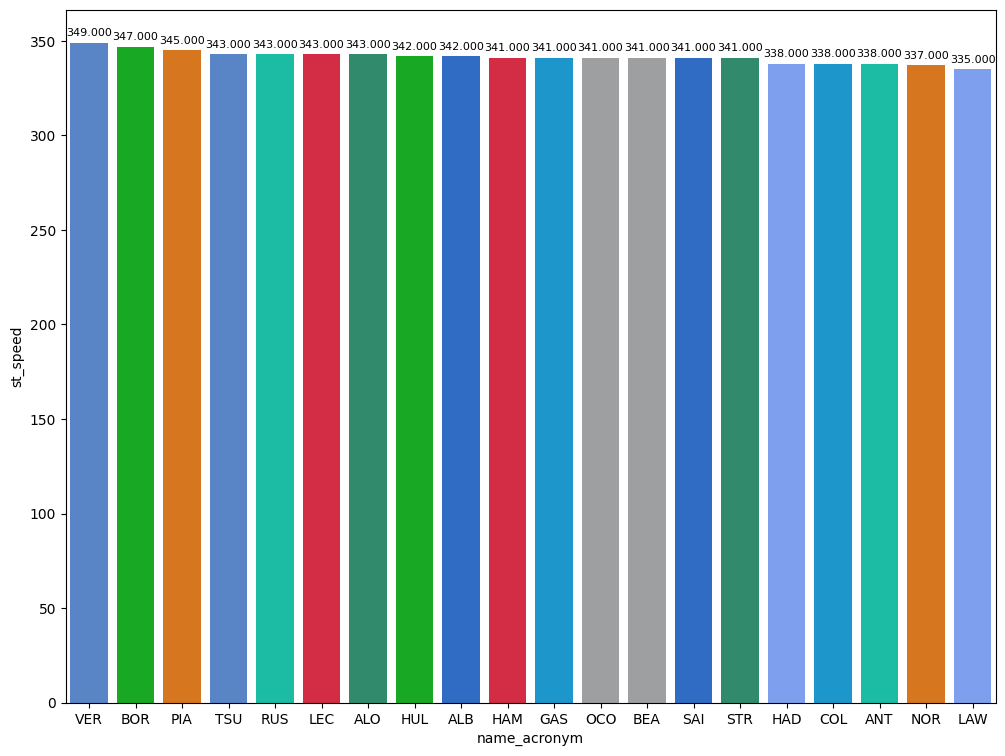

In [13]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

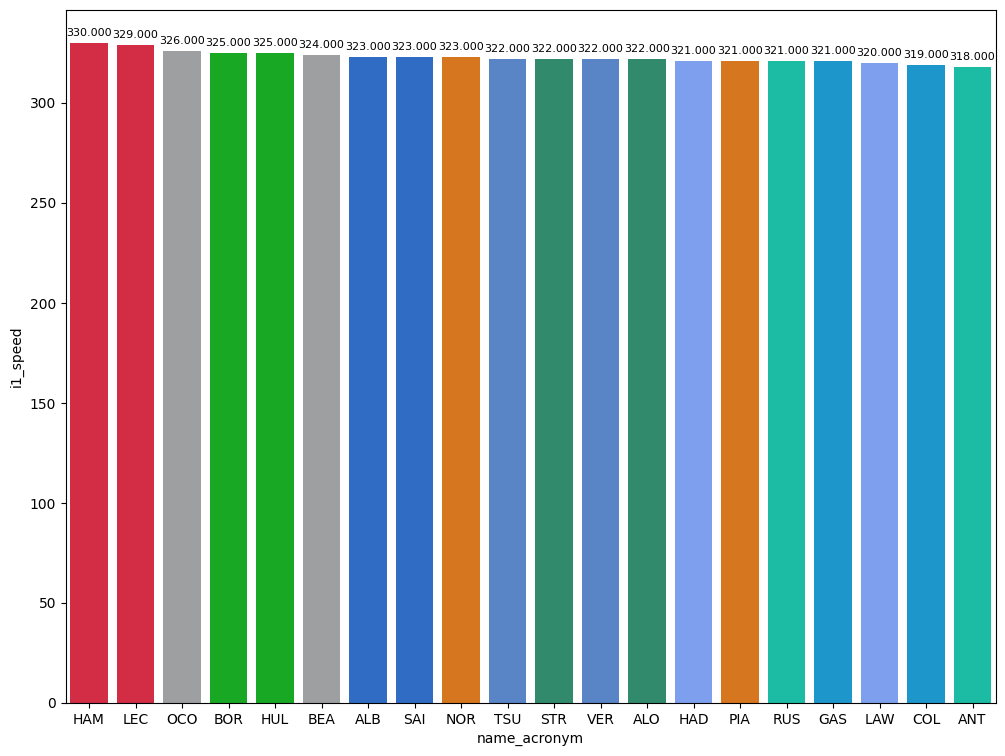

In [14]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

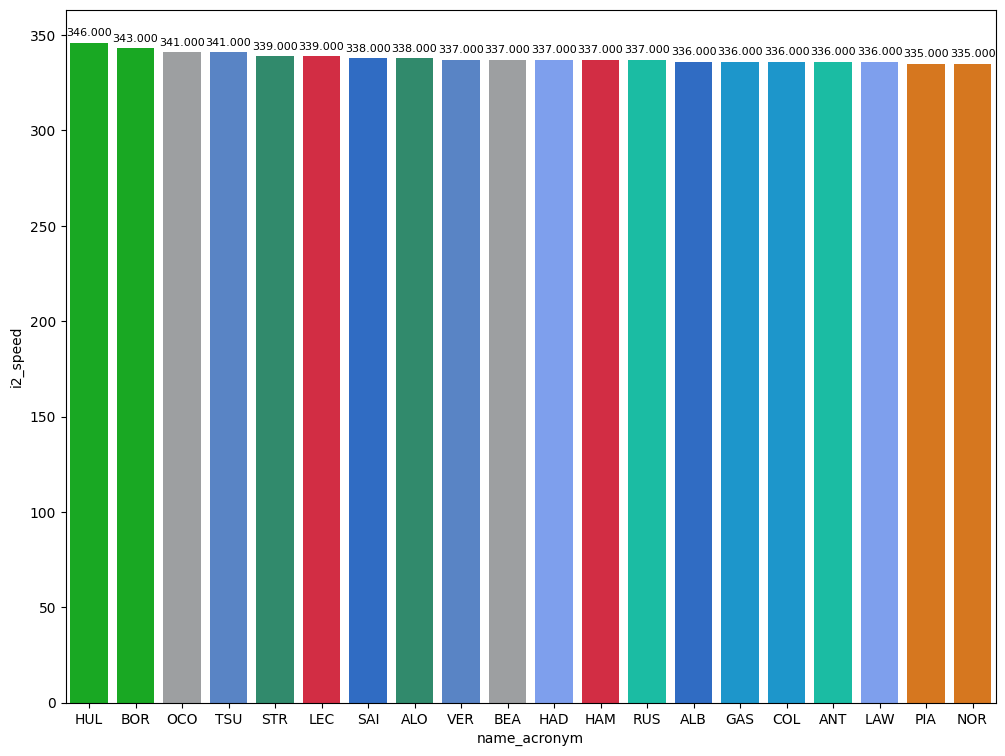

In [15]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [16]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

full_name compound  duration_sector_1  duration_sector_2  \
147  Charles LECLERC     HARD             26.944             27.319   
161     Carlos SAINZ   MEDIUM             26.804             26.991   
189     Lando NORRIS     SOFT             26.704             26.734   

     duration_sector_3  lap_duration  
147             26.674        80.937  
161             26.788        80.583  
189             26.440        79.878

### Deltas
In this section we can see the deltas of the fastest lap of each driver compared with the fastest lap of the session.Due to changing conditions, only a part of the free practice were important and this part will be taken into consideration.

In [17]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


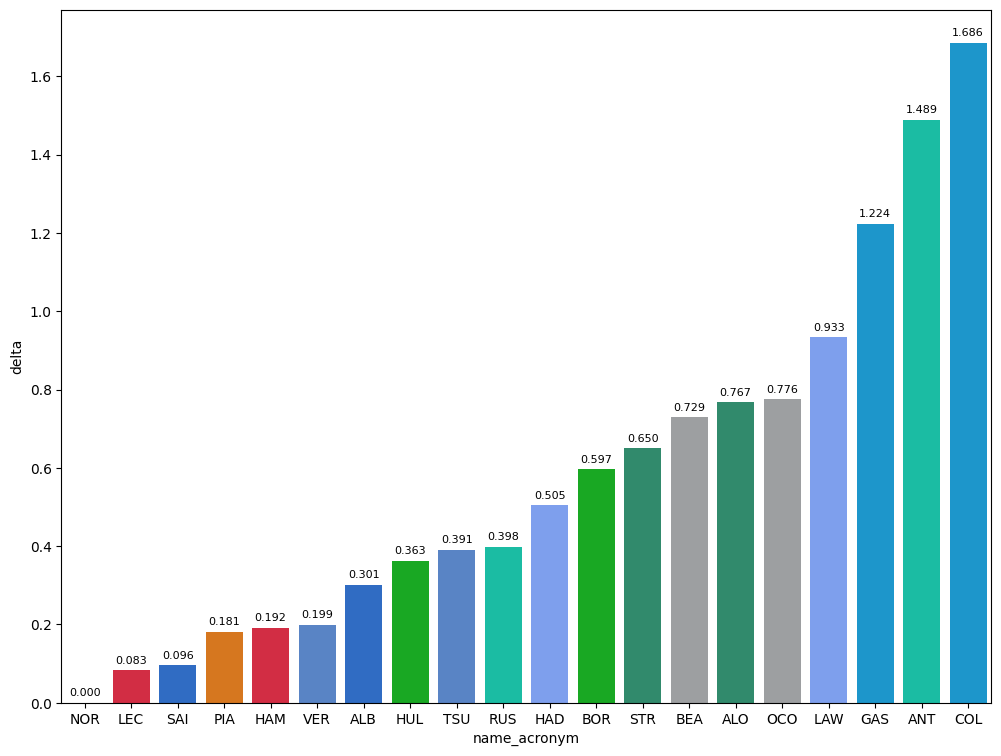

In [18]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
In this section, best sector are taken of each sector to see the car's performance in each sector.

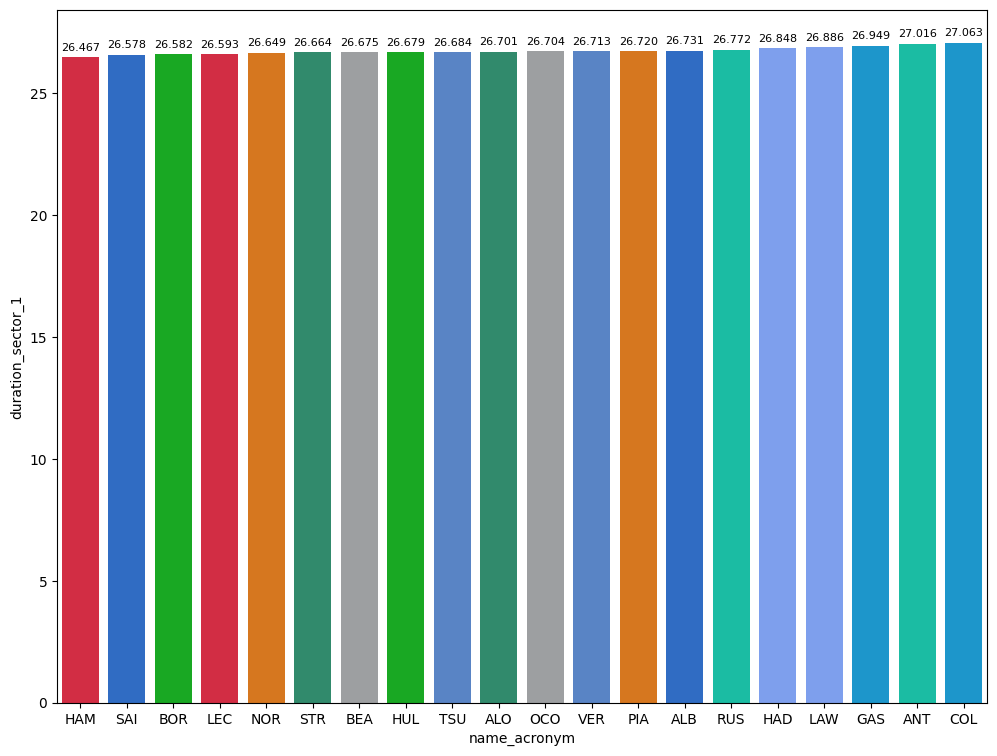

In [19]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin().dropna()].sort_values(by=['duration_sector_1'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_1",sectorPace)

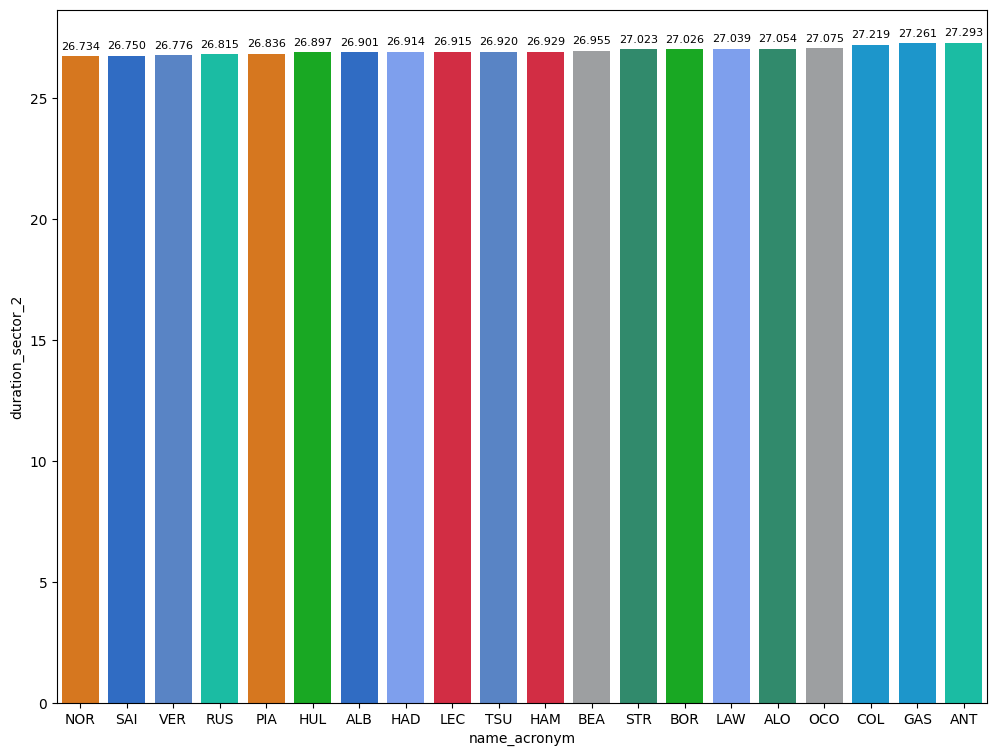

In [20]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin().dropna()].sort_values(by=['duration_sector_2'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_2",sectorPace)

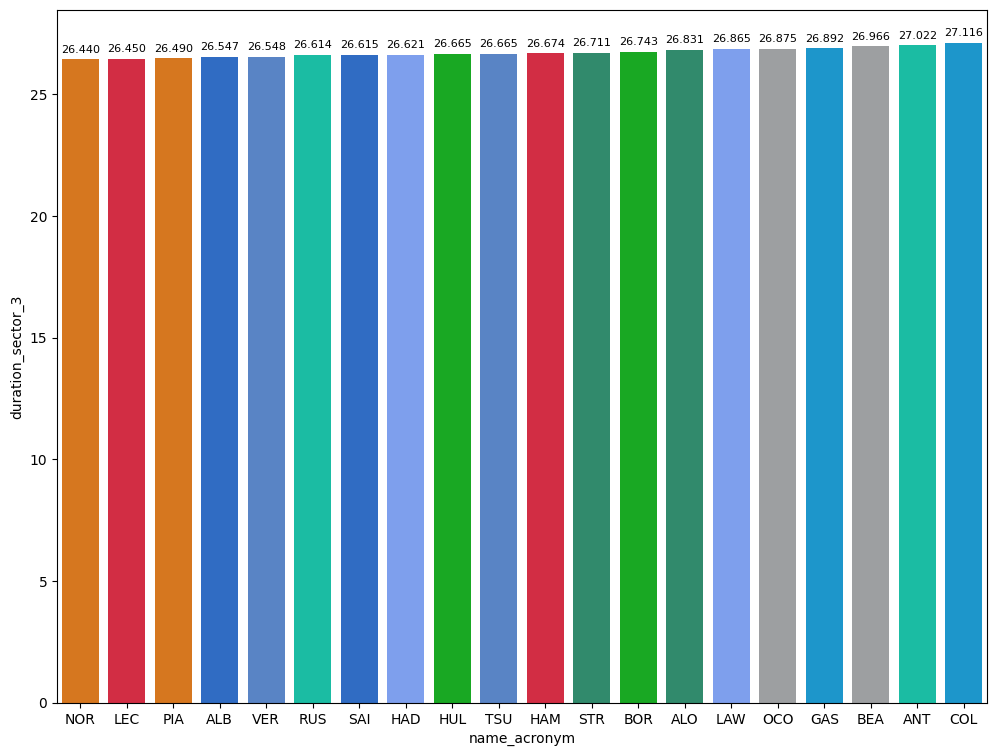

In [21]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin().dropna()].sort_values(by=['duration_sector_3'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_3",sectorPace)

### Mean pace with the different compound used on the session

In [22]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False  and lap_duration>83 and lap_duration <=86").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

lap_duration
compound              
MEDIUM       84.327435
HARD         84.386024
SOFT         84.563429

### Long runs

In [23]:
MINIMUN_SECONDS = 83
MAXIMUM_SECONDS = 86

#### Red Bull Racing

In [24]:
stintInformation.query('driver_number == 1 or driver_number == 22')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
15         1268         9906             1              1          1        4   
17         1268         9906             1             22          1        4   
25         1268         9906             2              1          5        7   
26         1268         9906             2             22          5        7   
43         1268         9906             3              1          8        9   
48         1268         9906             3             22          8       11   
66         1268         9906             4              1         10       14   
73         1268         9906             4             22         12       17   
94         1268         9906             5             22         18       28   
95         1268         9906             5              1         15       27   

   compound  tyre_age_at_start  
15   MEDIUM                  0  
17   MEDIUM                  0  
25   MEDIUM                  4  
26   MEDIUM                  4  
43   MEDIUM                  7  
48   MEDIUM                  7  
66     SOFT                  0  
73     SOFT                  0  
94   MEDIUM                 11  
95   MEDIUM                  9

In [25]:
data = libraryDataF1.getinfolongruns(jointables2,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
324  Max VERSTAPPEN   MEDIUM  2025-09-05T15:46:56.485000+00:00          16   
341  Max VERSTAPPEN   MEDIUM  2025-09-05T15:48:20.751000+00:00          17   
358  Max VERSTAPPEN   MEDIUM  2025-09-05T15:49:44.383000+00:00          18   
376  Max VERSTAPPEN   MEDIUM  2025-09-05T15:51:08.183000+00:00          19   
395  Max VERSTAPPEN   MEDIUM  2025-09-05T15:52:32.528000+00:00          20   
413  Max VERSTAPPEN   MEDIUM  2025-09-05T15:53:56.884000+00:00          21   
432  Max VERSTAPPEN   MEDIUM  2025-09-05T15:55:20.429000+00:00          22   
451  Max VERSTAPPEN   MEDIUM  2025-09-05T15:56:43.962000+00:00          23   
469  Max VERSTAPPEN   MEDIUM  2025-09-05T15:58:08.667000+00:00          24   
487  Max VERSTAPPEN   MEDIUM  2025-09-05T15:59:32.375000+00:00          25   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
324             27.982             28.417             27.839        84.238  
341             27.574             28.348             27.815        83.737  
358             27.142             28.695             27.802        83.639  
376             27.508             28.601             28.270        84.379  
395             27.377             29.394             27.731        84.502  
413             27.684             28.195             27.584        83.463  
432             27.731             28.178             27.626        83.535  
451             27.590             28.362             28.772        84.724  
469             27.650             28.315             27.597        83.562  
487             27.752             28.216             27.474        83.442

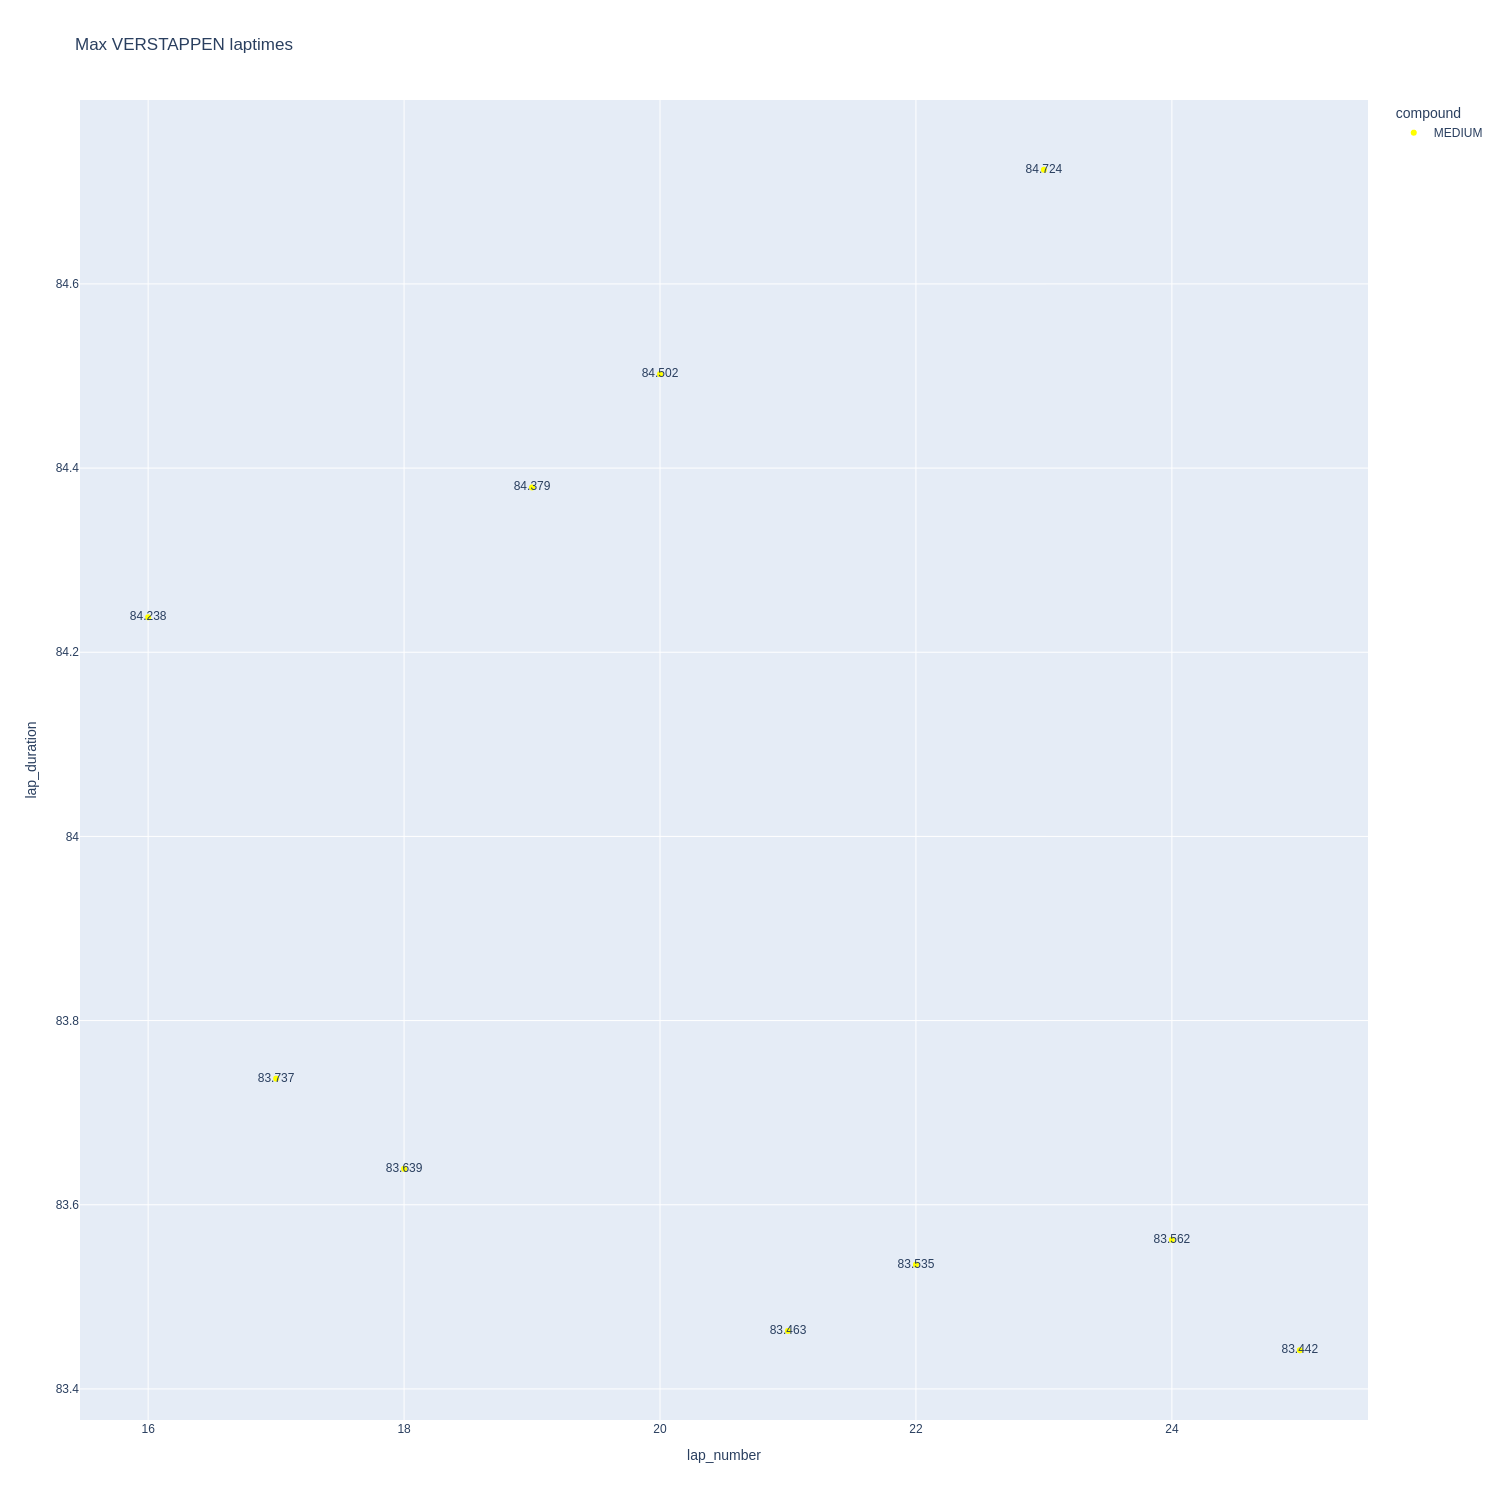

In [26]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

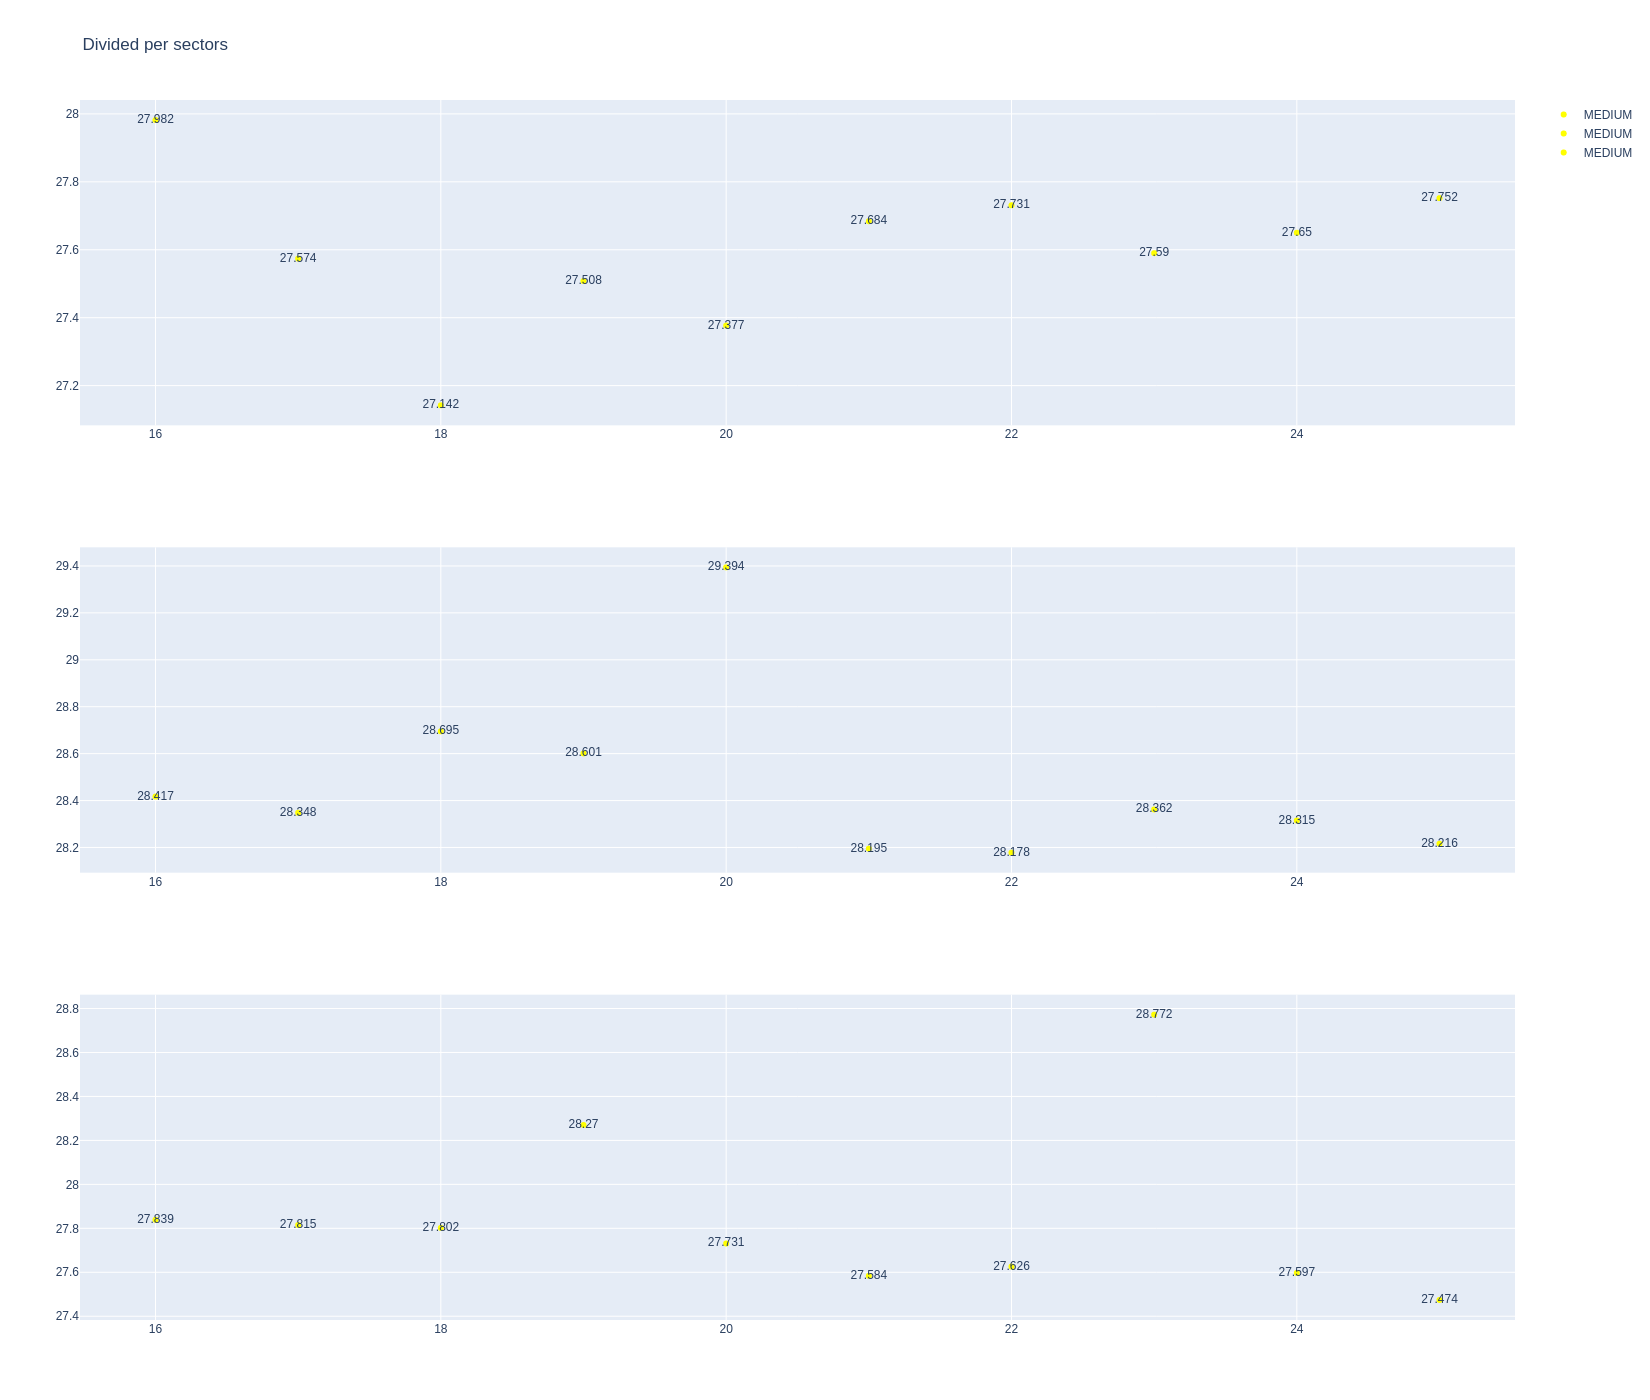

In [27]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [28]:
data = libraryDataF1.getinfolongruns(jointables2,22,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
39   Yuki TSUNODA   MEDIUM  2025-09-05T15:03:44.684000+00:00           2   
353  Yuki TSUNODA   MEDIUM  2025-09-05T15:49:23.713000+00:00          19   
372  Yuki TSUNODA   MEDIUM  2025-09-05T15:50:49.645000+00:00          20   
391  Yuki TSUNODA   MEDIUM  2025-09-05T15:52:14.331000+00:00          21   
410  Yuki TSUNODA   MEDIUM  2025-09-05T15:53:39.422000+00:00          22   
429  Yuki TSUNODA   MEDIUM  2025-09-05T15:55:04.266000+00:00          23   
448  Yuki TSUNODA   MEDIUM  2025-09-05T15:56:28.924000+00:00          24   
467  Yuki TSUNODA   MEDIUM  2025-09-05T15:57:53.277000+00:00          25   
485  Yuki TSUNODA   MEDIUM  2025-09-05T15:59:18.075000+00:00          26   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
39              27.064             29.201             27.399        83.664  
353             28.901             28.900             28.123        85.924  
372             27.877             28.871             28.053        84.801  
391             28.062             28.815             28.153        85.030  
410             27.979             28.847             28.031        84.857  
429             27.862             28.771             27.979        84.612  
448             27.785             28.741             27.904        84.430  
467             27.822             28.959             28.026        84.807  
485             27.850             28.914             28.126        84.890

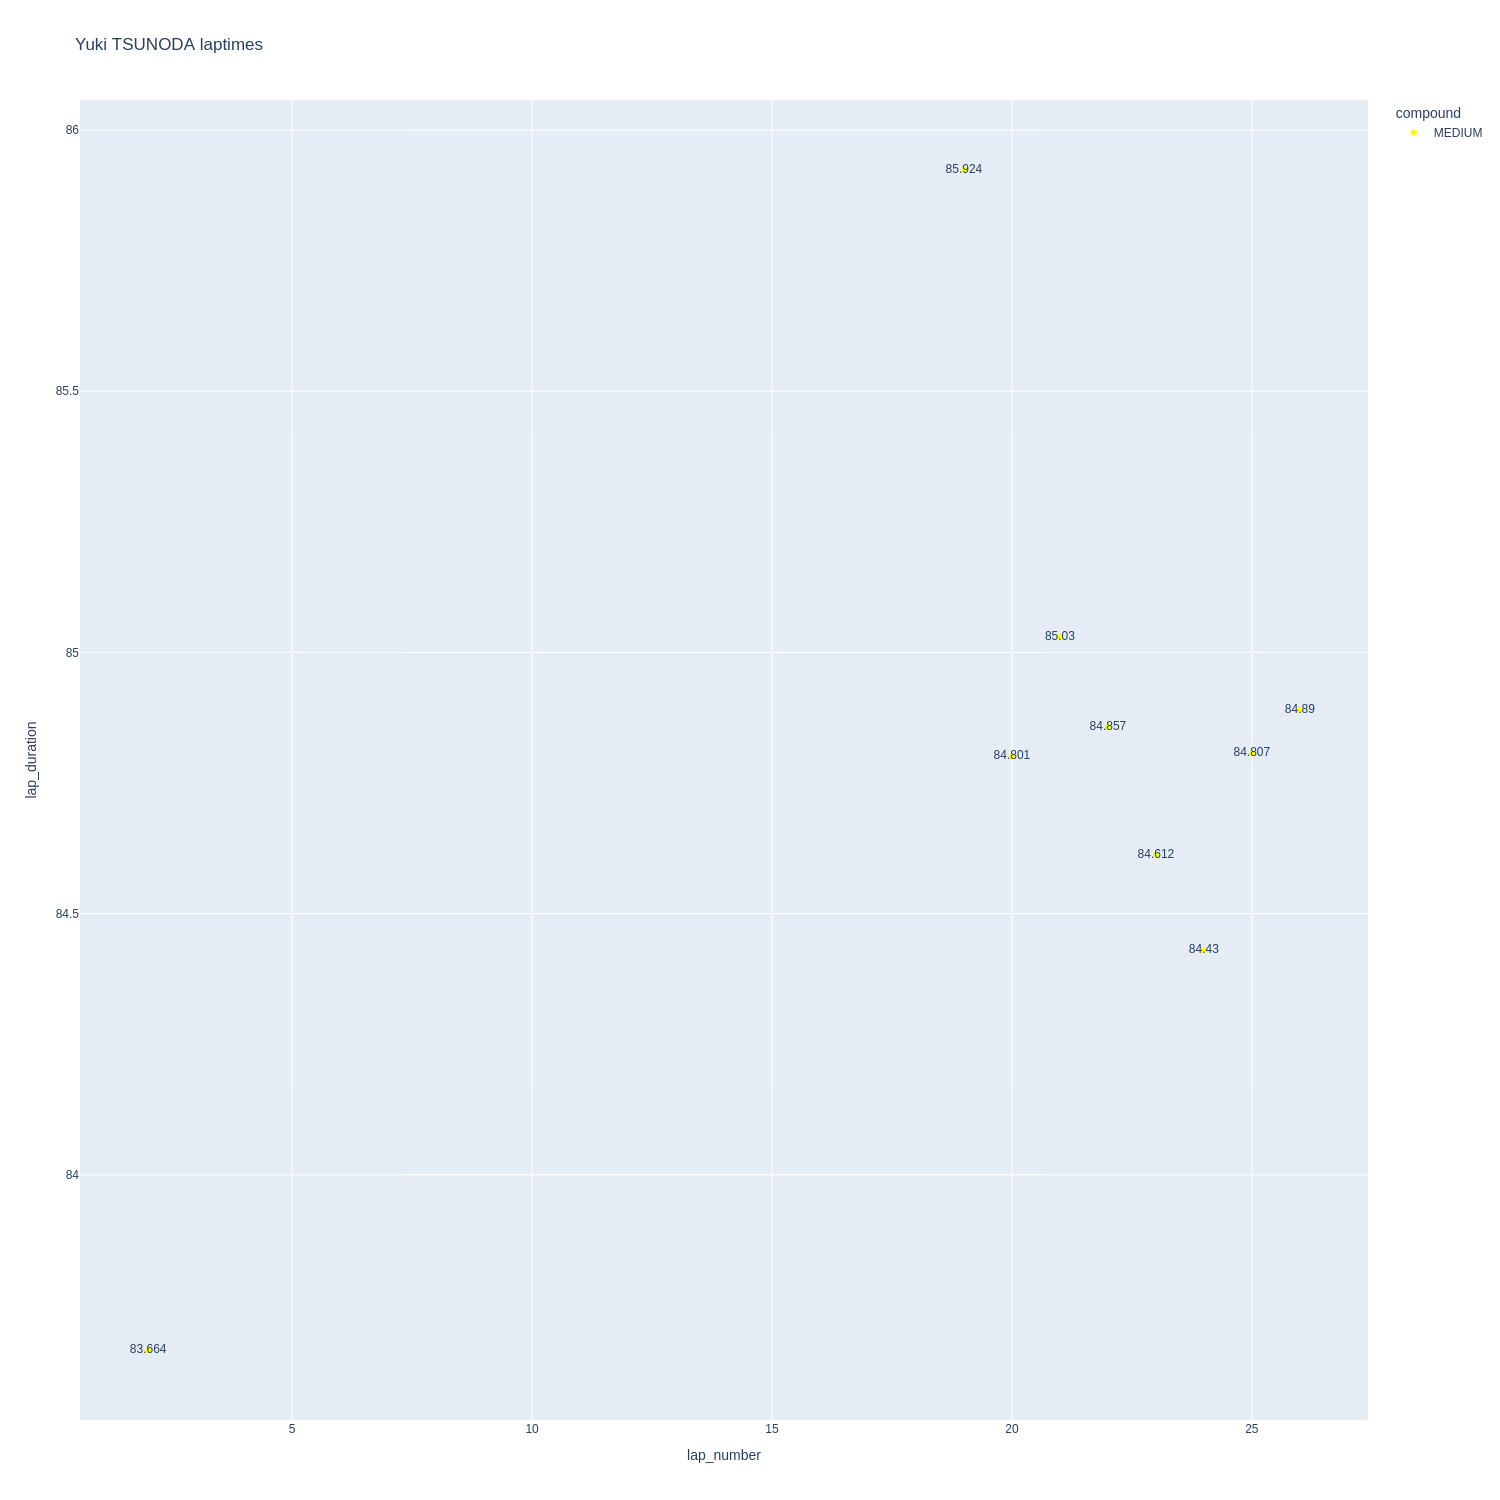

In [29]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

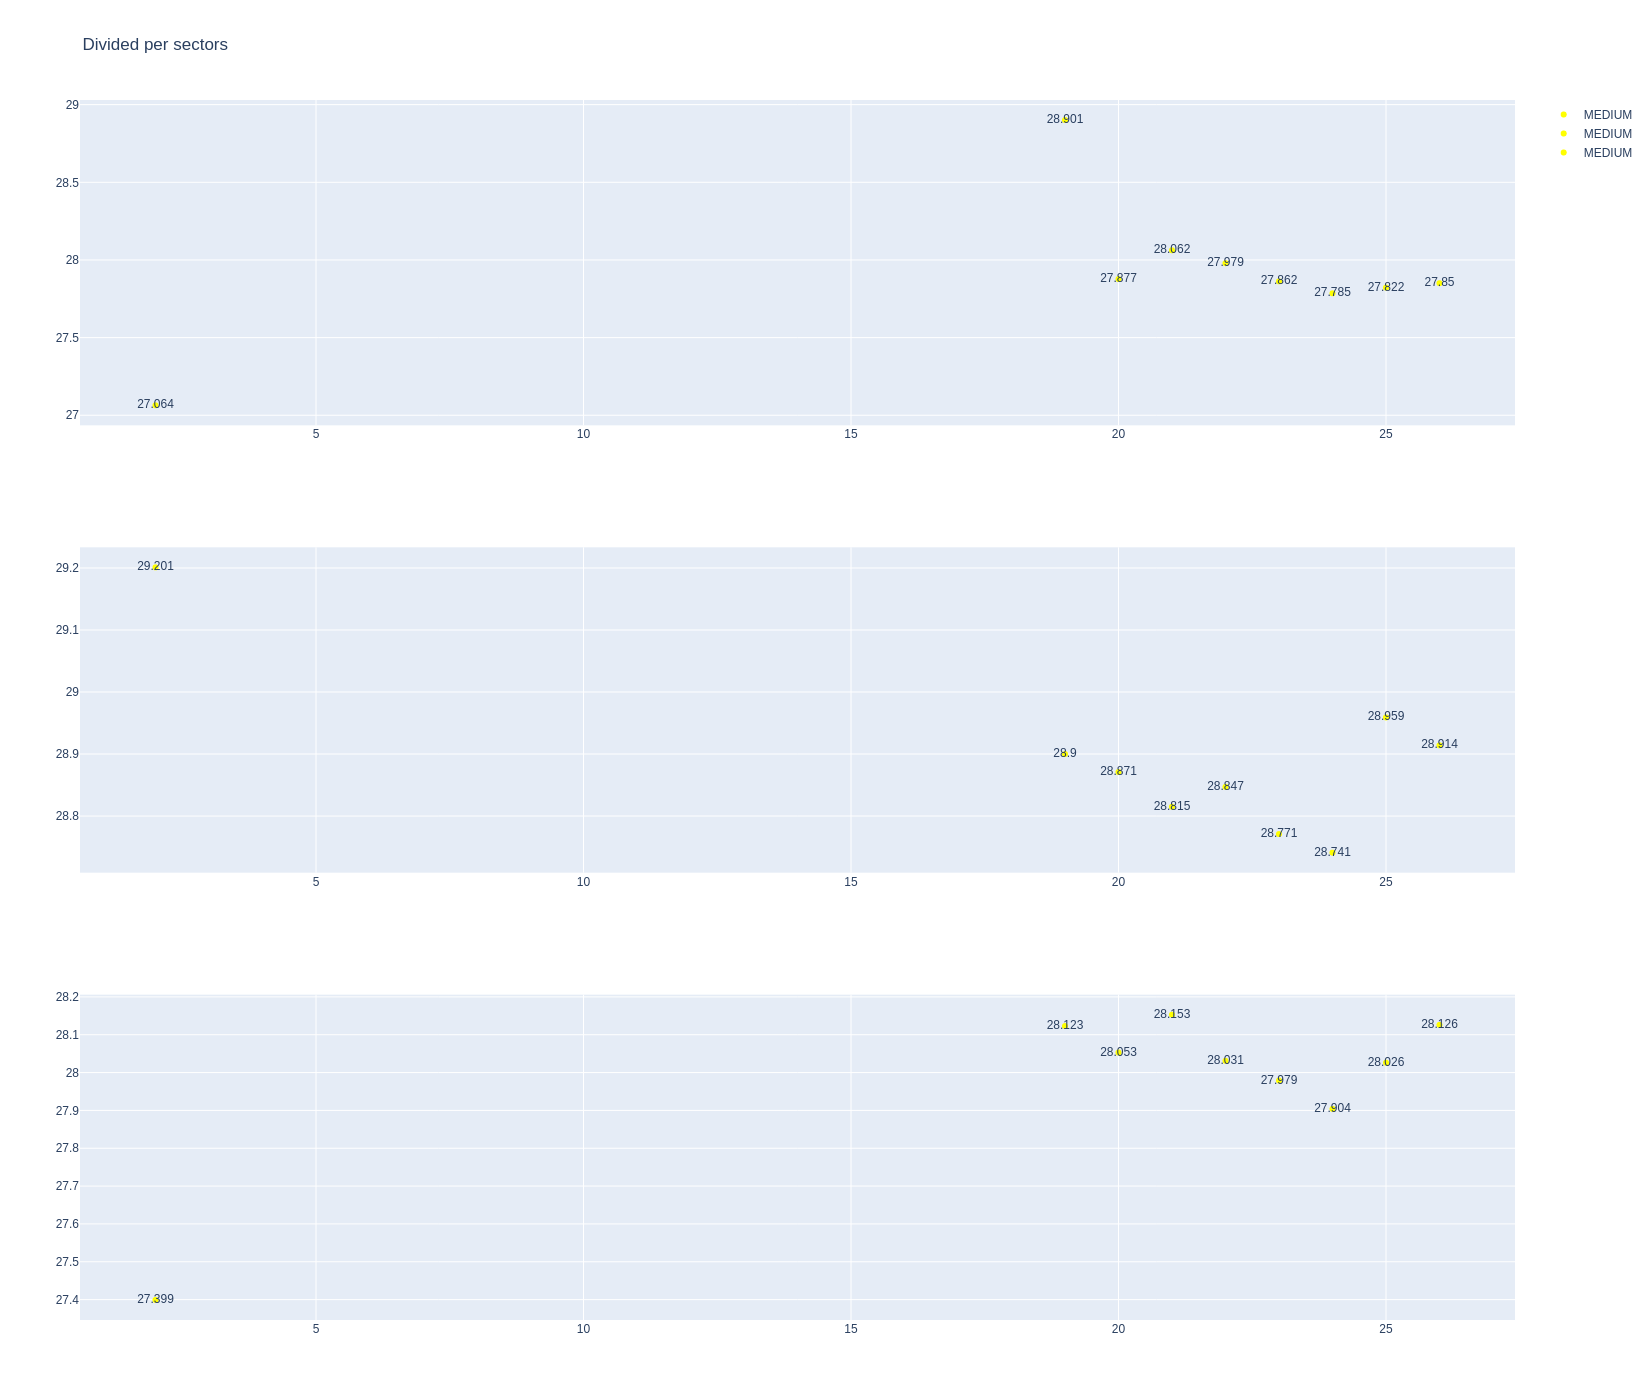

In [30]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Ferrari

In [31]:
stintInformation.query('driver_number == 44 or driver_number == 16')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
13         1268         9906             1             16          1        5   
19         1268         9906             1             44          1        4   
37         1268         9906             2             16          6       10   
40         1268         9906             2             44          5        8   
51         1268         9906             3             16         11       13   
55         1268         9906             3             44          9       11   
70         1268         9906             4             44         12       14   
74         1268         9906             4             16         14       18   
96         1268         9906             5             16         19       29   
97         1268         9906             5             44         15       26   

   compound  tyre_age_at_start  
13     HARD                  0  
19     HARD                  0  
37     HARD                  5  
40     HARD                  4  
51     SOFT                  0  
55     SOFT                  0  
70     SOFT                  3  
74     SOFT                  3  
96     SOFT                  8  
97     HARD                  8

In [32]:
data = libraryDataF1.getinfolongruns(jointables2,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
354  Charles LECLERC     SOFT  2025-09-05T15:49:33.928000+00:00          20   
392  Charles LECLERC     SOFT  2025-09-05T15:52:25.482000+00:00          22   
411  Charles LECLERC     SOFT  2025-09-05T15:53:51.113000+00:00          23   
430  Charles LECLERC     SOFT  2025-09-05T15:55:15.213000+00:00          24   
449  Charles LECLERC     SOFT  2025-09-05T15:56:39.114000+00:00          25   
491  Charles LECLERC     SOFT  2025-09-05T15:59:40.631000+00:00          27   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
354             27.451             28.506             27.728        83.685  
392             28.815             28.897             28.062        85.774  
411             27.647             28.552             27.826        84.025  
430             27.561             28.465             27.840        83.866  
449                NaN             28.500             29.741        85.802  
491             27.420             28.311             27.783        83.514

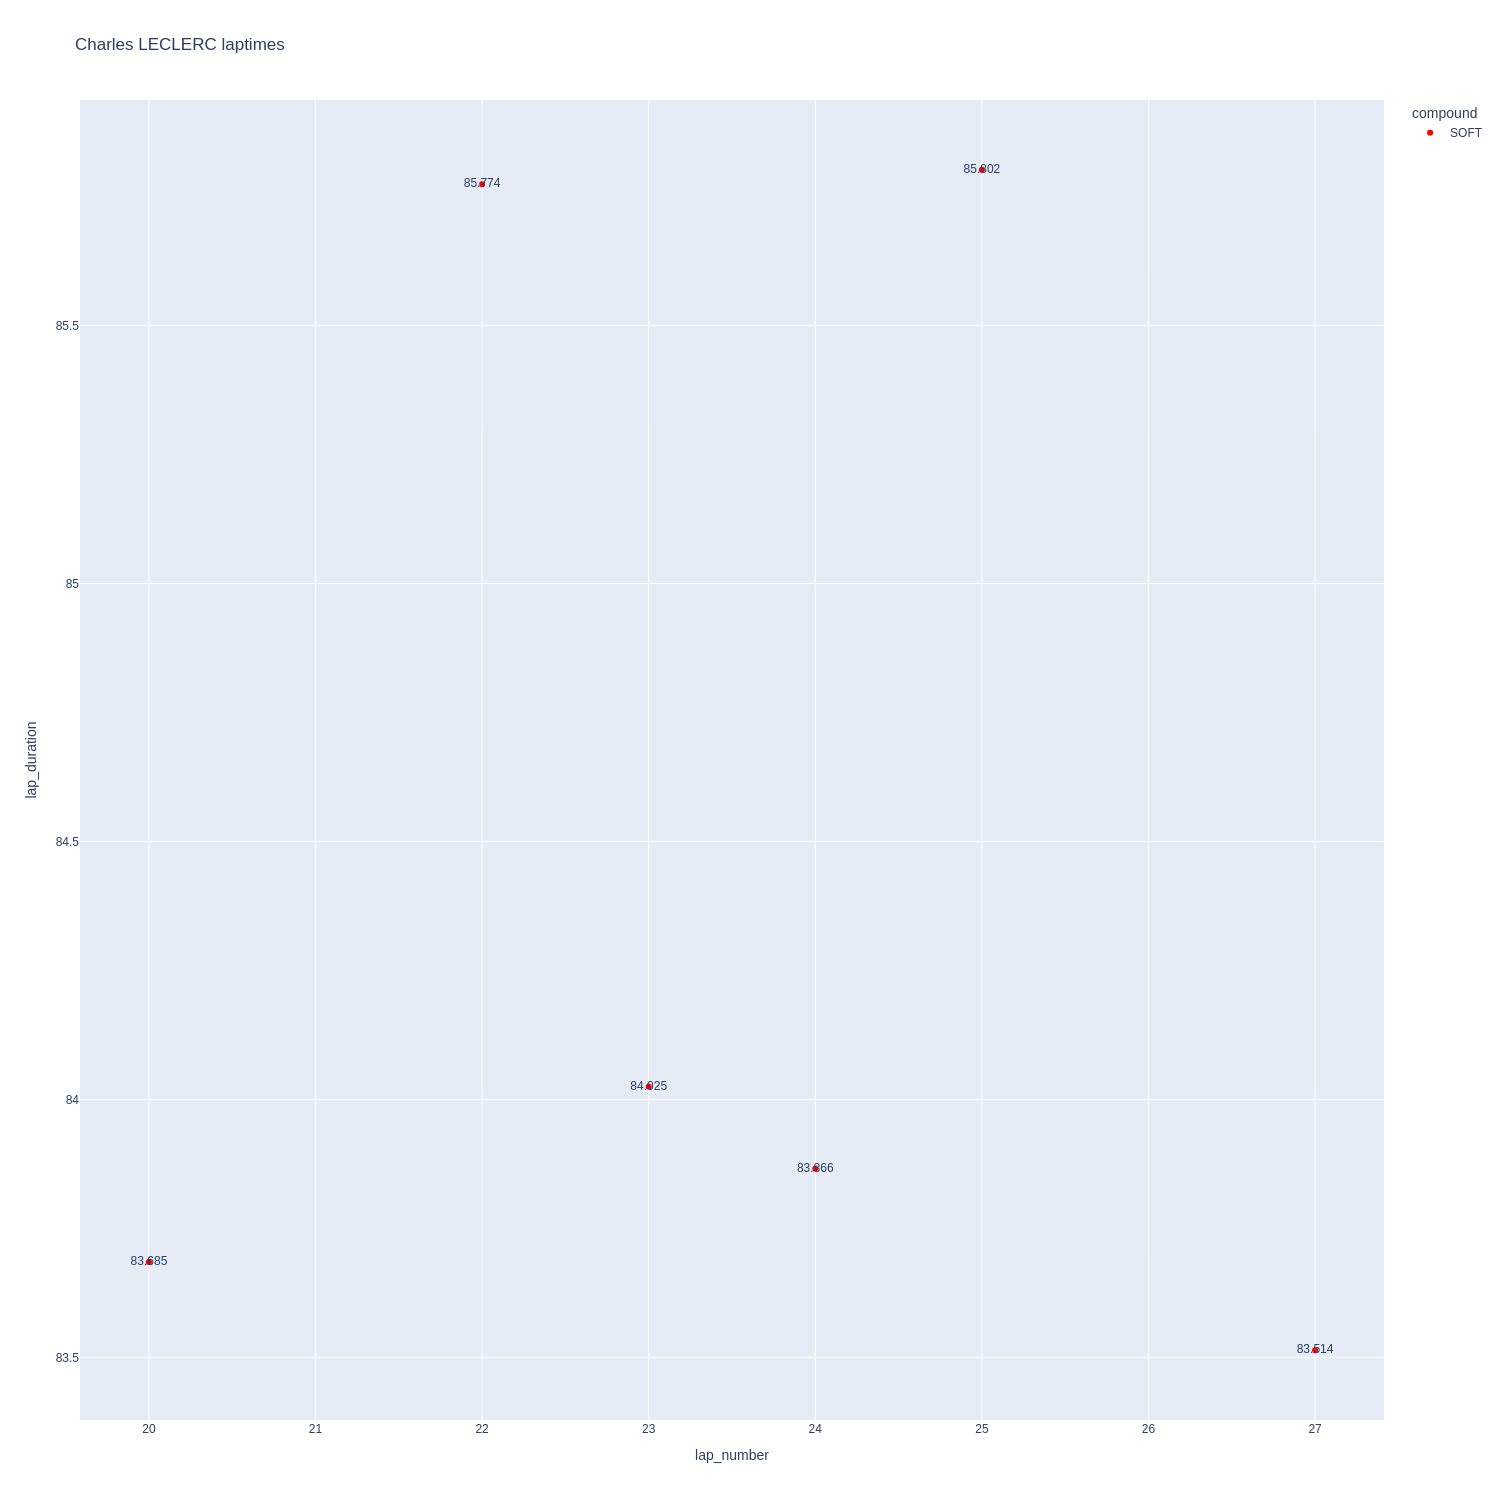

In [33]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

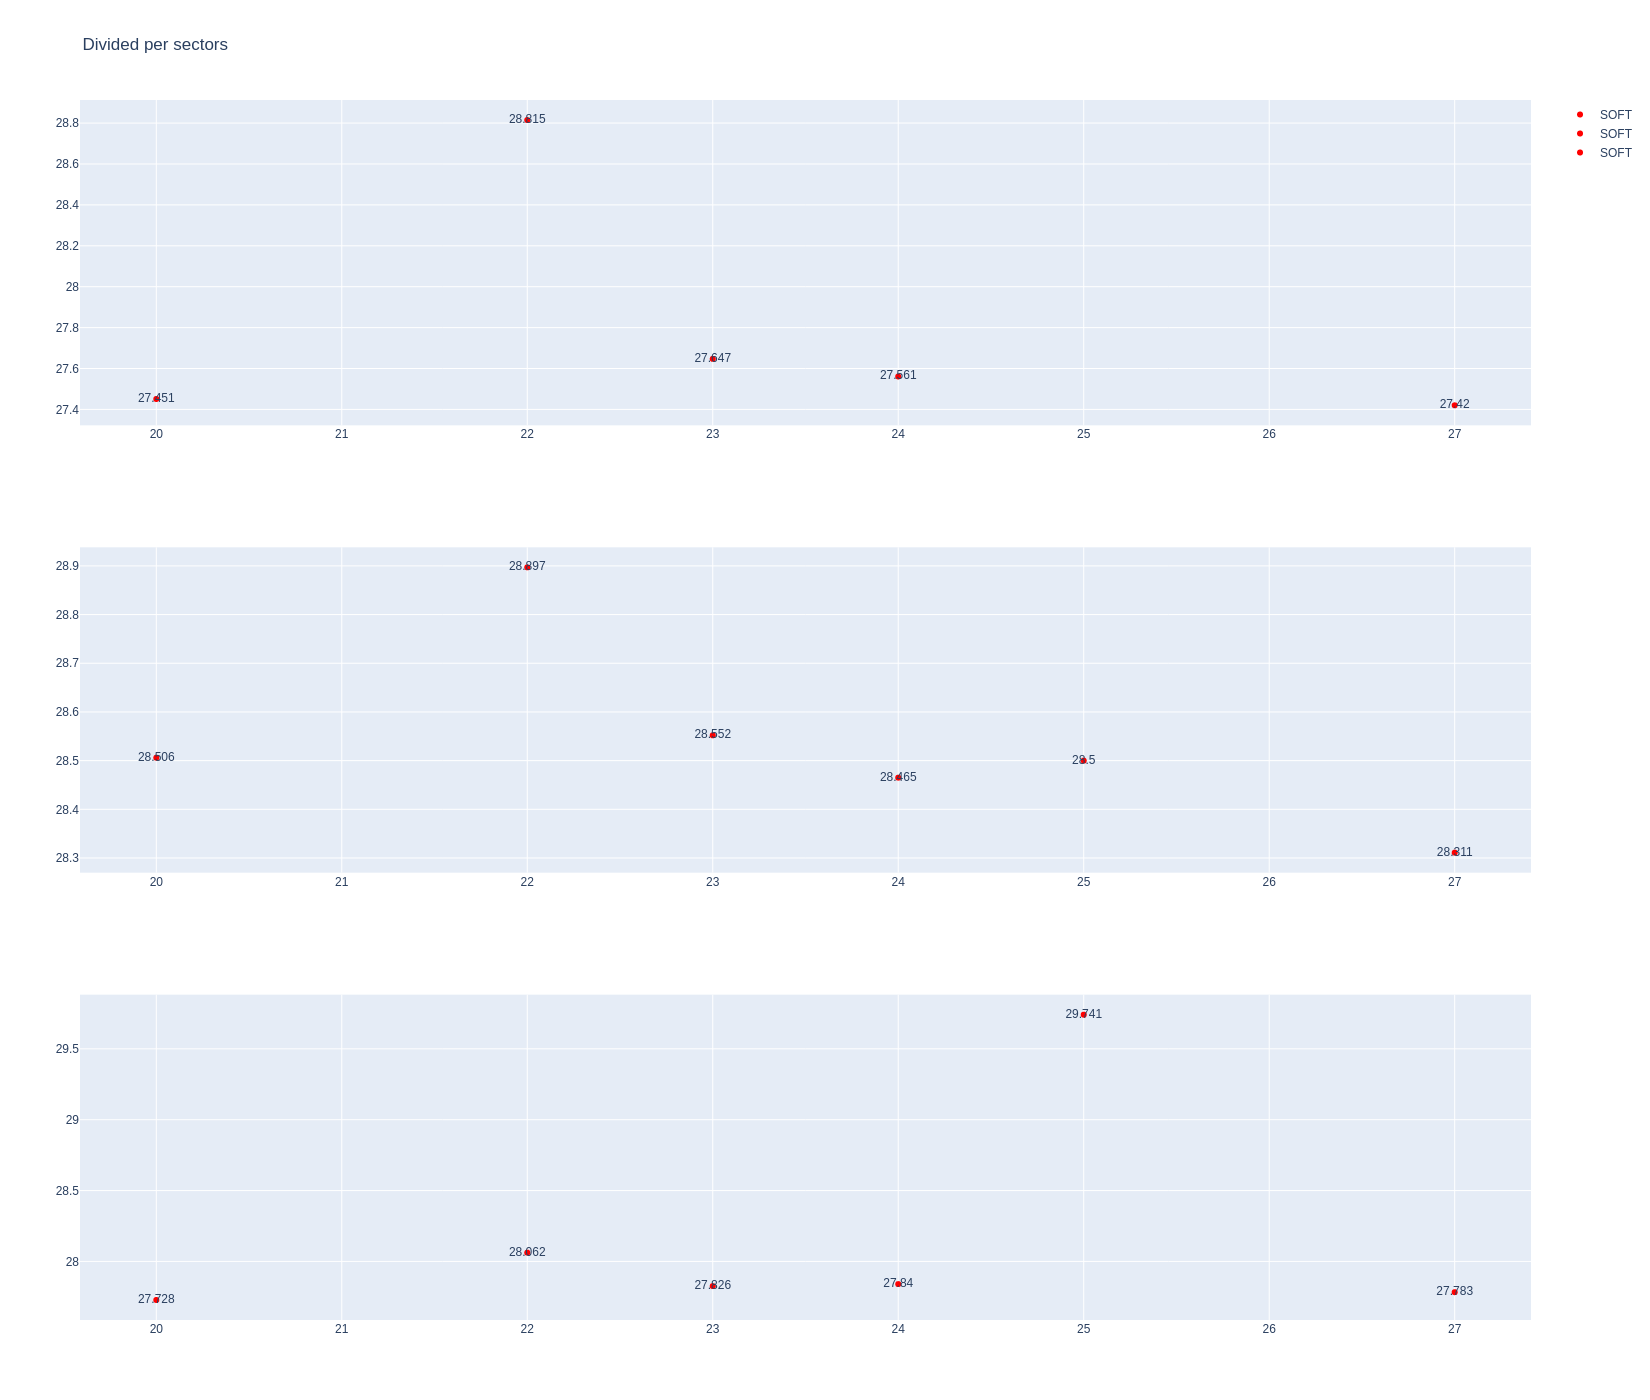

In [34]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [35]:
data = libraryDataF1.getinfolongruns(jointables2,44,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
283  Lewis HAMILTON     SOFT  2025-09-05T15:39:13.380000+00:00          14   
339  Lewis HAMILTON     HARD  2025-09-05T15:48:17.854000+00:00          16   
356  Lewis HAMILTON     HARD  2025-09-05T15:49:42.083000+00:00          17   
375  Lewis HAMILTON     HARD  2025-09-05T15:51:07.588000+00:00          18   
414  Lewis HAMILTON     HARD  2025-09-05T15:53:58.124000+00:00          20   
433  Lewis HAMILTON     HARD  2025-09-05T15:55:22.539000+00:00          21   
452  Lewis HAMILTON     HARD  2025-09-05T15:56:46.285000+00:00          22   
470  Lewis HAMILTON     HARD  2025-09-05T15:58:10.811000+00:00          23   
488  Lewis HAMILTON     HARD  2025-09-05T15:59:34.473000+00:00          24   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
283             26.578             27.094             31.606        85.278  
339             27.585             28.739             27.877        84.201  
356             27.627             29.739             28.161        85.527  
375             27.489             28.749             28.199        84.437  
414             27.523             28.789             27.981        84.293  
433             27.568             28.562             27.801        83.931  
452             27.516             28.620             28.304        84.440  
470             27.335             28.546             27.804        83.685  
488             27.439             28.820             27.926        84.185

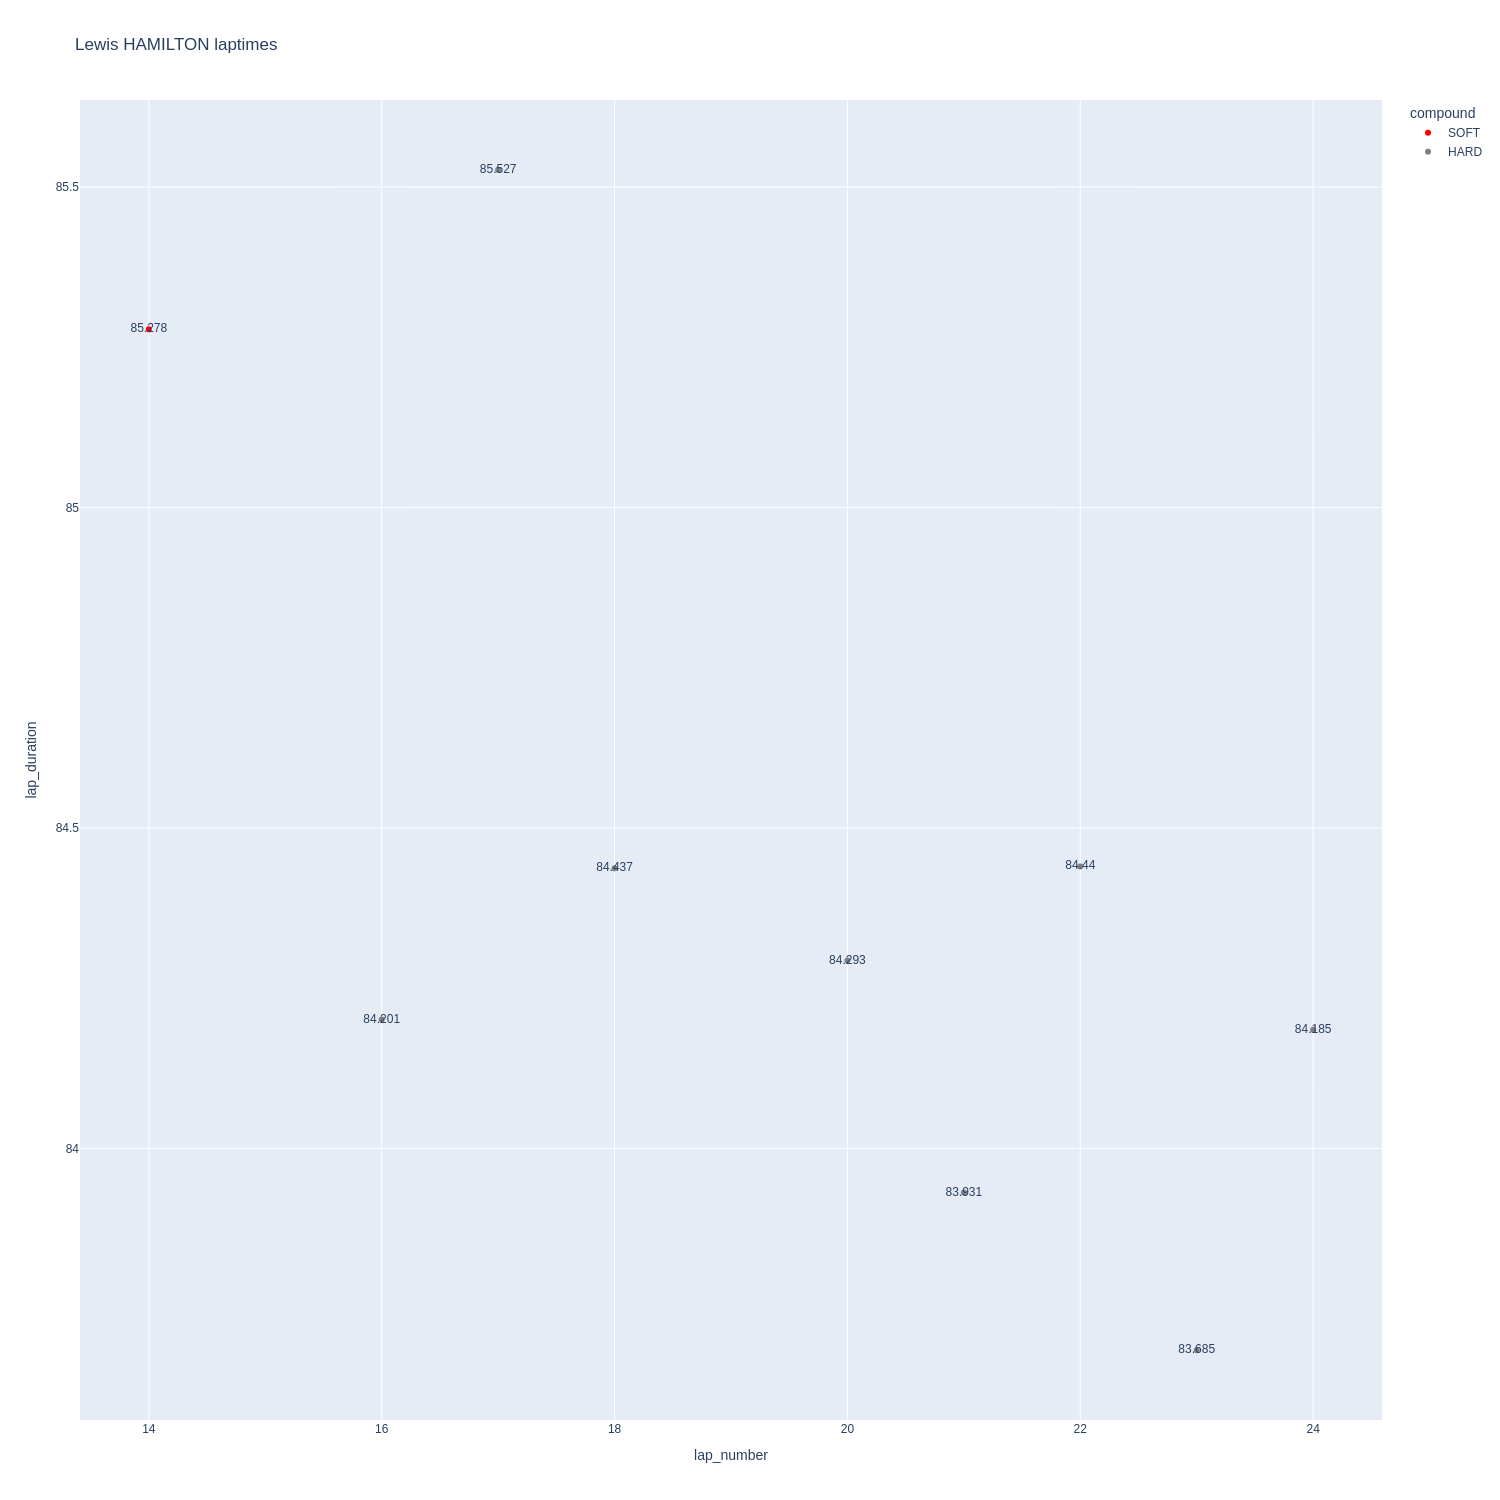

In [36]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

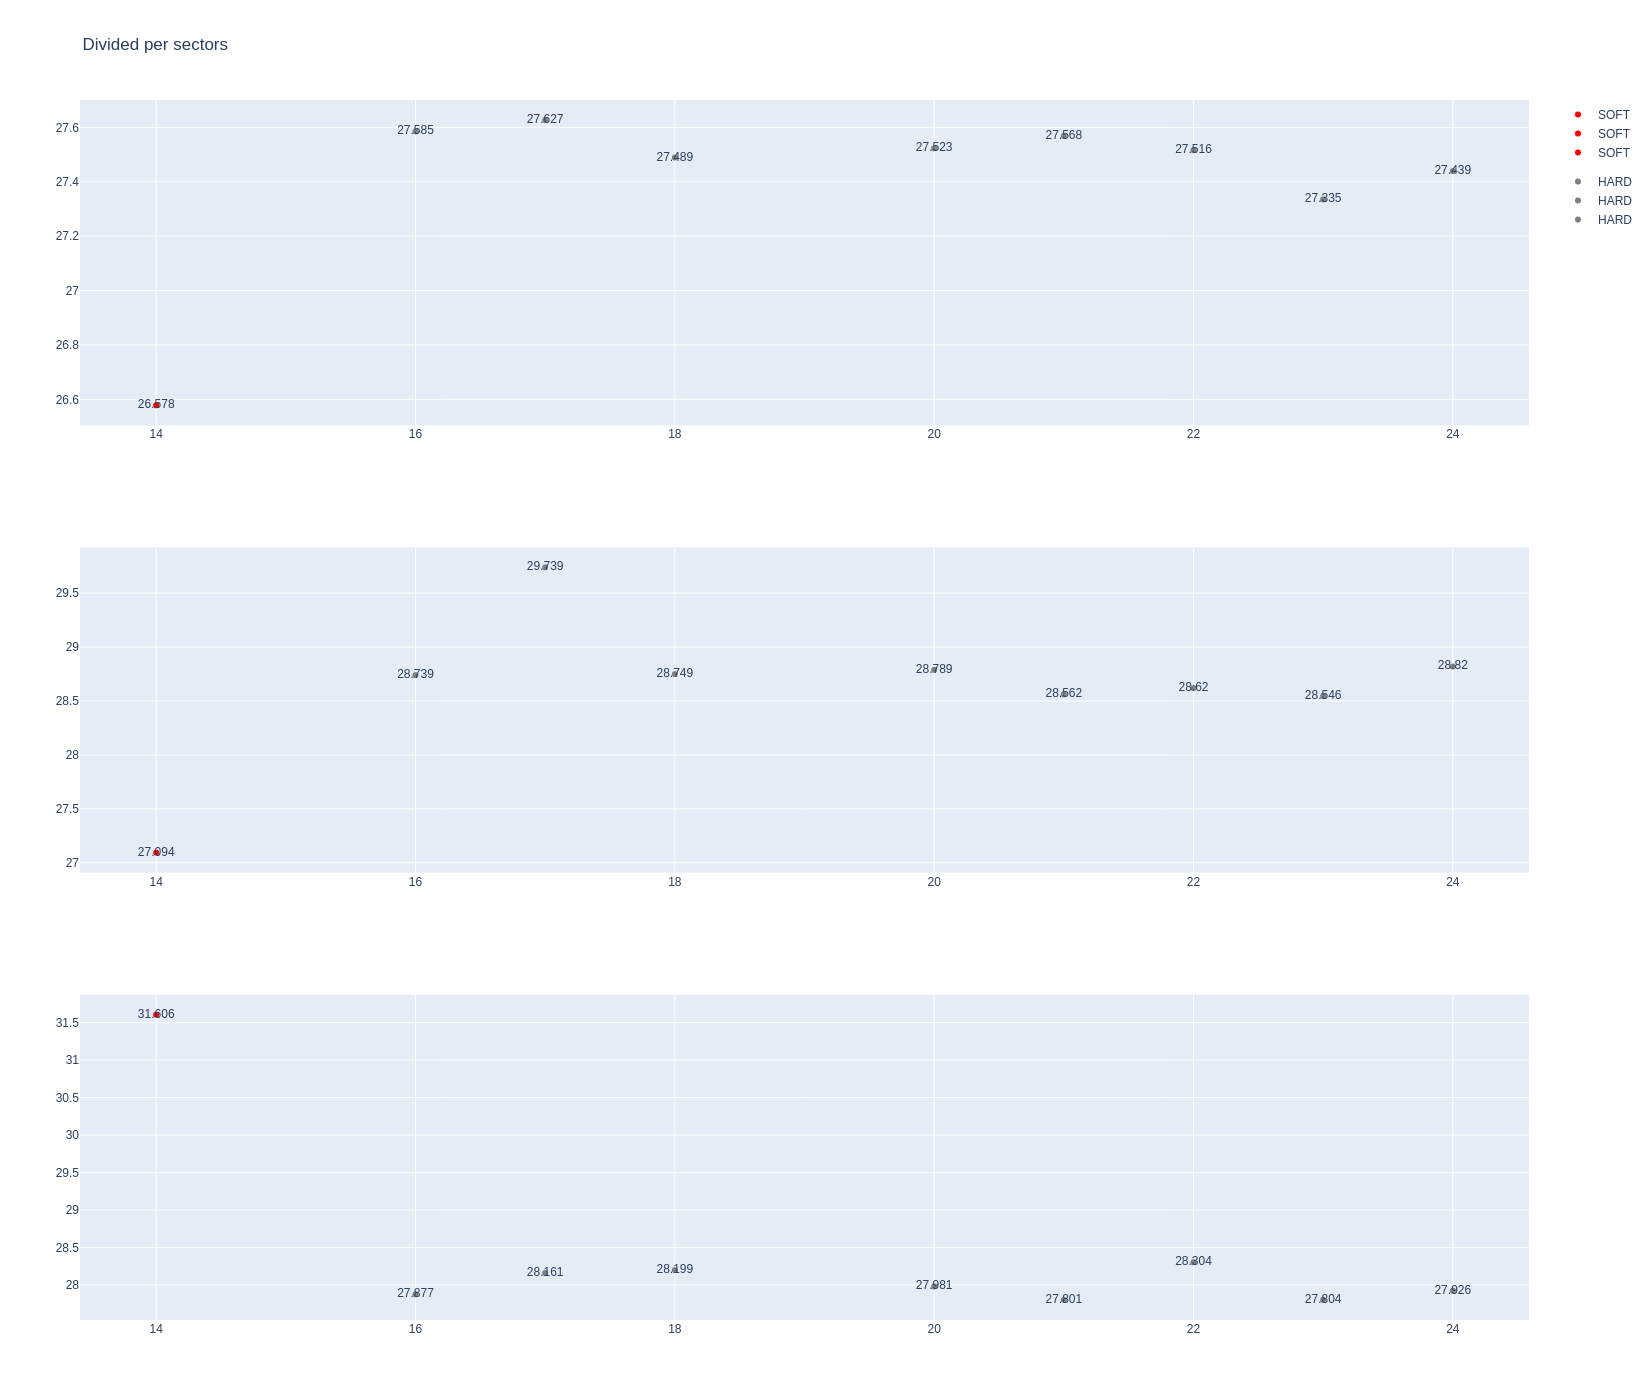

In [37]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Mercedes

In [38]:
stintInformation.query('driver_number == 63 or driver_number == 12')

meeting_key  session_key  stint_number  driver_number  lap_start  \
4           1268         9906             1             12          1   
18          1268         9906             1             63          1   
23          1268         9906             2             63          6   
41          1268         9906             3             63          8   
65          1268         9906             4             63         11   
100         1268         9906             5             63         17   

     lap_end compound  tyre_age_at_start  
4          4     HARD                  0  
18         5     HARD                  0  
23         7     HARD                  5  
41        10     HARD                  0  
65        16     SOFT                  0  
100       29     HARD                 10

In [39]:
data = libraryDataF1.getinfolongruns(jointables2,12,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [40]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [41]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [42]:
data = libraryDataF1.getinfolongruns(jointables2,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
323  George RUSSELL     HARD  2025-09-05T15:46:54.449000+00:00          18   
340  George RUSSELL     HARD  2025-09-05T15:48:19.940000+00:00          19   
377  George RUSSELL     HARD  2025-09-05T15:51:11.664000+00:00          21   
396  George RUSSELL     HARD  2025-09-05T15:52:35.816000+00:00          22   
415  George RUSSELL     HARD  2025-09-05T15:53:59.743000+00:00          23   
434  George RUSSELL     HARD  2025-09-05T15:55:23.484000+00:00          24   
453  George RUSSELL     HARD  2025-09-05T15:56:46.913000+00:00          25   
472  George RUSSELL     HARD  2025-09-05T15:58:11.741000+00:00          26   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
323             27.830             28.439             29.235        85.504  
340             27.747             28.484             27.760        83.991  
377             27.510             28.461             28.063        84.034  
396             27.615             28.528             27.855        83.998  
415             27.582             28.397             27.801        83.780  
434             27.382             28.324             27.686        83.392  
453             27.515             28.711             28.646        84.872  
472             27.331             28.527             28.182        84.040

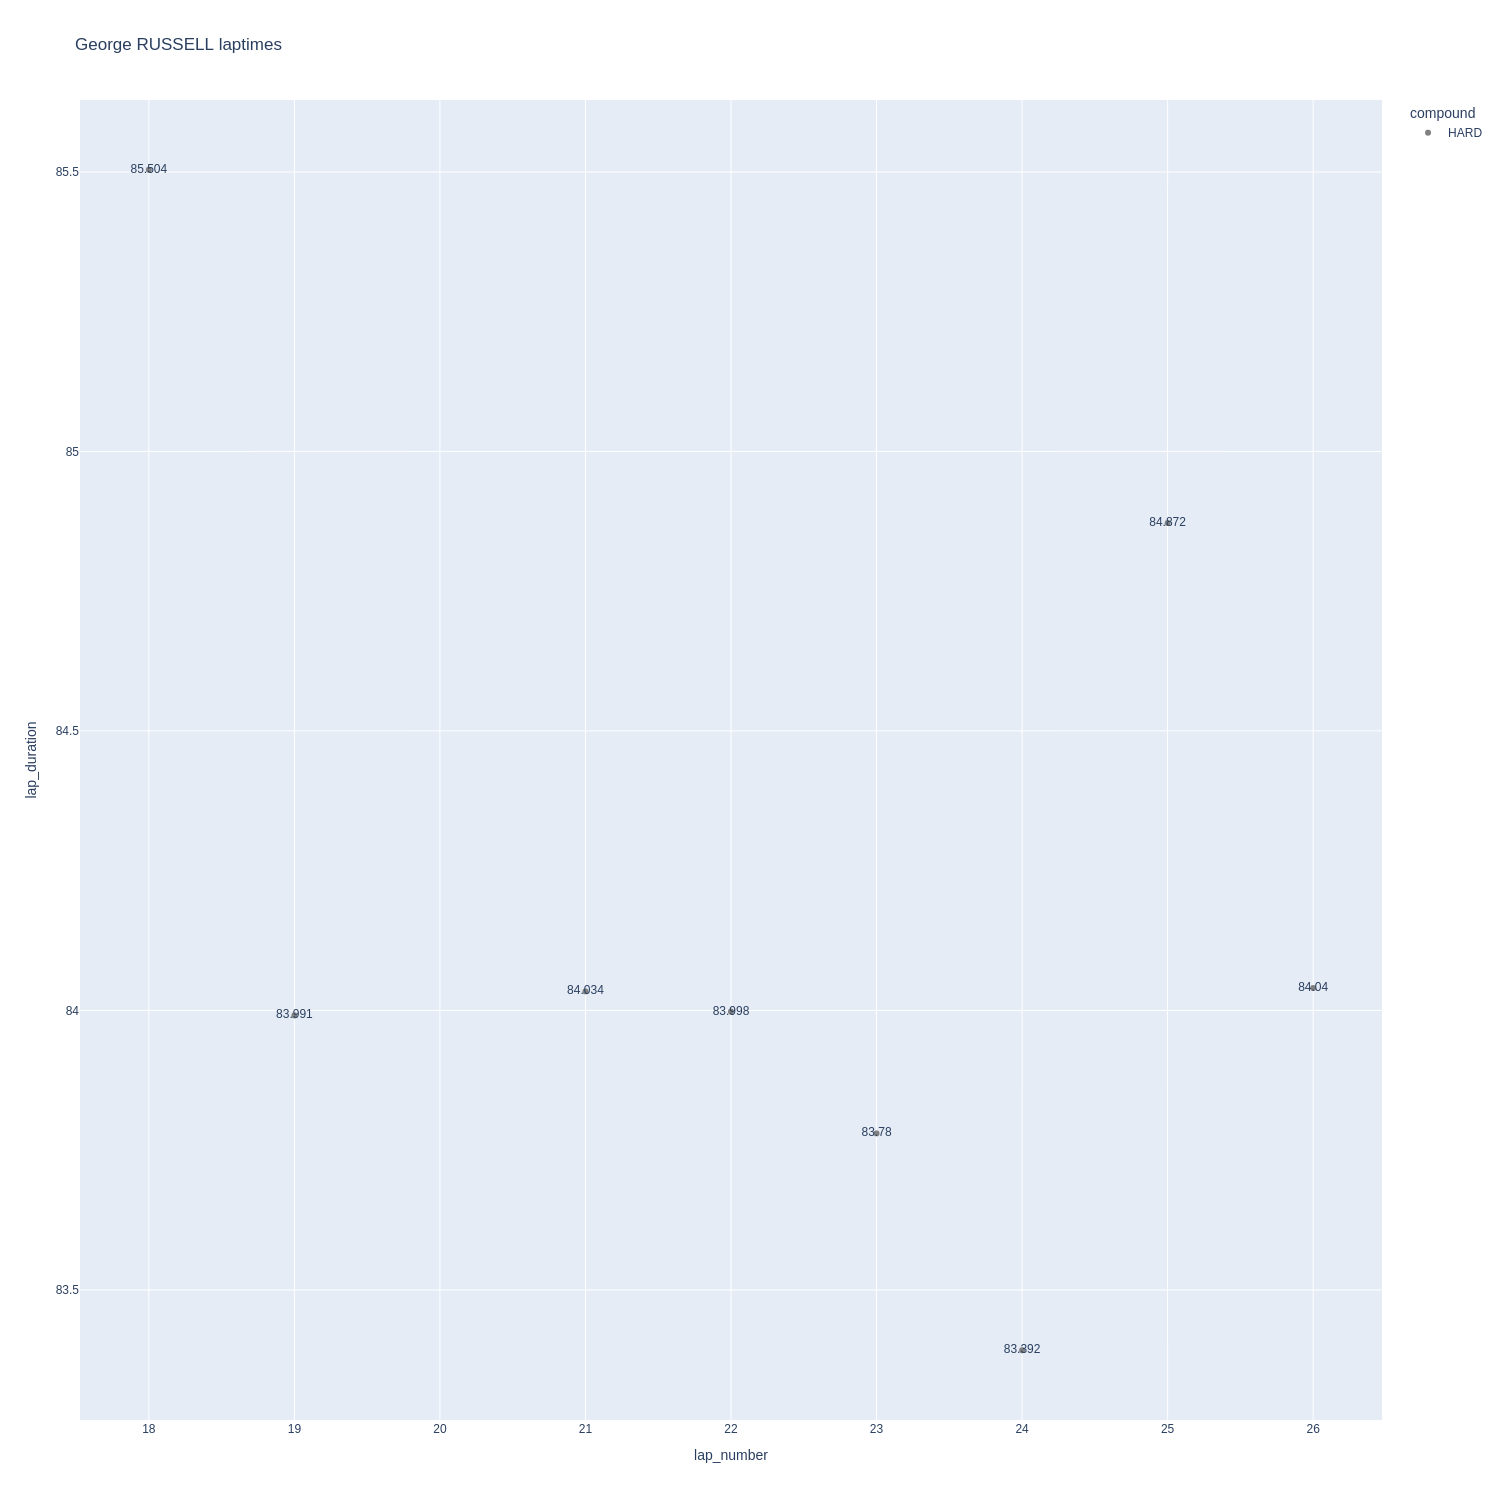

In [43]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

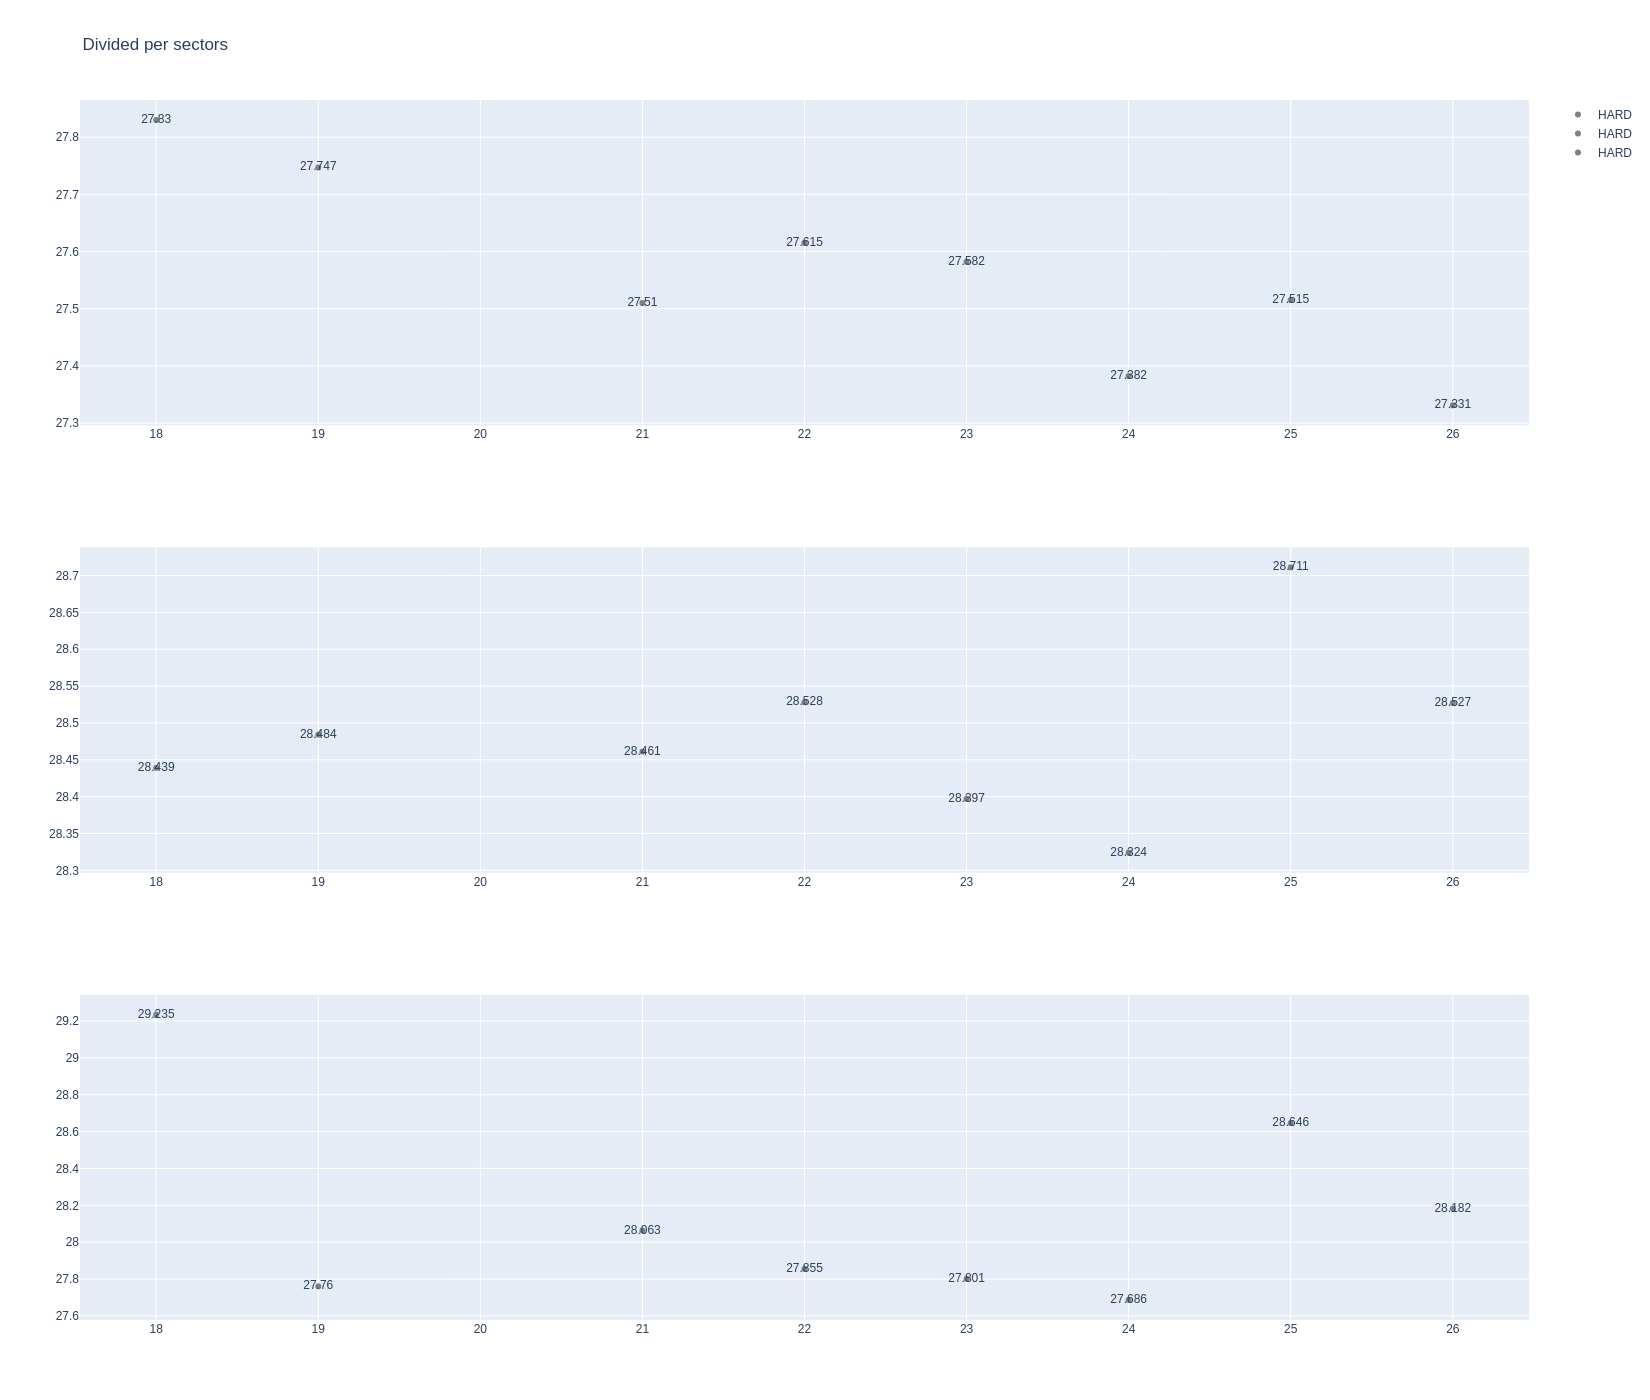

In [44]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### McLaren

In [45]:
stintInformation.query('driver_number == 81 or driver_number == 4')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
5          1268         9906             1             81          1        5   
24         1268         9906             1              4          1        5   
29         1268         9906             2              4          6        7   
42         1268         9906             2             81          6       11   
45         1268         9906             3              4          8       11   
54         1268         9906             3             81         12       14   
59         1268         9906             4              4         12       14   
69         1268         9906             4             81         15       17   
87         1268         9906             5             81         18       29   
89         1268         9906             5              4         15       28   

   compound  tyre_age_at_start  
5    MEDIUM                  0  
24   MEDIUM                  0  
29   MEDIUM                  5  
42   MEDIUM                  5  
45     SOFT                  0  
54     SOFT                  0  
59     SOFT                  4  
69     SOFT                  3  
87   MEDIUM                 11  
89   MEDIUM                  7

In [46]:
data = libraryDataF1.getinfolongruns(jointables2,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
308  Lando NORRIS   MEDIUM  2025-09-05T15:45:06.429000+00:00          16   
320  Lando NORRIS   MEDIUM  2025-09-05T15:46:30.714000+00:00          17   
336  Lando NORRIS   MEDIUM  2025-09-05T15:47:54.528000+00:00          18   
352  Lando NORRIS   MEDIUM  2025-09-05T15:49:18.804000+00:00          19   
371  Lando NORRIS   MEDIUM  2025-09-05T15:50:42.328000+00:00          20   
390  Lando NORRIS   MEDIUM  2025-09-05T15:52:05.623000+00:00          21   
409  Lando NORRIS   MEDIUM  2025-09-05T15:53:29.030000+00:00          22   
428  Lando NORRIS   MEDIUM  2025-09-05T15:54:52.774000+00:00          23   
447  Lando NORRIS   MEDIUM  2025-09-05T15:56:16.384000+00:00          24   
466  Lando NORRIS   MEDIUM  2025-09-05T15:57:40.029000+00:00          25   
484  Lando NORRIS   MEDIUM  2025-09-05T15:59:03.717000+00:00          26   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
308             27.678             28.614             27.982        84.274  
320             27.595             28.404             27.856        83.855  
336             27.760             28.610             27.755        84.125  
352             27.438             28.380             27.778        83.596  
371             27.309             28.207             27.745        83.261  
390             27.400             28.415             27.650        83.465  
409             27.512             28.410             27.794        83.716  
428             27.516             28.327             27.773        83.616  
447             27.466             28.335             27.751        83.552  
466             27.435             28.482             27.826        83.743  
484             27.379             28.430             27.652        83.461

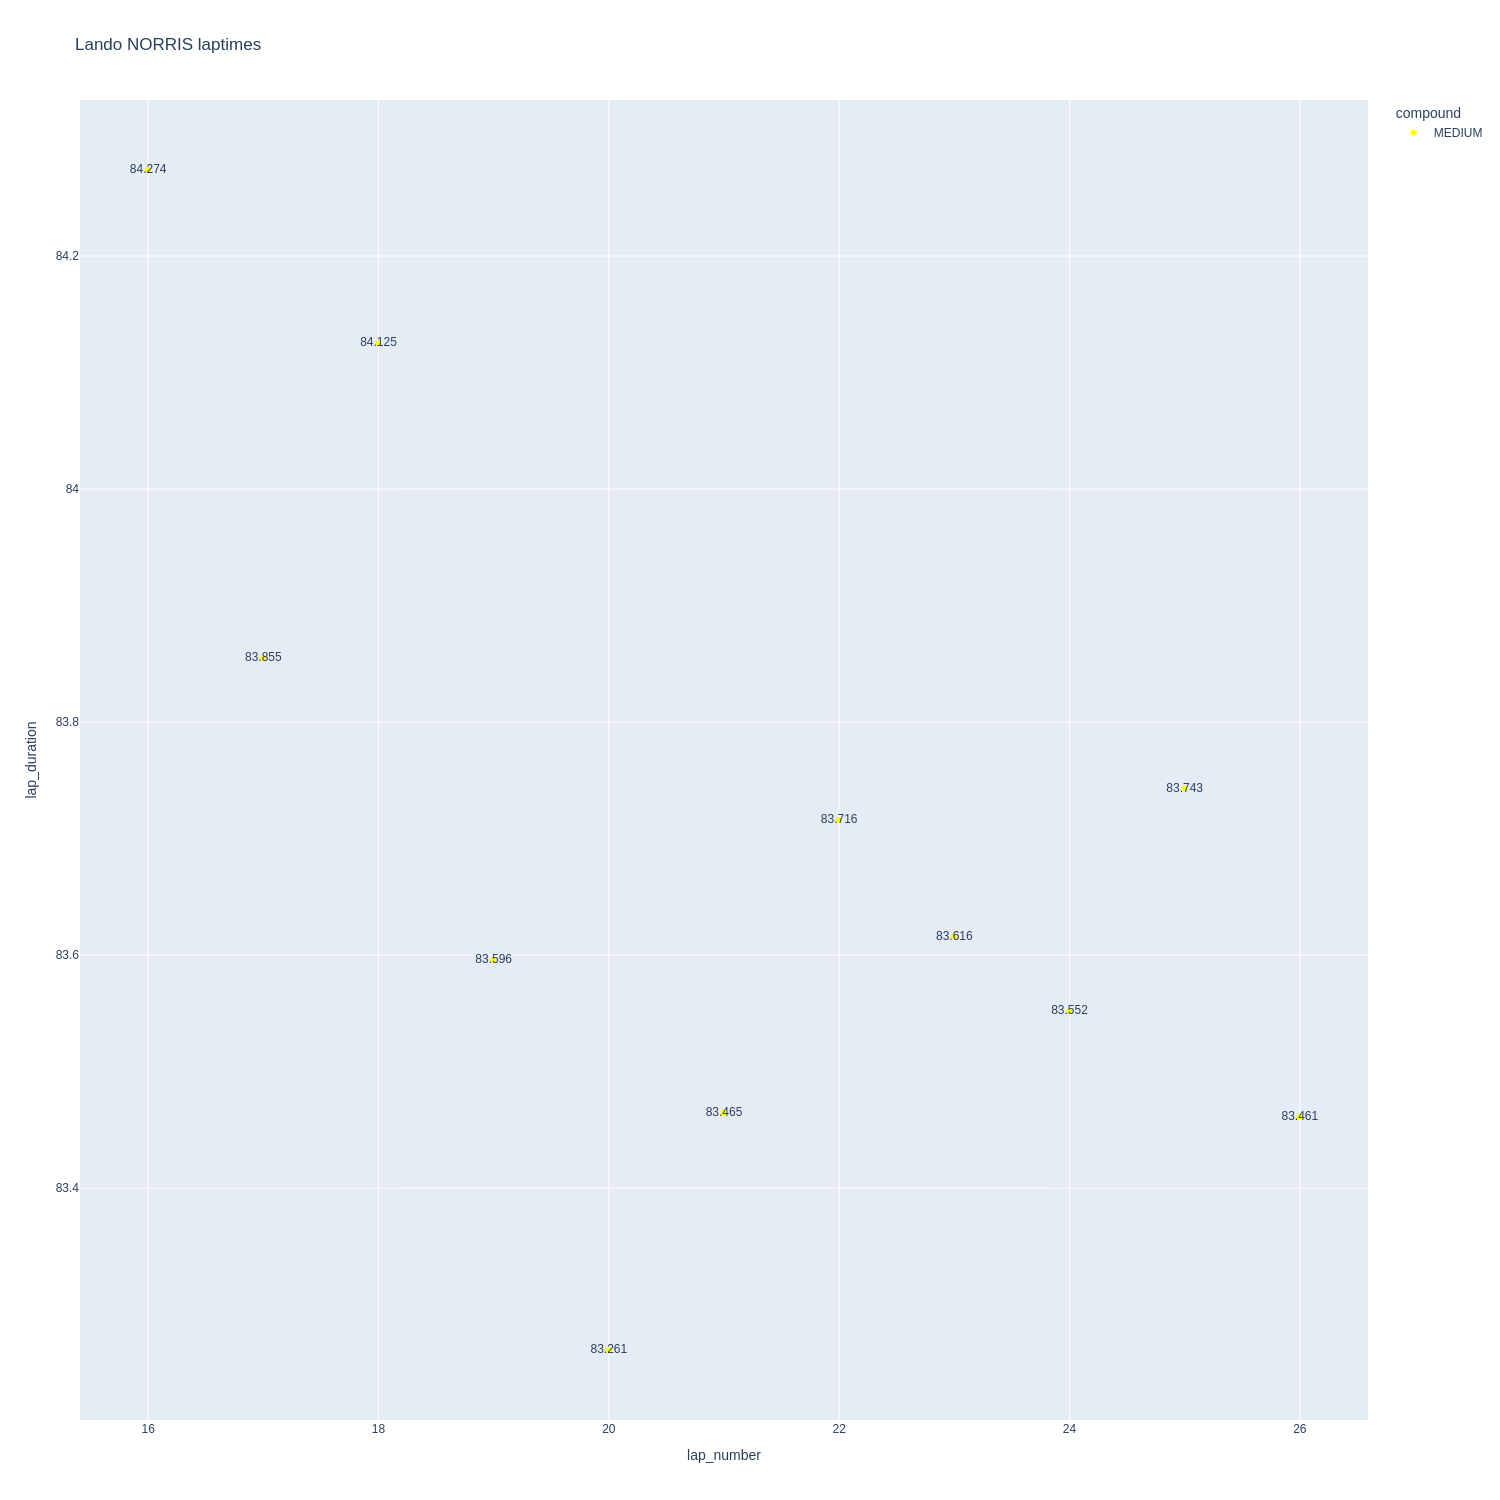

In [47]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

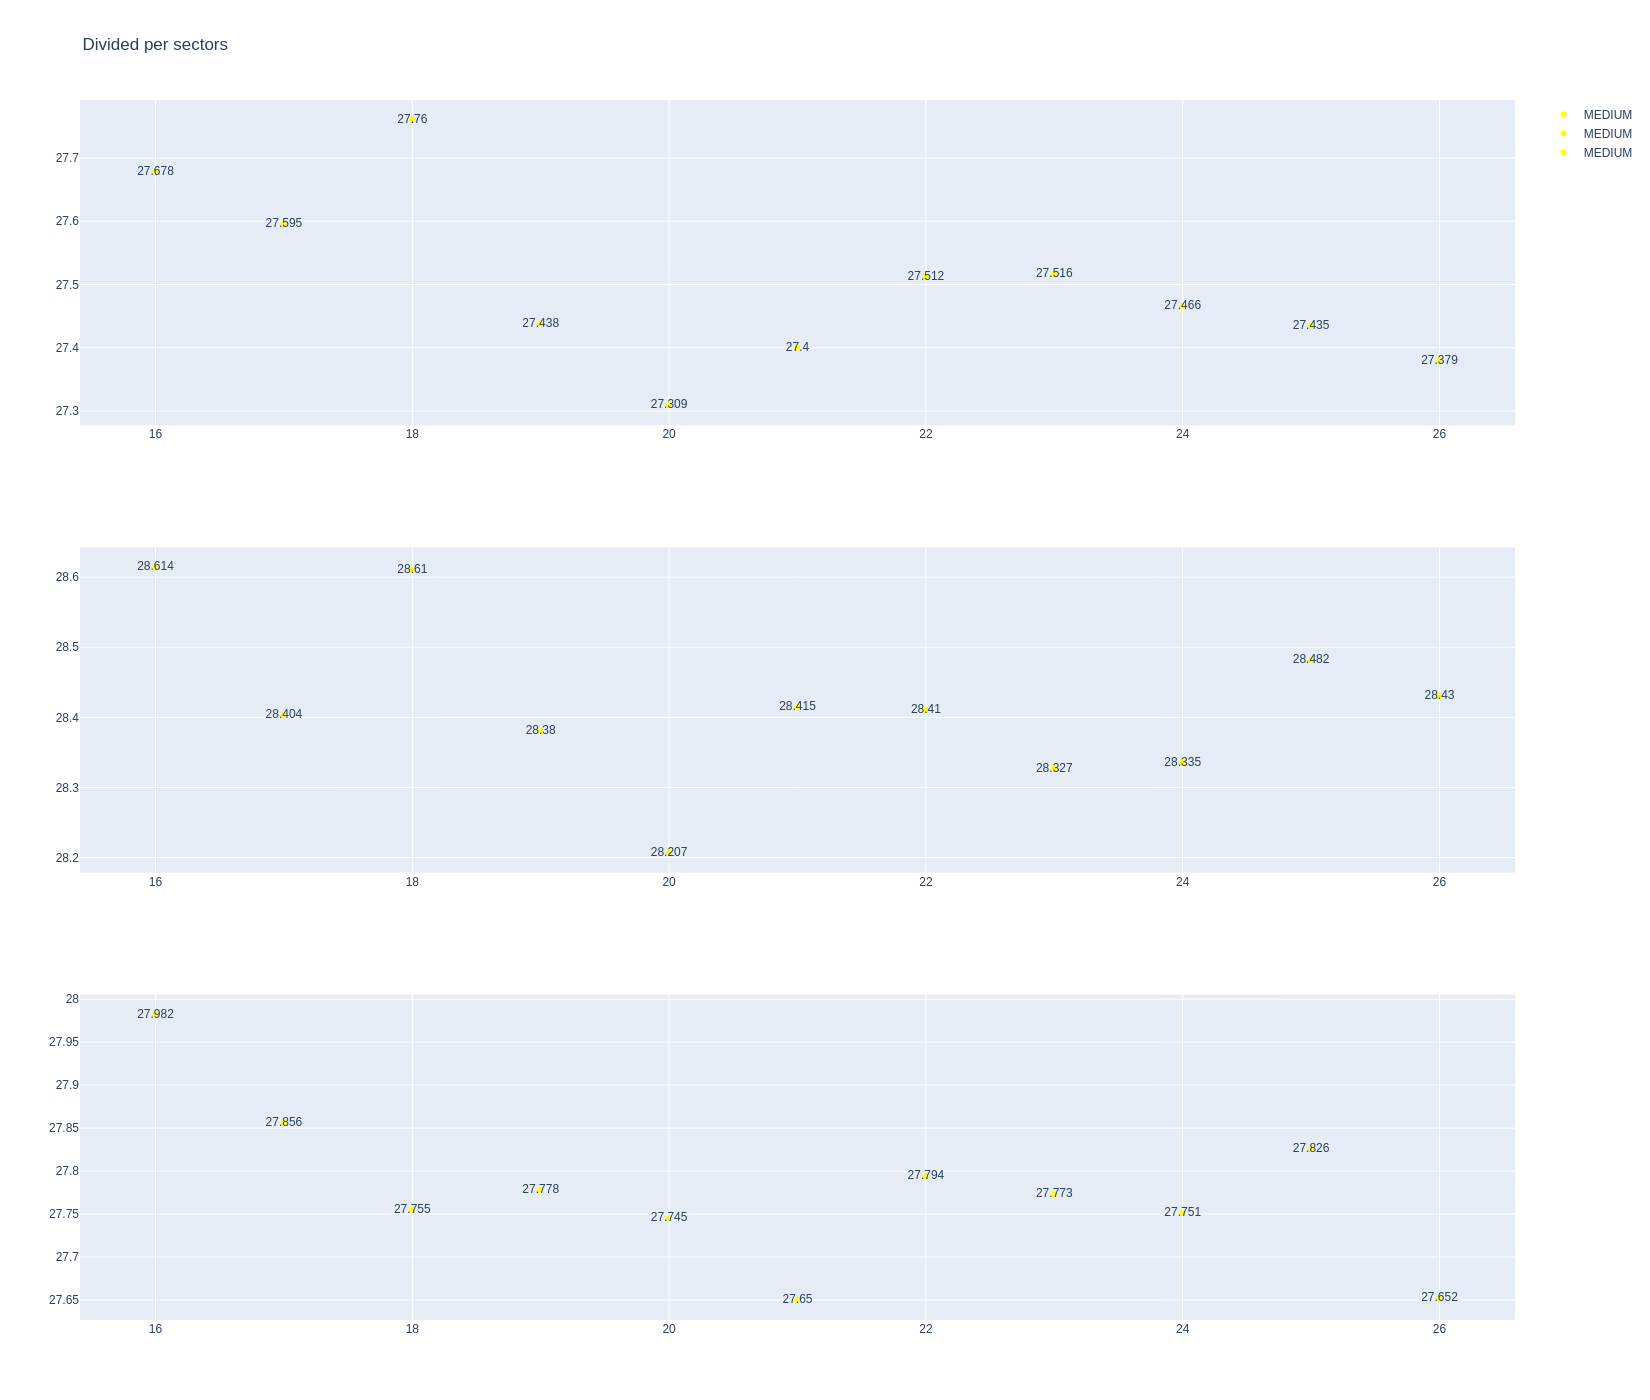

In [48]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [49]:
data = libraryDataF1.getinfolongruns(jointables2,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
333  Oscar PIASTRI   MEDIUM  2025-09-05T15:47:33.482000+00:00          19   
349  Oscar PIASTRI   MEDIUM  2025-09-05T15:48:57.722000+00:00          20   
368  Oscar PIASTRI   MEDIUM  2025-09-05T15:50:21.884000+00:00          21   
386  Oscar PIASTRI   MEDIUM  2025-09-05T15:51:46.299000+00:00          22   
405  Oscar PIASTRI   MEDIUM  2025-09-05T15:53:10.186000+00:00          23   
424  Oscar PIASTRI   MEDIUM  2025-09-05T15:54:34.381000+00:00          24   
442  Oscar PIASTRI   MEDIUM  2025-09-05T15:55:58.433000+00:00          25   
461  Oscar PIASTRI   MEDIUM  2025-09-05T15:57:22.103000+00:00          26   
477  Oscar PIASTRI   MEDIUM  2025-09-05T15:58:45.640000+00:00          27   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
333             27.837             28.576             27.893        84.306  
349             27.701             28.492             27.928        84.121  
368             27.680             28.755             27.901        84.336  
386             27.697             28.414             27.834        83.945  
405             27.528             28.616             28.110        84.254  
424             27.612             28.454             27.890        83.956  
442             27.520             28.396             27.823        83.739  
461             27.386             28.304             27.793        83.483  
477             27.462             28.564             27.848        83.874

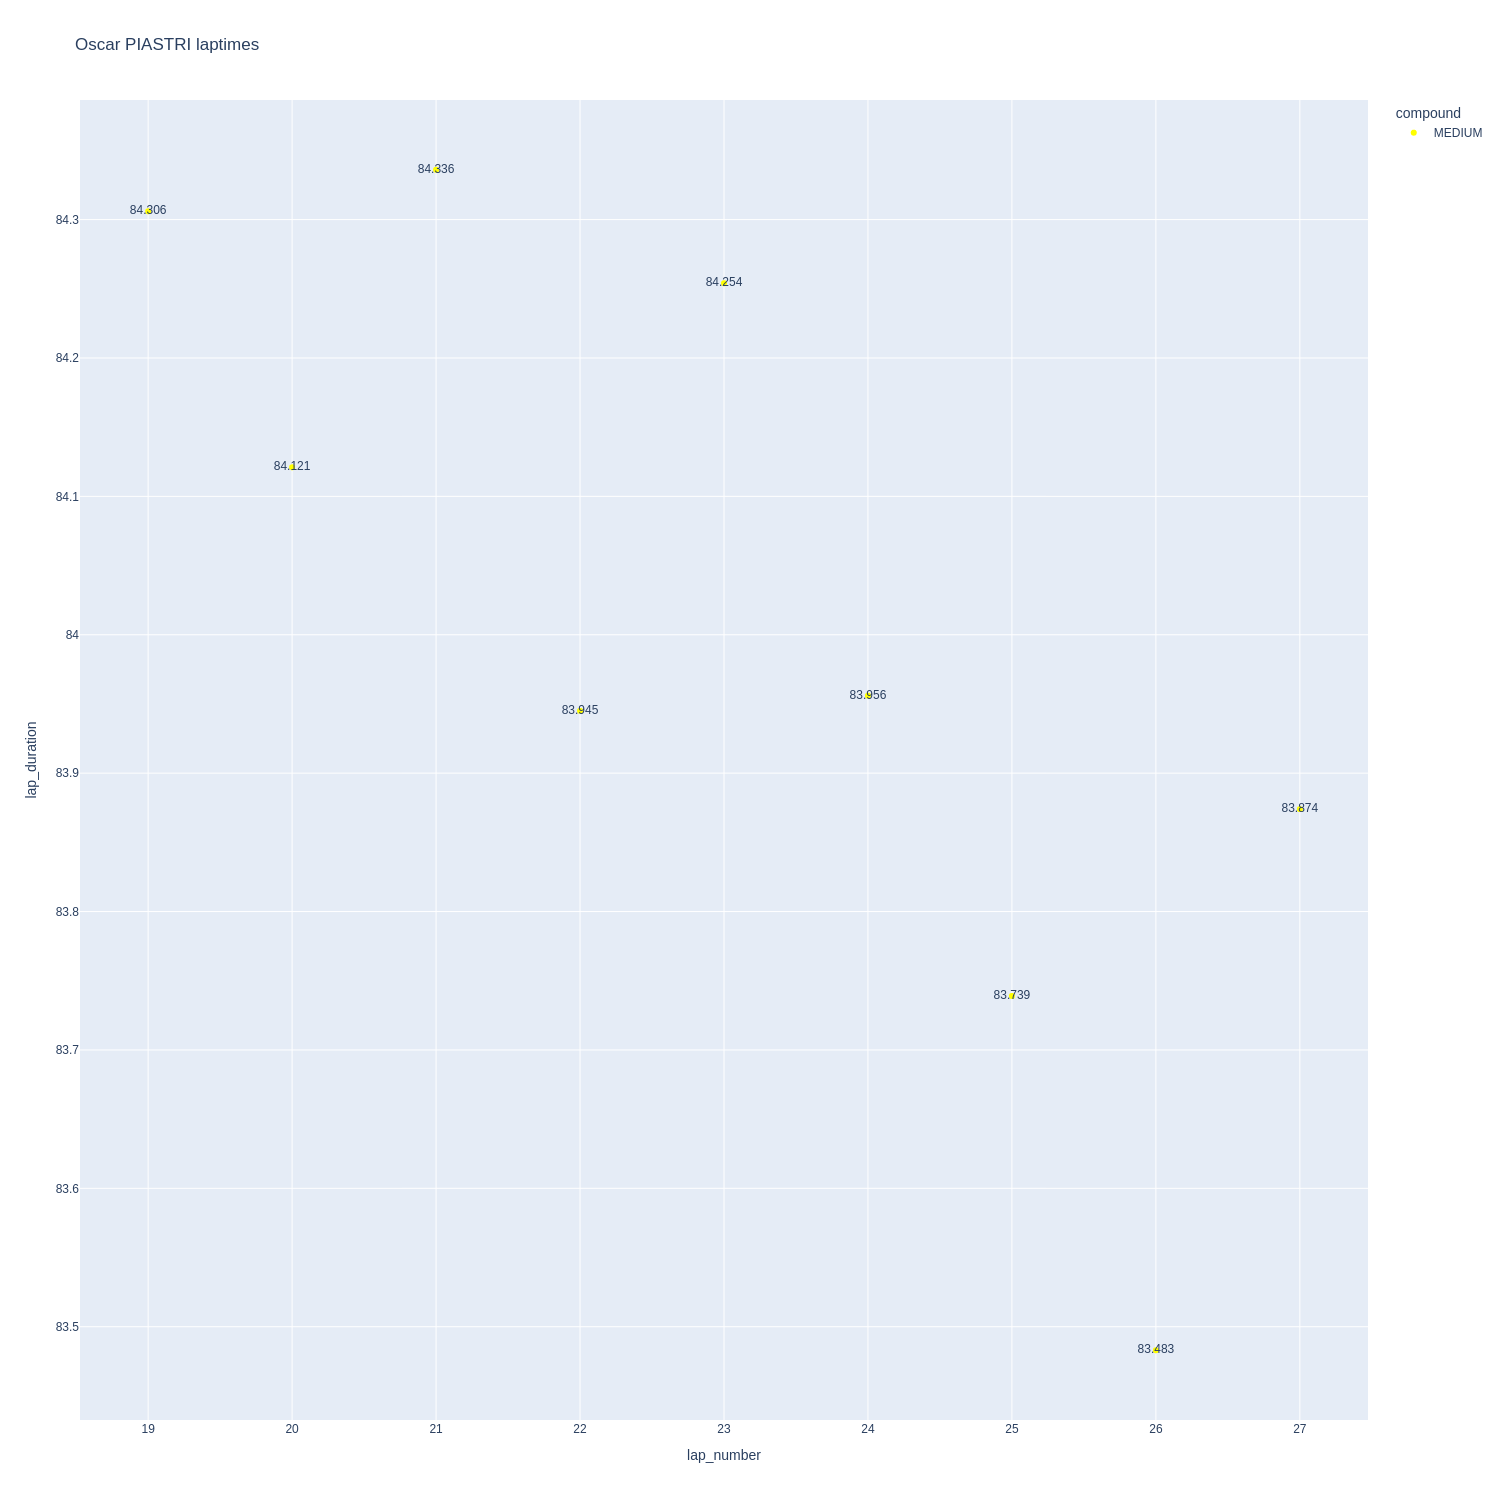

In [50]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

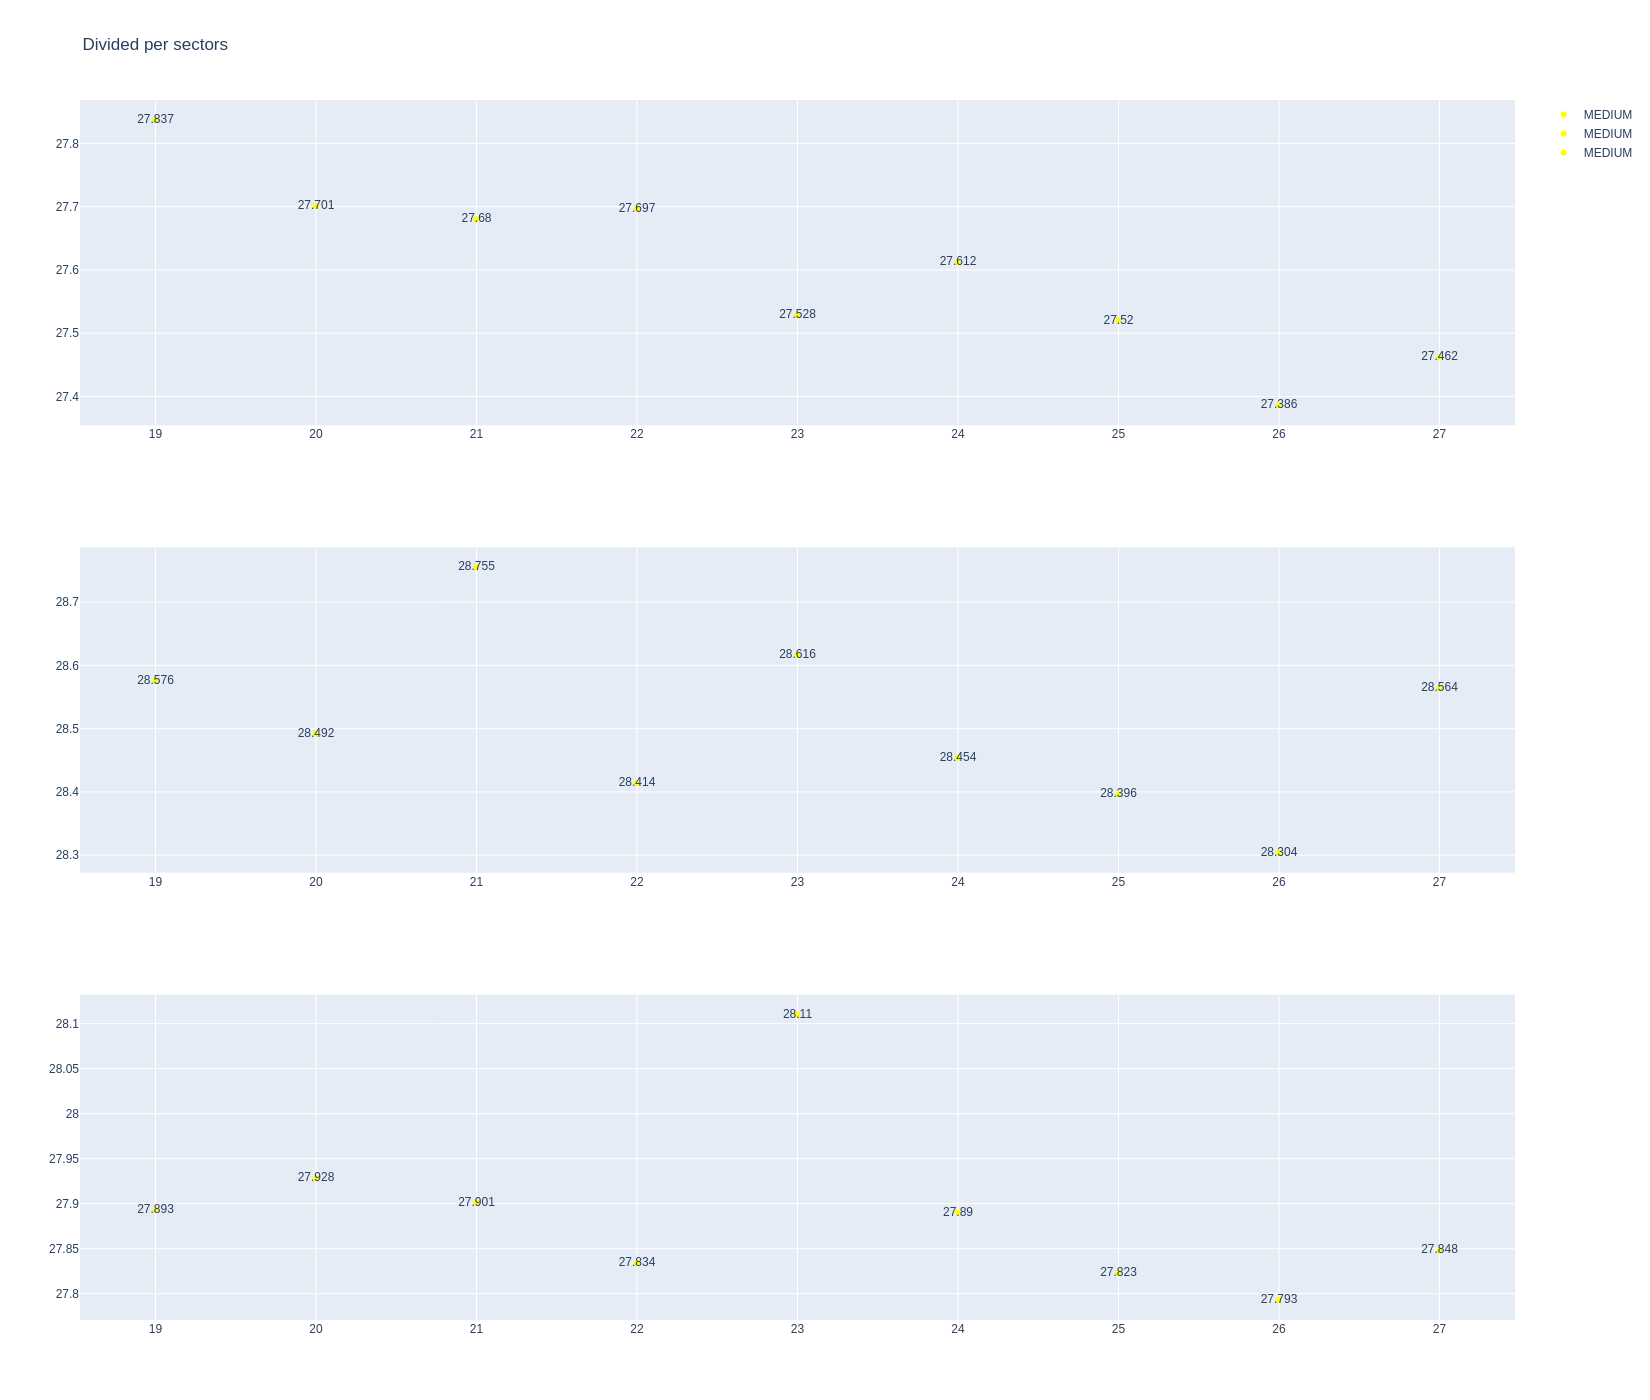

In [51]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Aston Martin

In [52]:
stintInformation.query('driver_number == 18 or driver_number == 14')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
14         1268         9906             1             14          1        5   
16         1268         9906             1             18          1        5   
46         1268         9906             2             18          6       12   
47         1268         9906             2             14          6       10   
75         1268         9906             3             14         11       17   
76         1268         9906             3             18         13       19   
84         1268         9906             4             14         18       26   
88         1268         9906             4             18         20       28   

   compound  tyre_age_at_start  
14   MEDIUM                  0  
16   MEDIUM                  0  
46   MEDIUM                  5  
47   MEDIUM                  5  
75     SOFT                  0  
76     SOFT                  0  
84   MEDIUM                 10  
88   MEDIUM                 12

In [53]:
data = libraryDataF1.getinfolongruns(jointables2,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
120  Fernando ALONSO   MEDIUM  2025-09-05T15:17:41.224000+00:00           7   
385  Fernando ALONSO   MEDIUM  2025-09-05T15:51:44.331000+00:00          19   
404  Fernando ALONSO   MEDIUM  2025-09-05T15:53:09.354000+00:00          20   
423  Fernando ALONSO   MEDIUM  2025-09-05T15:54:34.101000+00:00          21   
443  Fernando ALONSO   MEDIUM  2025-09-05T15:55:59.470000+00:00          22   
462  Fernando ALONSO   MEDIUM  2025-09-05T15:57:23.418000+00:00          23   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
120             27.159             27.054             30.653        84.866  
385             27.958             28.745             28.310        85.013  
404             27.735             28.840             28.209        84.784  
423             28.260             28.934             28.171        85.365  
443             27.505             28.462             28.030        83.997  
462             27.488             28.629             28.341        84.458

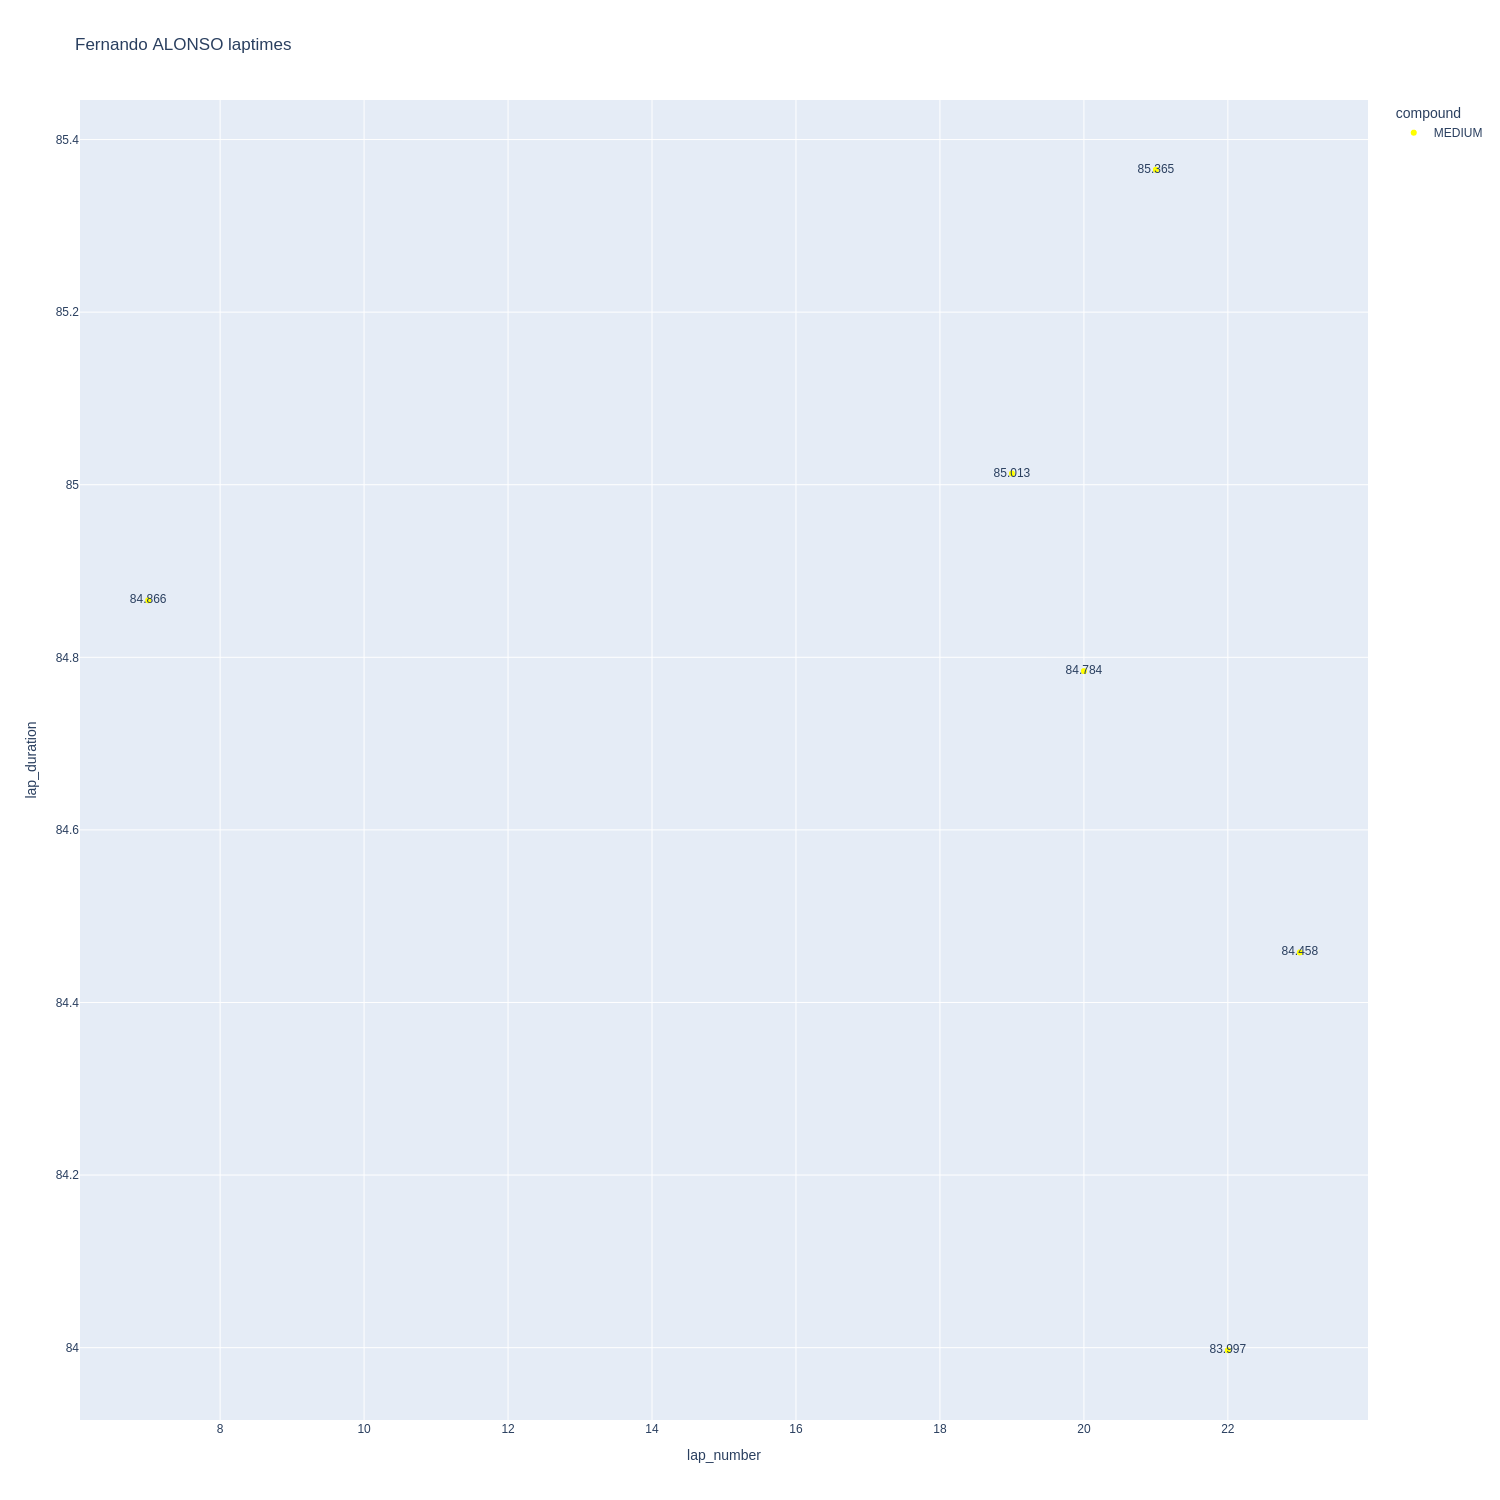

In [54]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

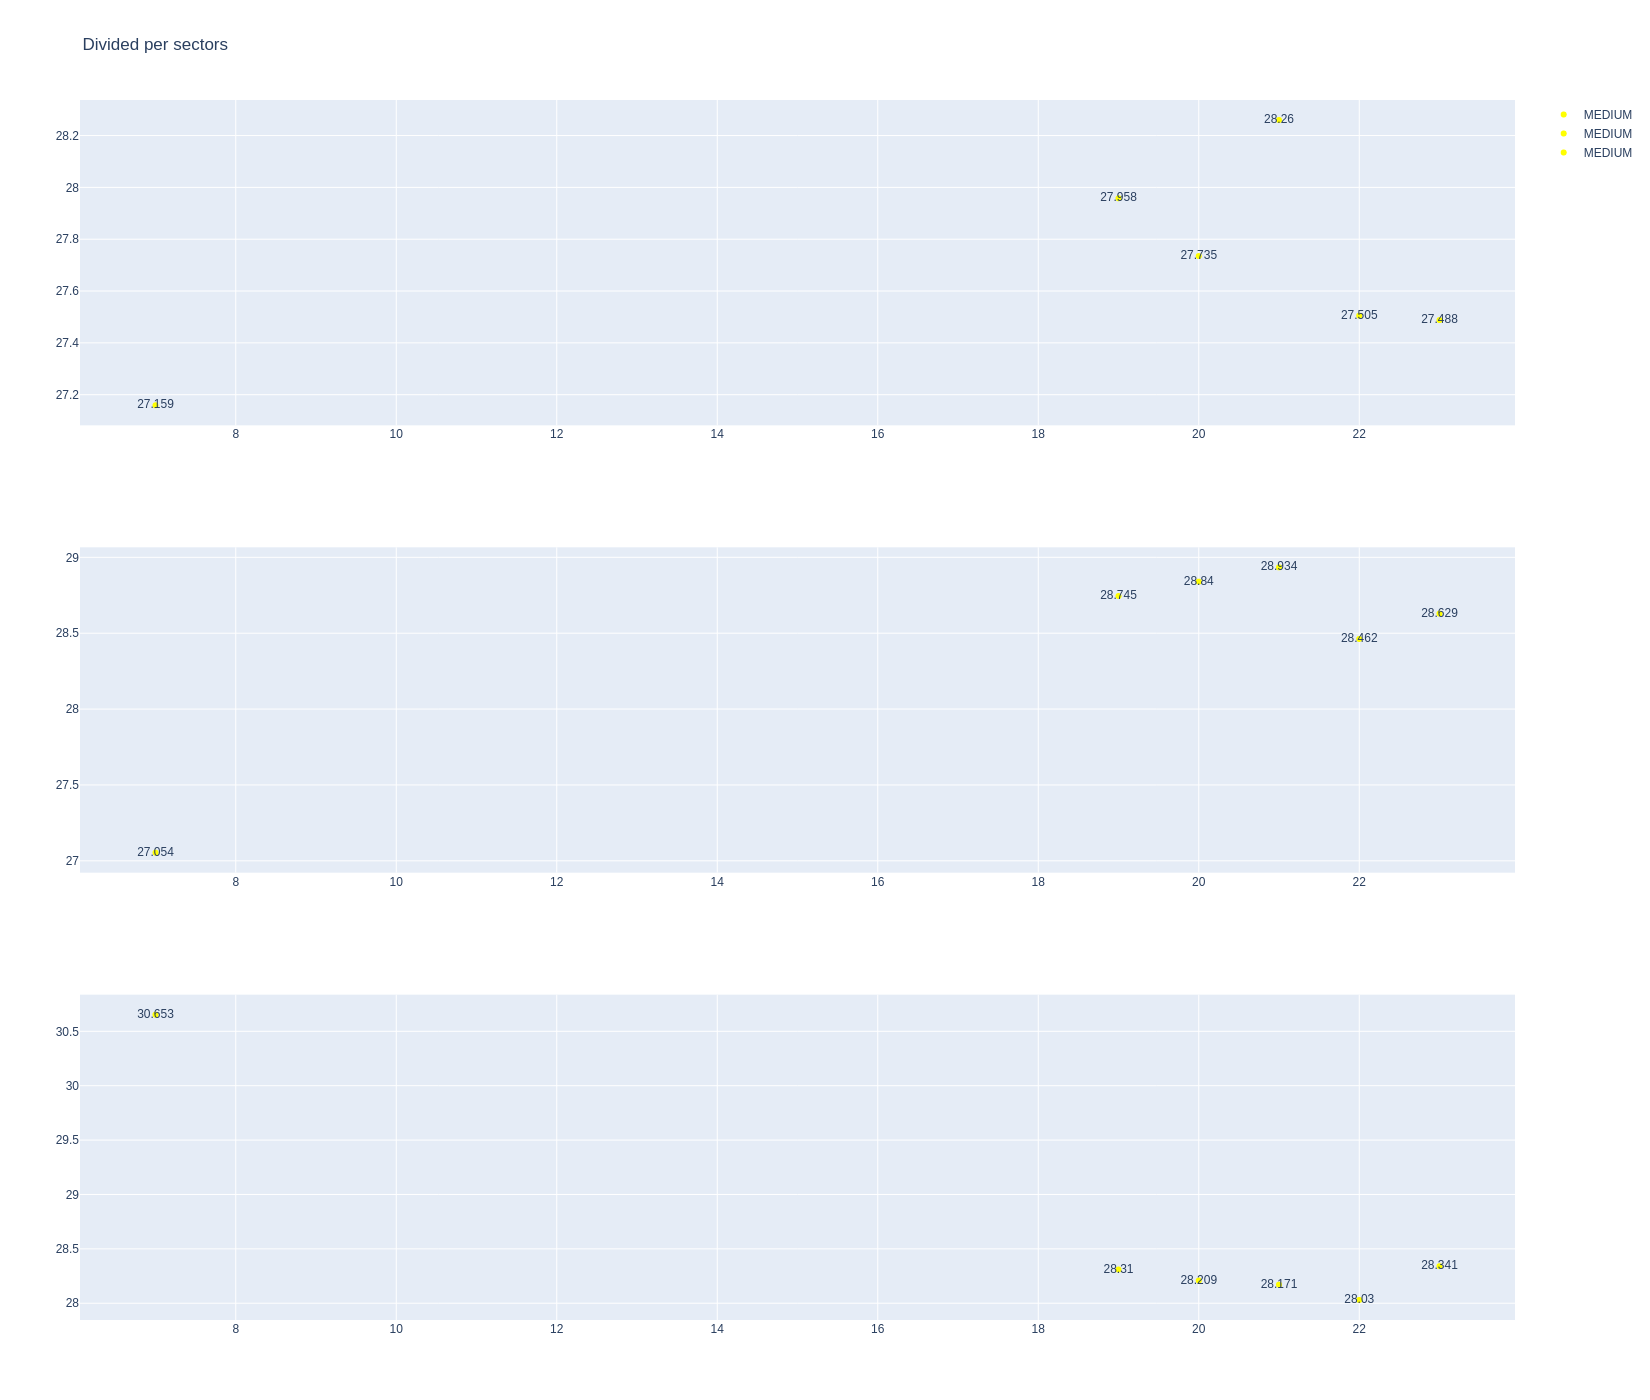

In [55]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [56]:
data = libraryDataF1.getinfolongruns(jointables2,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
387  Lance STROLL   MEDIUM  2025-09-05T15:51:54.312000+00:00          21   
406  Lance STROLL   MEDIUM  2025-09-05T15:53:19.026000+00:00          22   
425  Lance STROLL   MEDIUM  2025-09-05T15:54:43.684000+00:00          23   
444  Lance STROLL   MEDIUM  2025-09-05T15:56:08.230000+00:00          24   
463  Lance STROLL   MEDIUM  2025-09-05T15:57:32.429000+00:00          25   
481  Lance STROLL   MEDIUM  2025-09-05T15:58:57.948000+00:00          26   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
387             27.782             28.728             28.306        84.816  
406             27.729             28.875             28.139        84.743  
425             27.699             28.675             28.110        84.484  
444             27.607             28.499             28.062        84.168  
463             27.644             28.748             29.144        85.536  
481             27.709             28.589             28.565        84.863

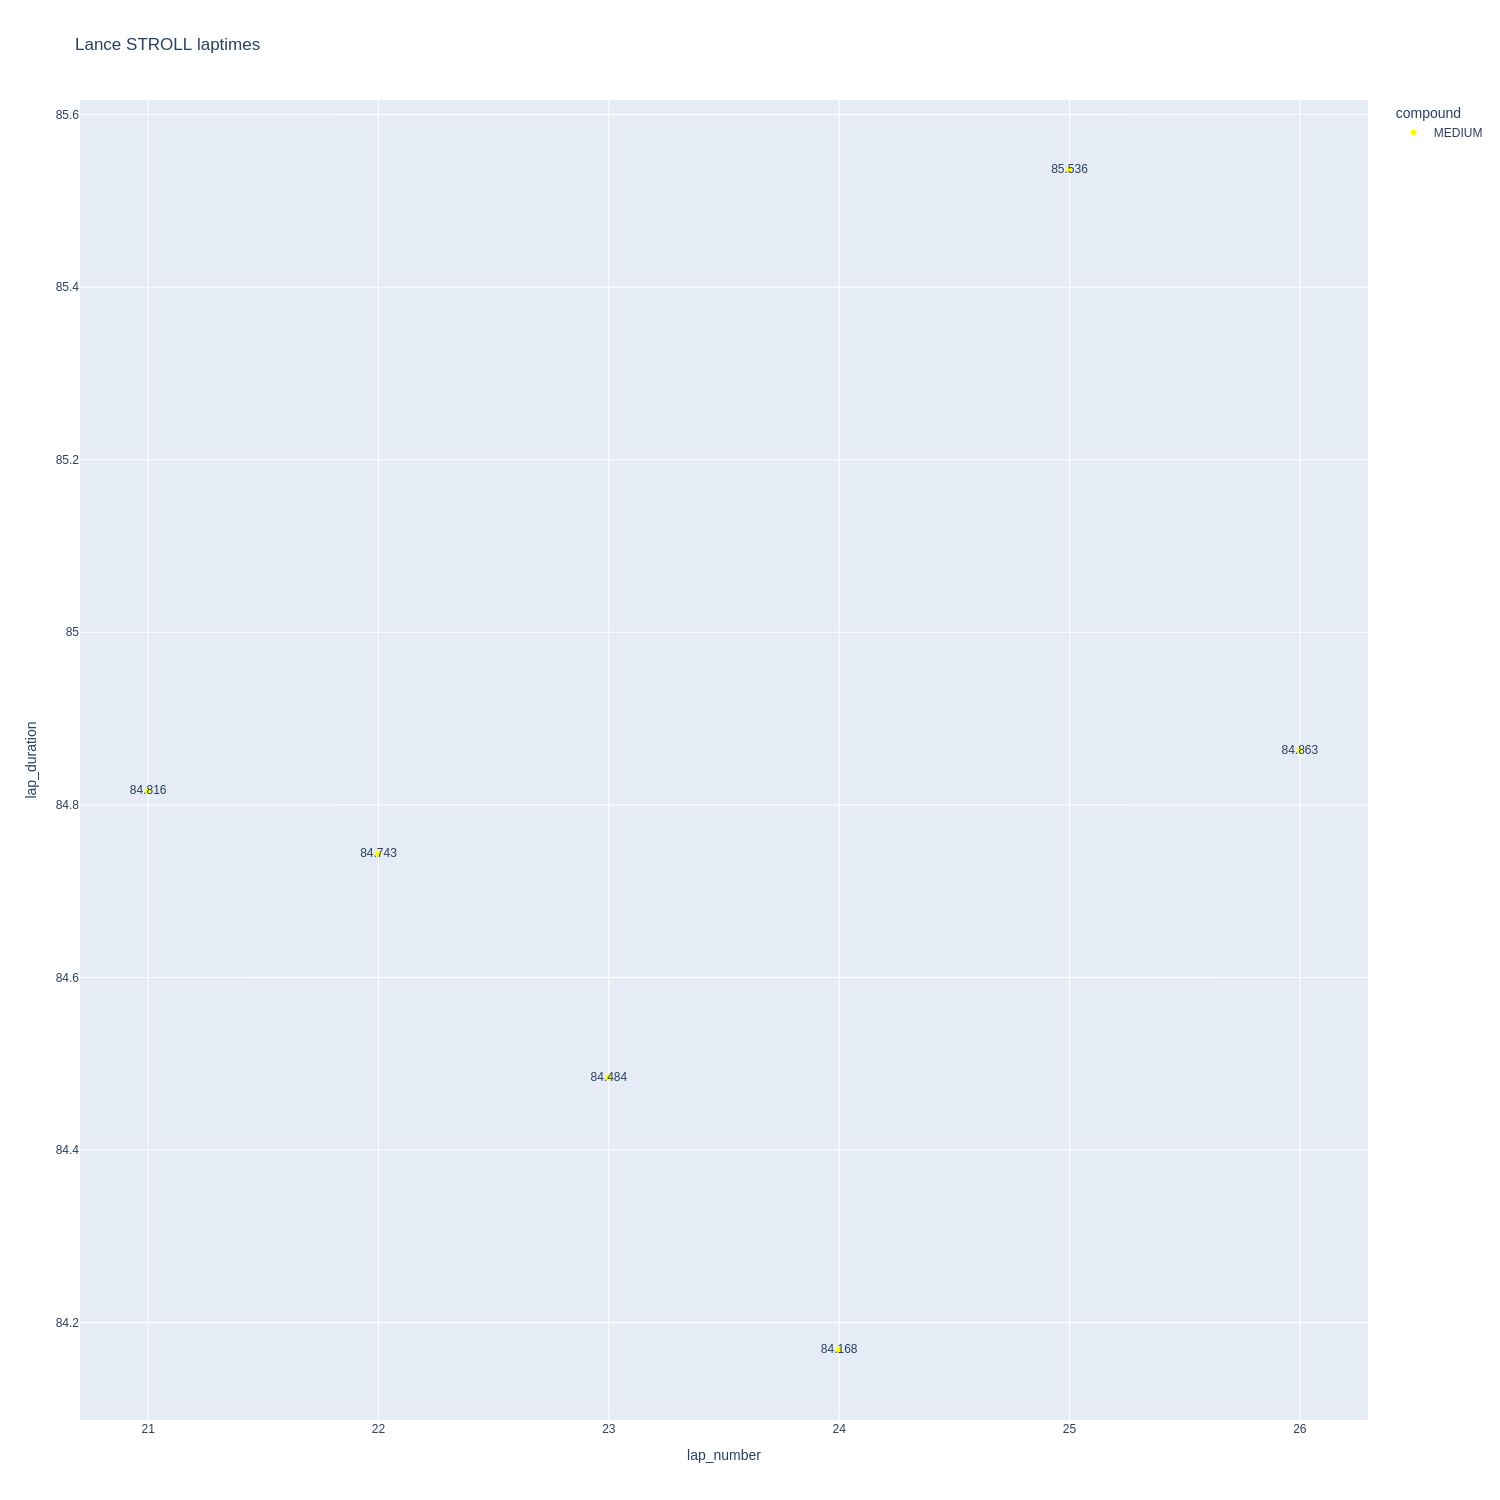

In [57]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

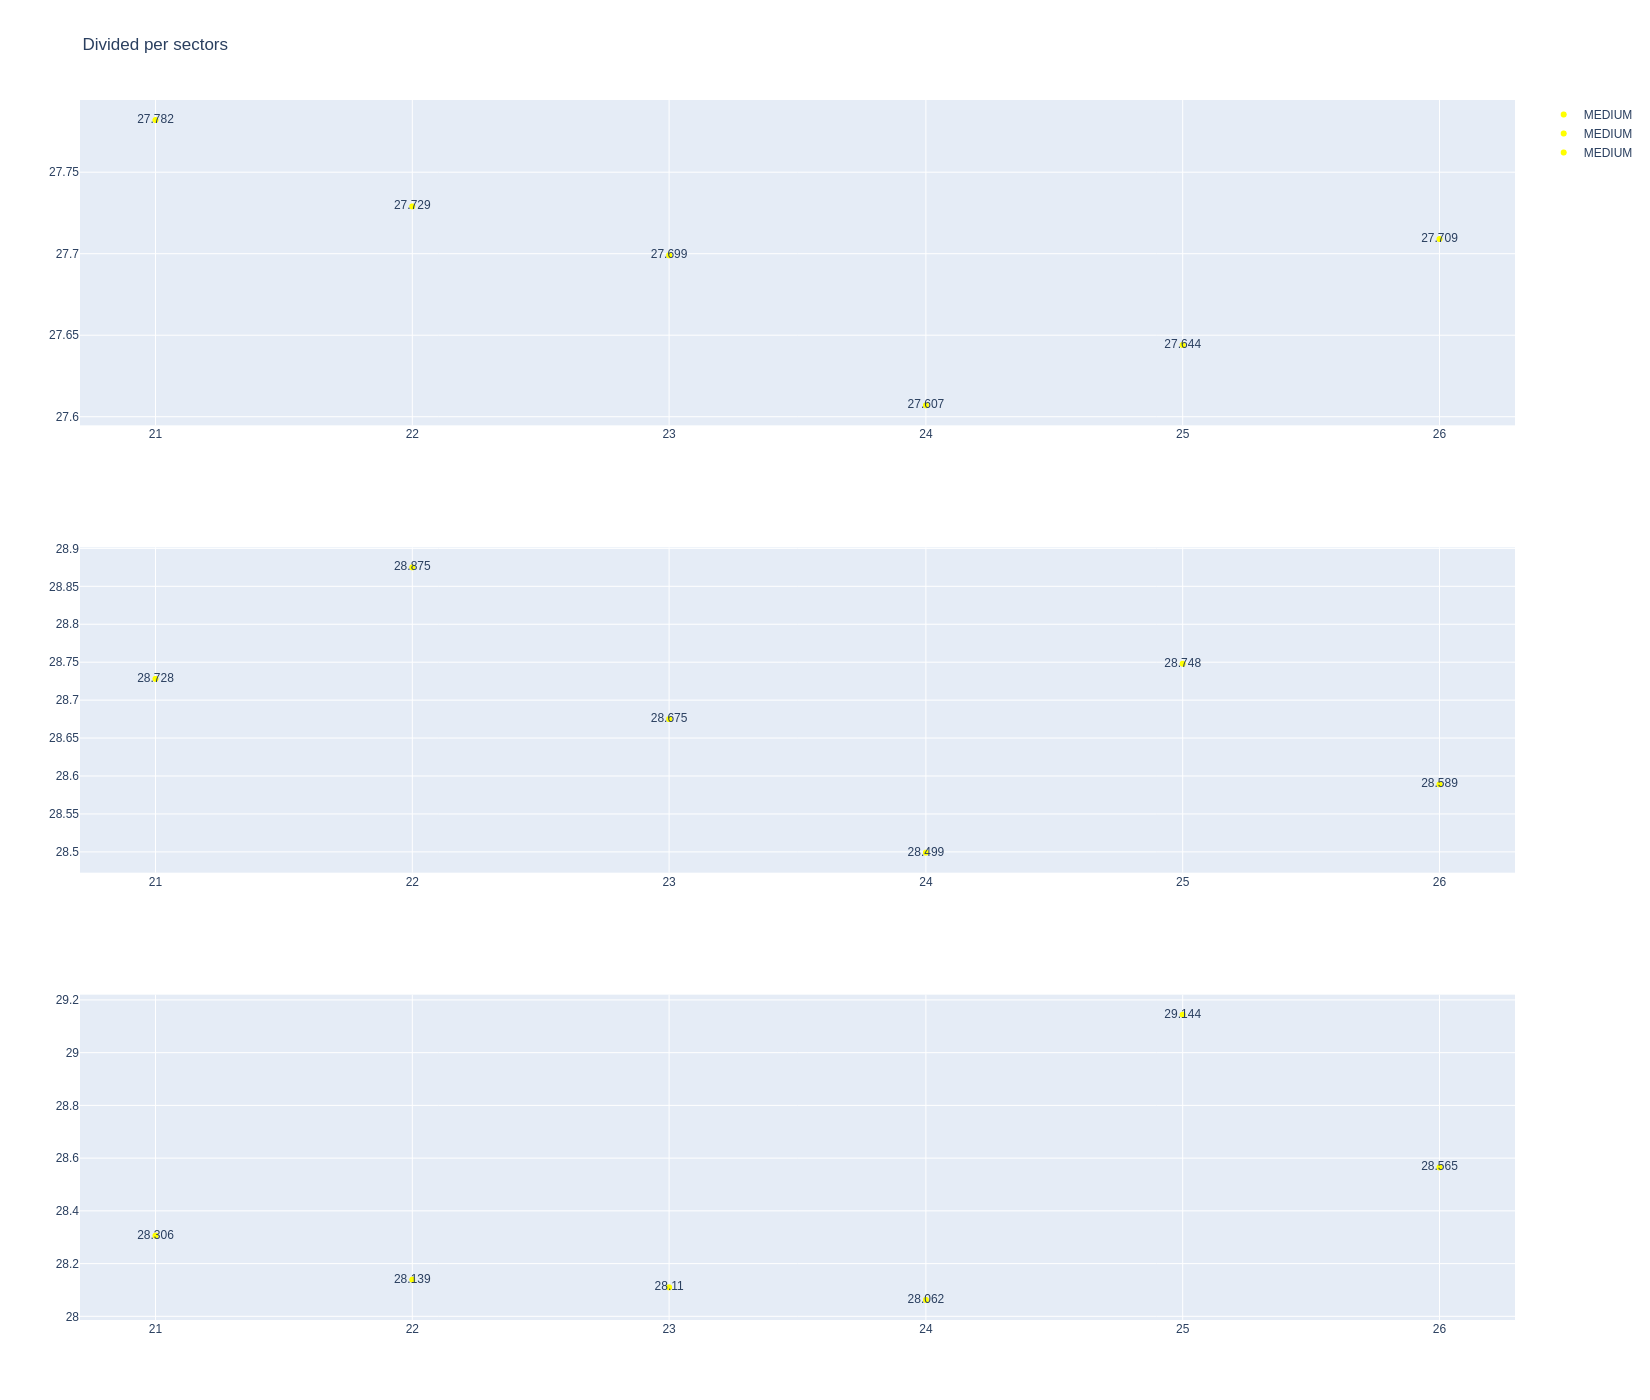

In [58]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### RB

In [59]:
stintInformation.query('driver_number == 30 or driver_number == 6')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
3          1268         9906             1             30          1        3   
6          1268         9906             2             30          4        4   
7          1268         9906             1              6          1        3   
27         1268         9906             2              6          4        4   
38         1268         9906             3             30          5        7   
44         1268         9906             3              6          5        7   
53         1268         9906             4             30          8       10   
56         1268         9906             4              6          8       10   
68         1268         9906             5             30         11       13   
72         1268         9906             5              6         11       13   
86         1268         9906             6             30         14       25   
90         1268         9906             6              6         14       24   

   compound  tyre_age_at_start  
3    MEDIUM                  0  
6    MEDIUM                  3  
7    MEDIUM                  0  
27   MEDIUM                  3  
38   MEDIUM                  4  
44   MEDIUM                  4  
53     SOFT                  0  
56     SOFT                  0  
68     SOFT                  3  
72     SOFT                  0  
86   MEDIUM                  7  
90   MEDIUM                  7

In [60]:
data = libraryDataF1.getinfolongruns(jointables2,30,'Racing Bulls',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
331  Liam LAWSON   MEDIUM  2025-09-05T15:47:27.744000+00:00          15   
348  Liam LAWSON   MEDIUM  2025-09-05T15:48:52.860000+00:00          16   
367  Liam LAWSON   MEDIUM  2025-09-05T15:50:17.912000+00:00          17   
384  Liam LAWSON   MEDIUM  2025-09-05T15:51:42.554000+00:00          18   
403  Liam LAWSON   MEDIUM  2025-09-05T15:53:07.215000+00:00          19   
422  Liam LAWSON   MEDIUM  2025-09-05T15:54:31.993000+00:00          20   
441  Liam LAWSON   MEDIUM  2025-09-05T15:55:56.263000+00:00          21   
460  Liam LAWSON   MEDIUM  2025-09-05T15:57:20.410000+00:00          22   
476  Liam LAWSON   MEDIUM  2025-09-05T15:58:44.196000+00:00          23   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
331             28.002             28.829             28.209        85.040  
348             28.040             28.815             28.181        85.036  
367             27.885             28.777             28.070        84.732  
384             27.884             28.711             28.040        84.635  
403             27.878             28.733             28.106        84.717  
422             27.849             28.637             27.901        84.387  
441             27.687             28.513             27.833        84.033  
460             27.600             28.393             27.802        83.795  
476             27.622             28.627             28.071        84.320

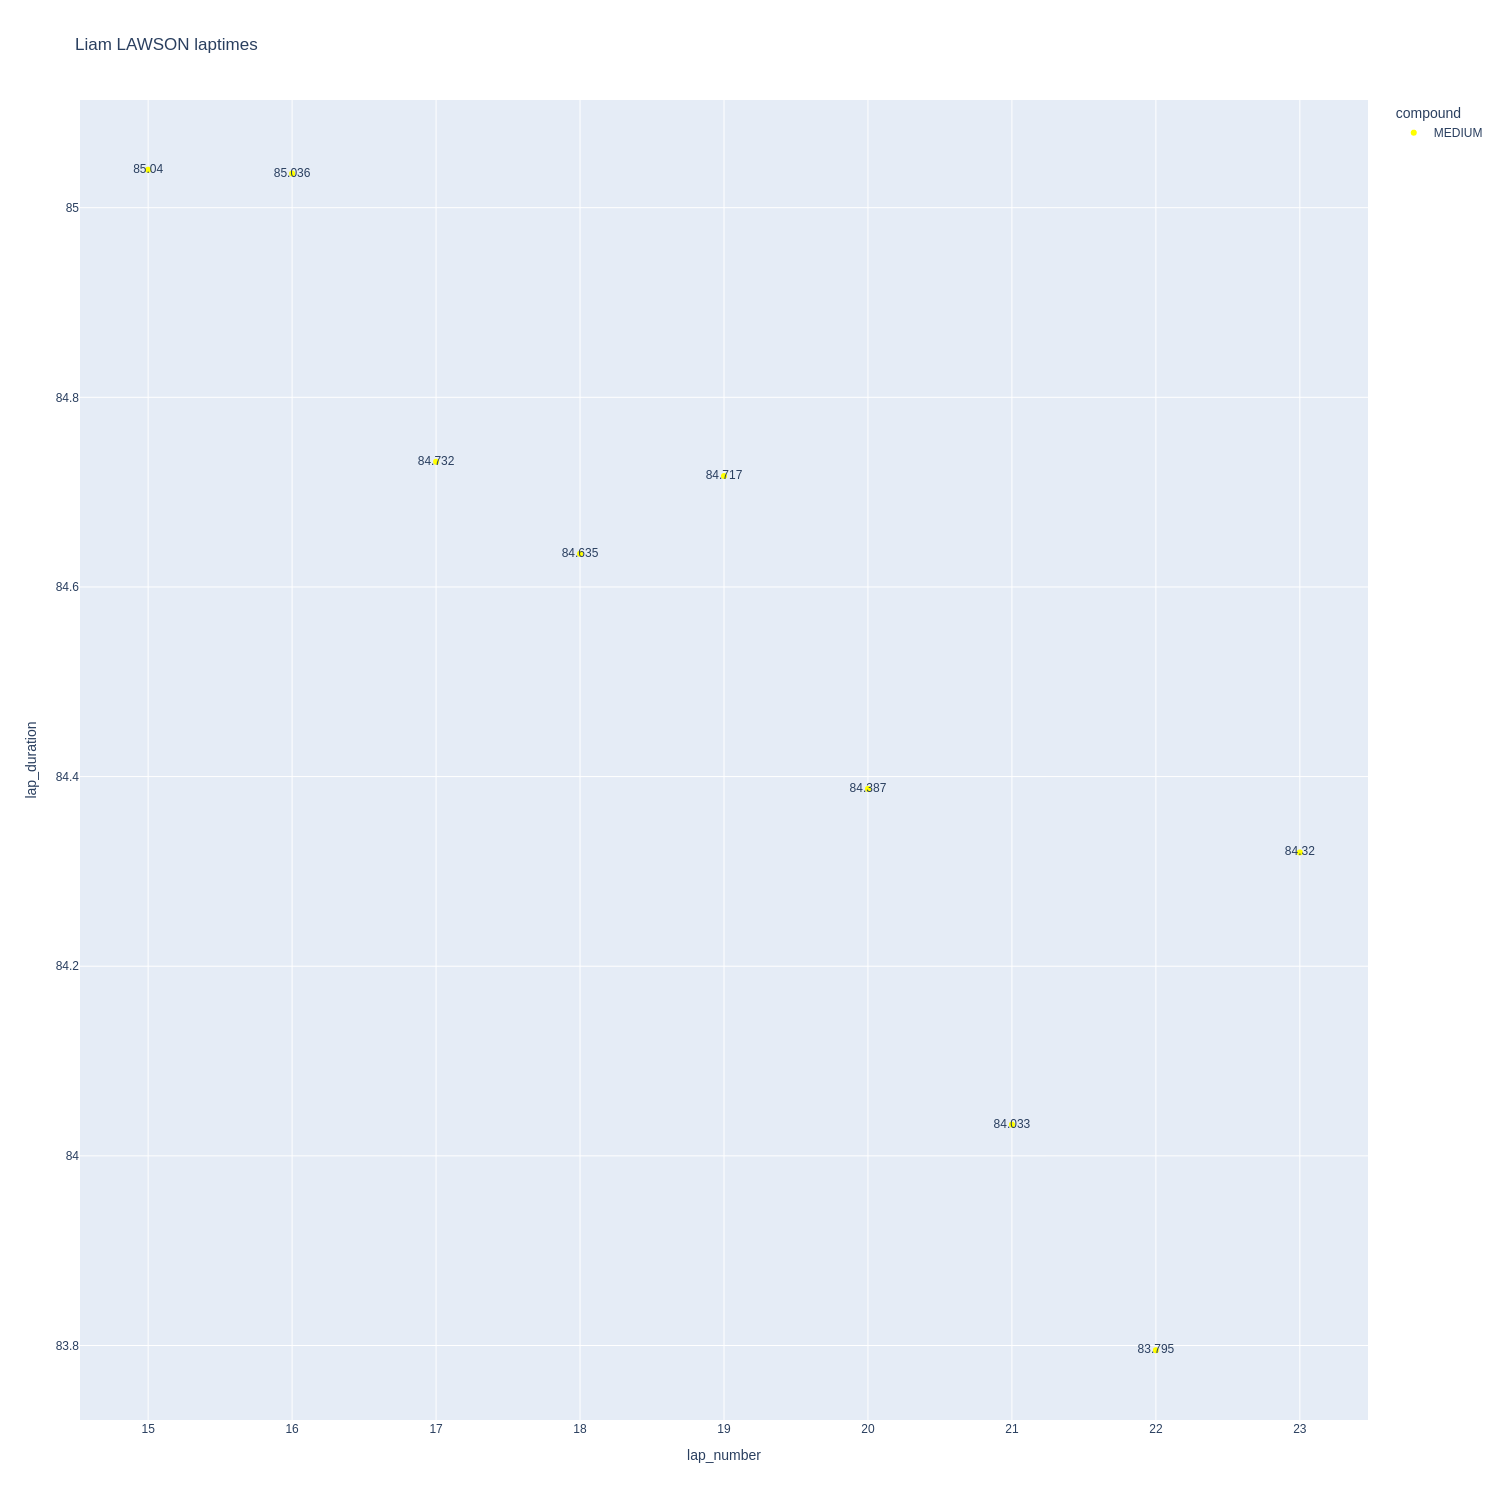

In [61]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

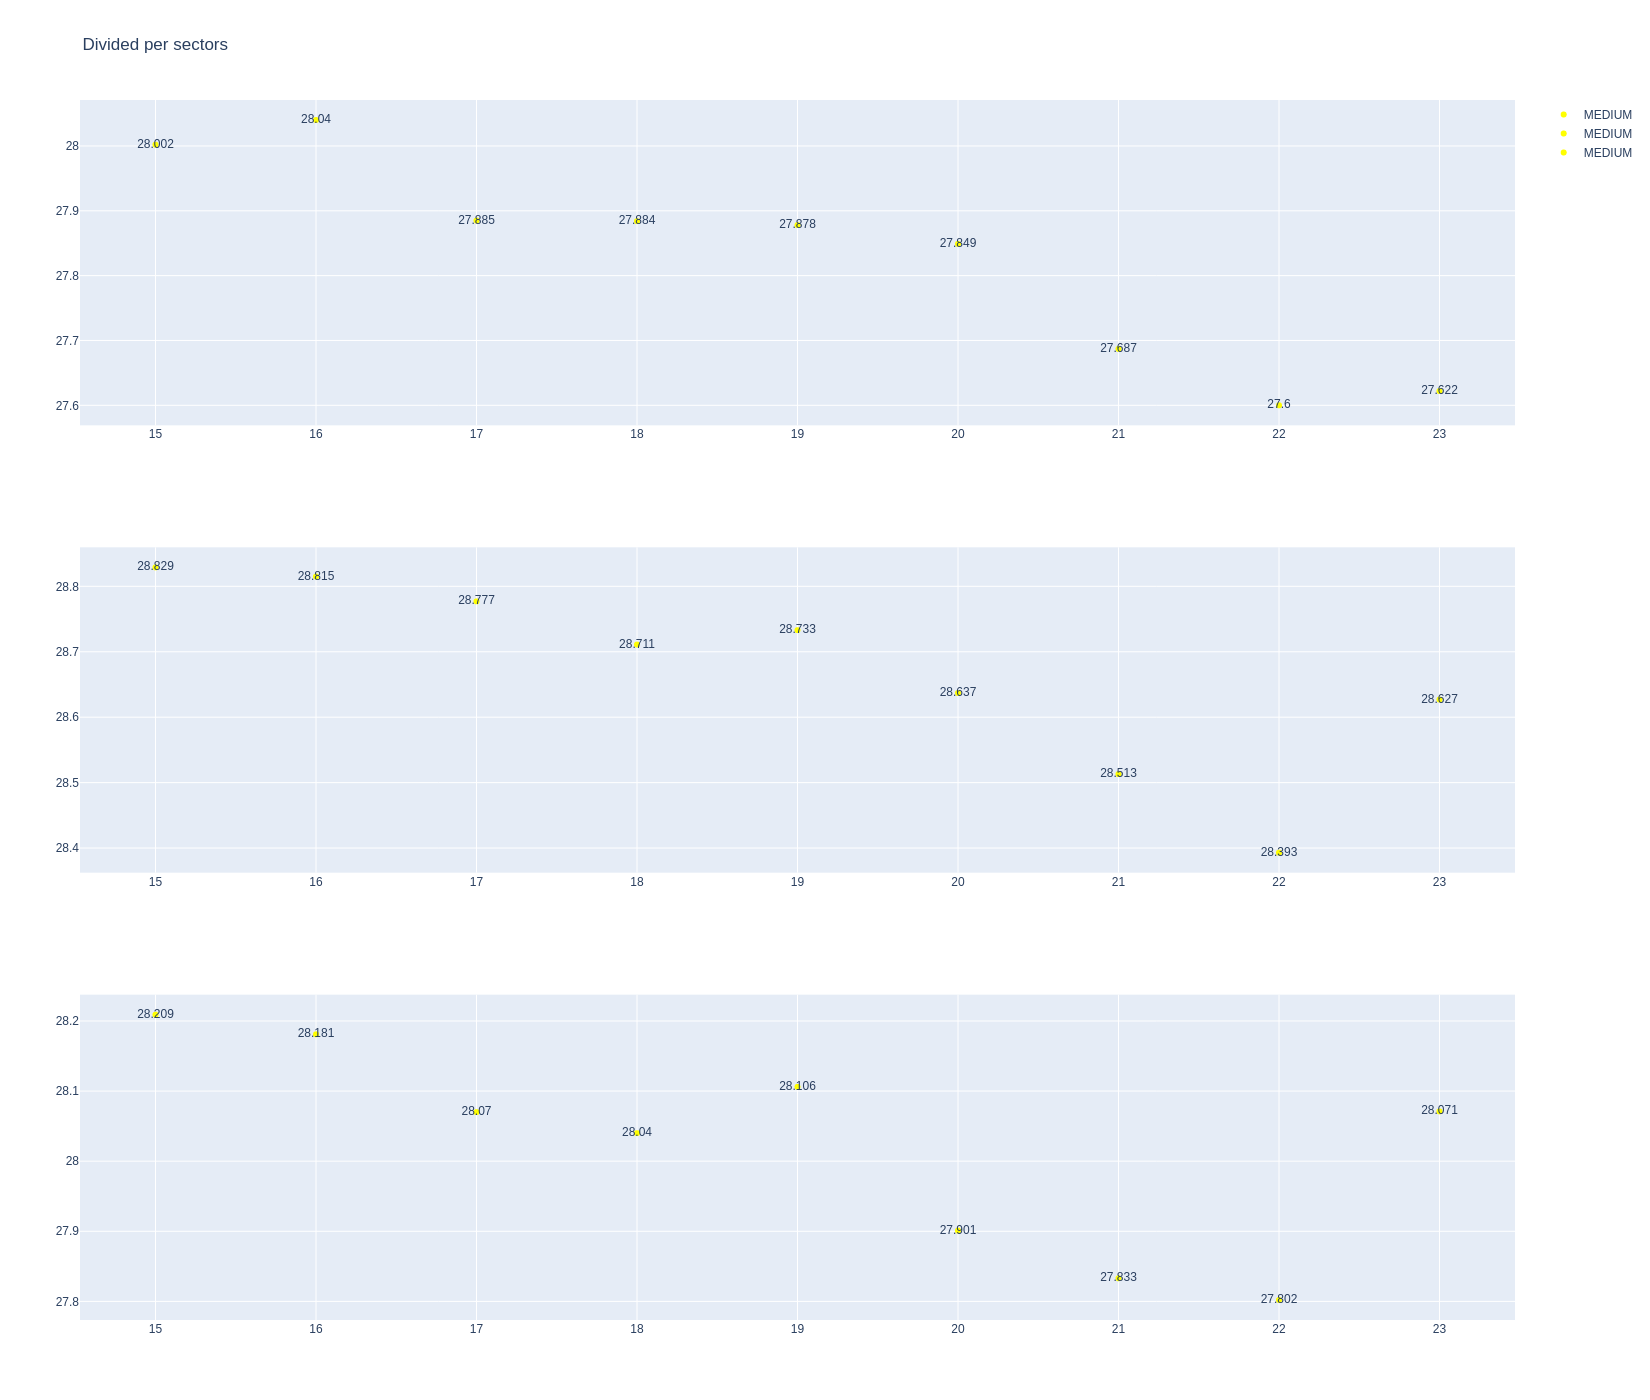

In [62]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [63]:
data = libraryDataF1.getinfolongruns(jointables2,6,'Racing Bulls',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
35   Isack HADJAR   MEDIUM  2025-09-05T15:03:34.120000+00:00           2   
350  Isack HADJAR   MEDIUM  2025-09-05T15:49:09.556000+00:00          15   
369  Isack HADJAR   MEDIUM  2025-09-05T15:50:34.483000+00:00          16   
388  Isack HADJAR   MEDIUM  2025-09-05T15:51:59.206000+00:00          17   
407  Isack HADJAR   MEDIUM  2025-09-05T15:53:23.183000+00:00          18   
426  Isack HADJAR   MEDIUM  2025-09-05T15:54:46.941000+00:00          19   
445  Isack HADJAR   MEDIUM  2025-09-05T15:56:11.247000+00:00          20   
464  Isack HADJAR   MEDIUM  2025-09-05T15:57:36.934000+00:00          21   
483  Isack HADJAR   MEDIUM  2025-09-05T15:59:01.329000+00:00          22   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
35              27.764             27.740             28.027        83.531  
350             28.068             28.628             28.078        84.774  
369             27.896             28.685             28.191        84.772  
388             27.588             28.463             27.978        84.029  
407             27.501             28.440             27.915        83.856  
426             27.636             28.608             28.011        84.255  
445             28.873             28.730             28.055        85.658  
464             27.666             28.650             28.020        84.336  
483             27.595             28.699             27.858        84.152

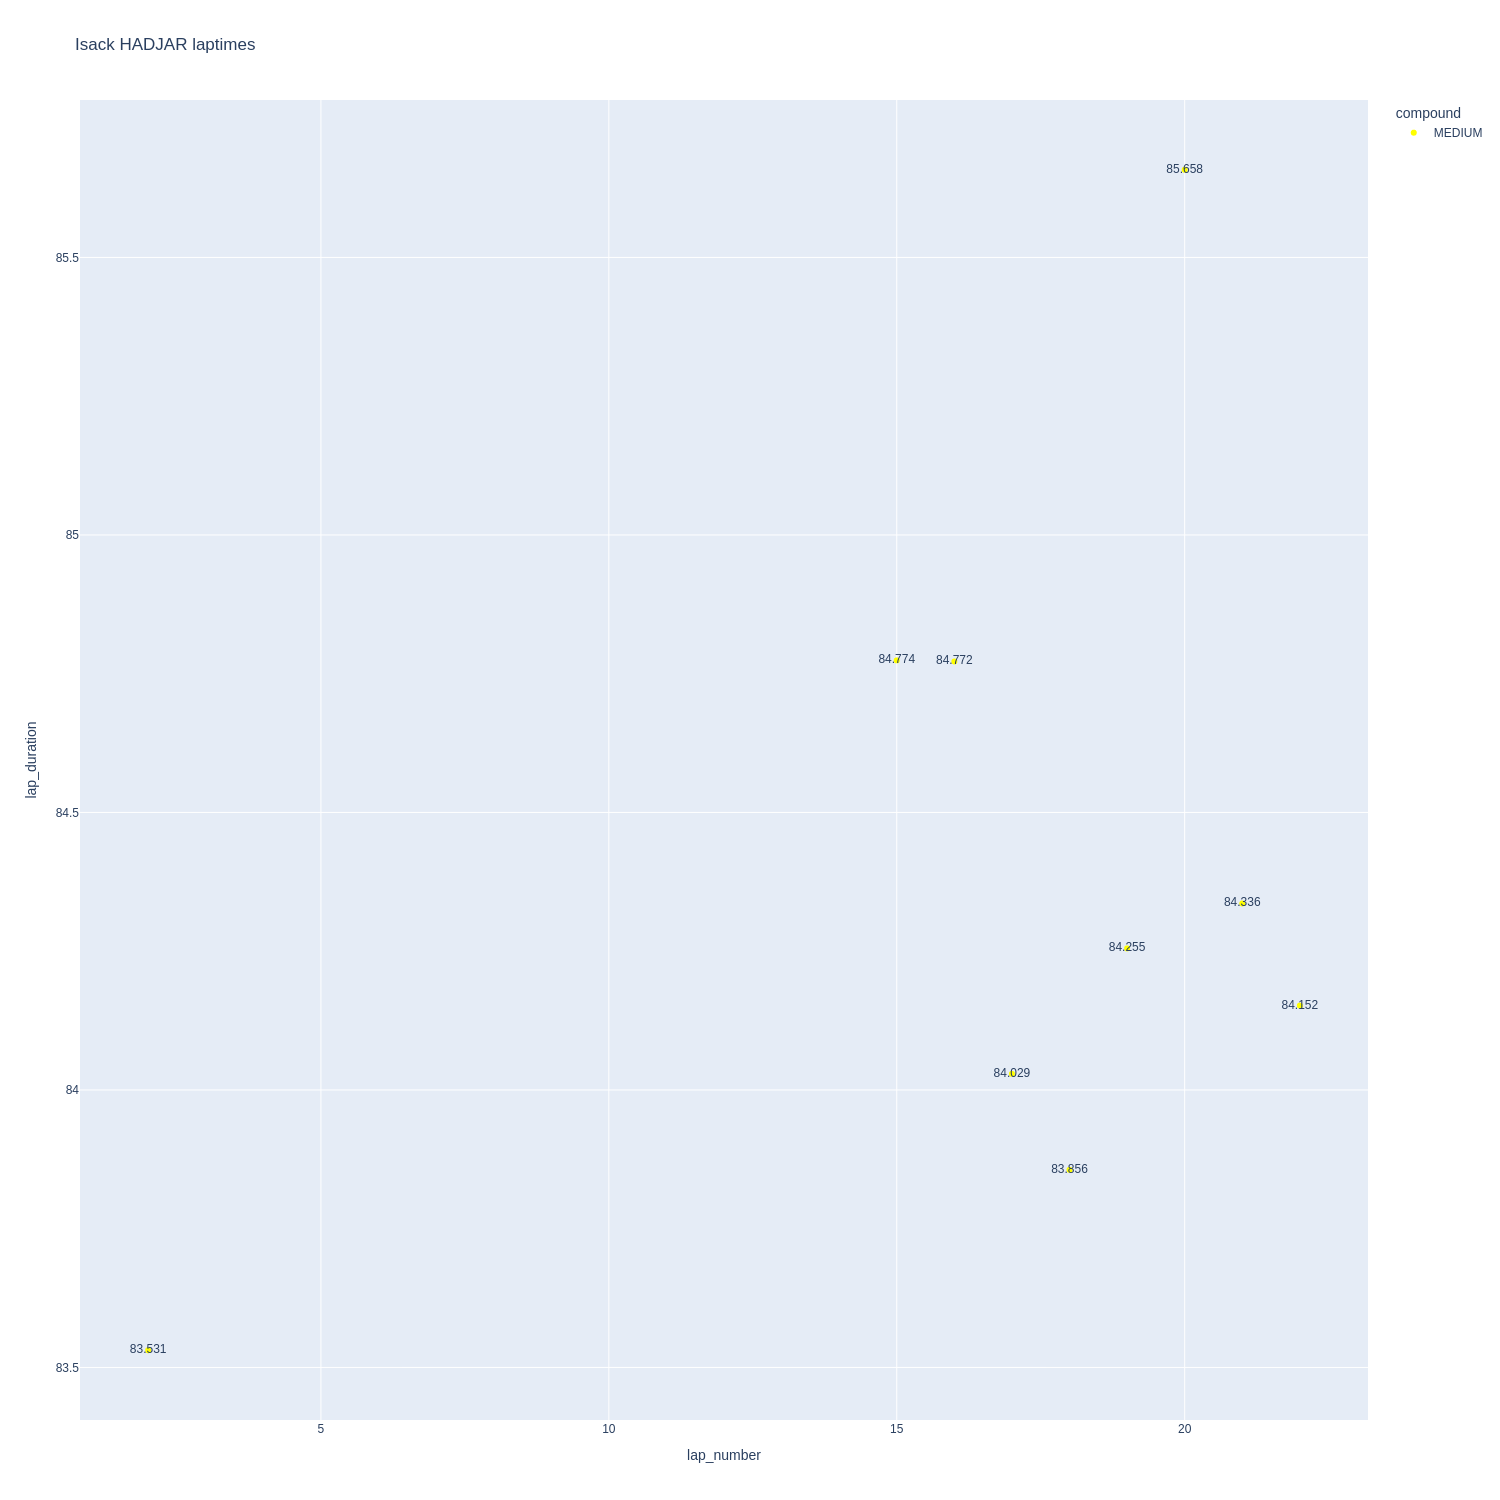

In [64]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

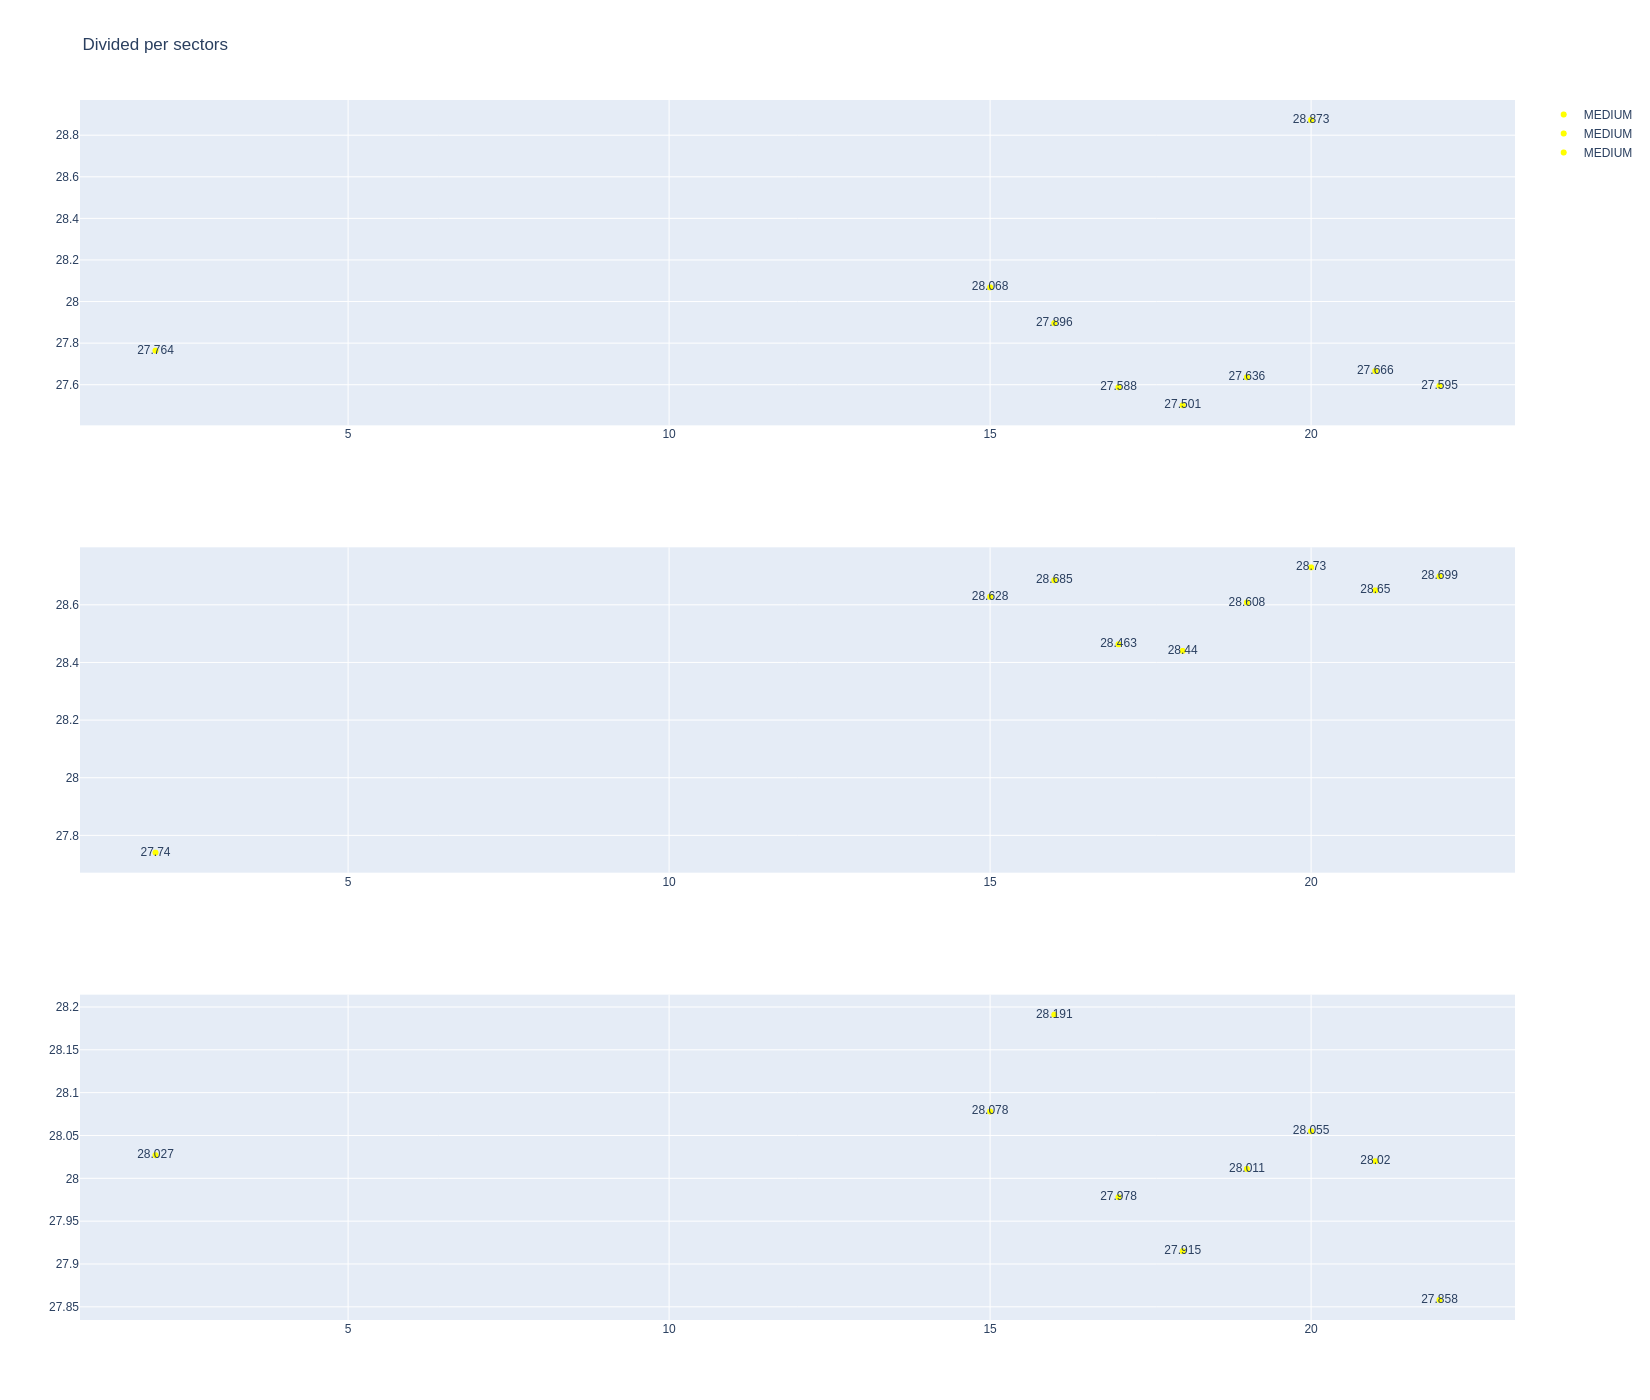

In [65]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Haas

In [66]:
stintInformation.query('driver_number == 31 or driver_number == 87')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
9          1268         9906             1             31          1        6   
10         1268         9906             1             87          1        6   
35         1268         9906             2             87          7        9   
36         1268         9906             2             31          7       10   
50         1268         9906             3             31         11       13   
60         1268         9906             3             87         10       15   
62         1268         9906             4             31         14       16   
79         1268         9906             5             31         17       26   
92         1268         9906             6             31         27       29   
98         1268         9906             4             87         16       29   

   compound  tyre_age_at_start  
9      HARD                  0  
10     HARD                  0  
35     HARD                  6  
36     HARD                  6  
50     SOFT                  0  
60     SOFT                  0  
62     SOFT                  3  
79     HARD                 10  
92     SOFT                  0  
98     HARD                  0

In [67]:
data = libraryDataF1.getinfolongruns(jointables2,31,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
316  Esteban OCON     HARD  2025-09-05T15:45:43.311000+00:00          18   
328  Esteban OCON     HARD  2025-09-05T15:47:07.451000+00:00          19   
344  Esteban OCON     HARD  2025-09-05T15:48:31.912000+00:00          20   
361  Esteban OCON     HARD  2025-09-05T15:49:56.173000+00:00          21   
380  Esteban OCON     HARD  2025-09-05T15:51:20.474000+00:00          22   
399  Esteban OCON     HARD  2025-09-05T15:52:45.282000+00:00          23   
418  Esteban OCON     HARD  2025-09-05T15:54:09.600000+00:00          24   
437  Esteban OCON     HARD  2025-09-05T15:55:33.729000+00:00          25   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
316             27.773             28.308             28.003        84.084  
328             27.917             28.491             28.021        84.429  
344             27.839             28.422             28.041        84.302  
361             27.719             28.493             27.996        84.208  
380             27.889             28.782             28.168        84.839  
399             27.858             28.626             27.966        84.450  
418             27.625             28.547             27.903        84.075  
437             27.739             28.530             27.944        84.213

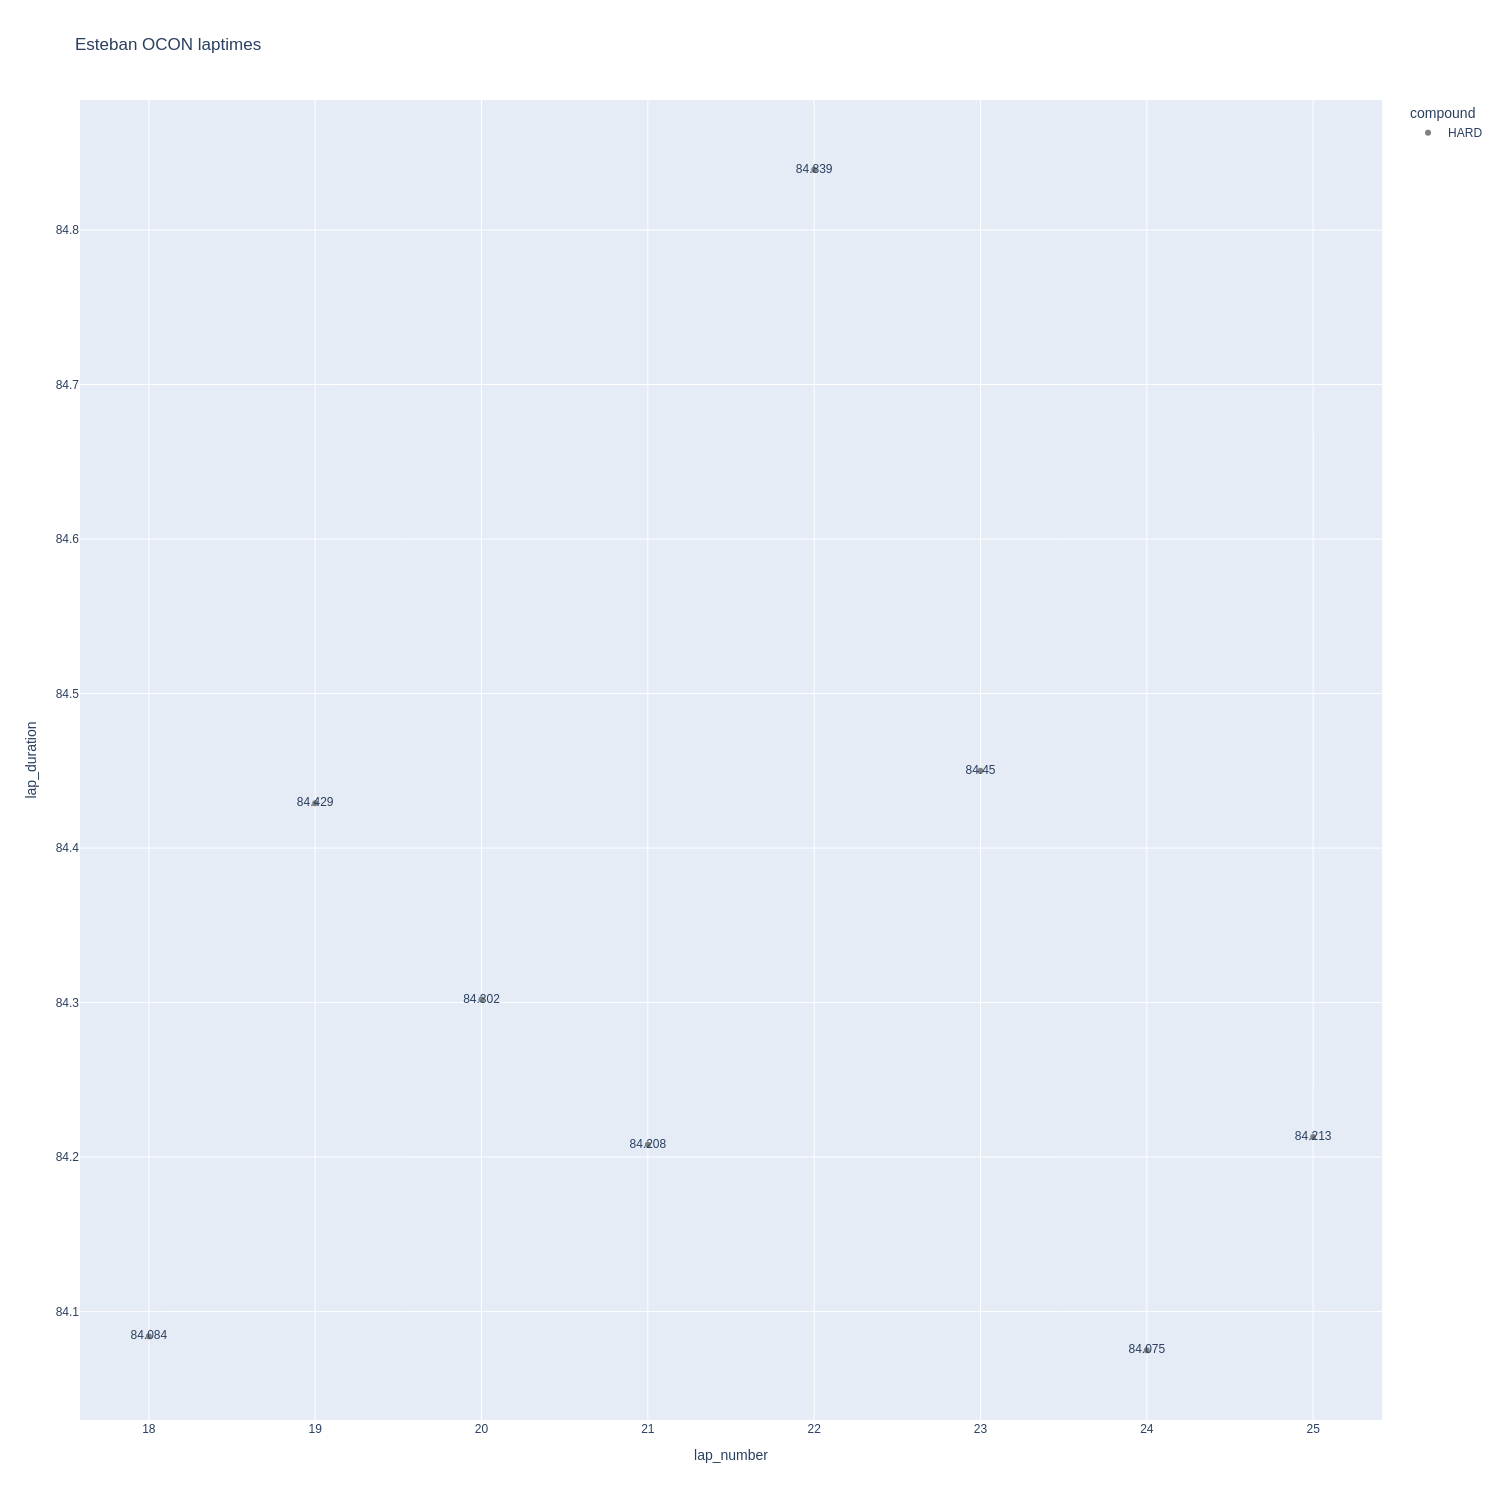

In [68]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

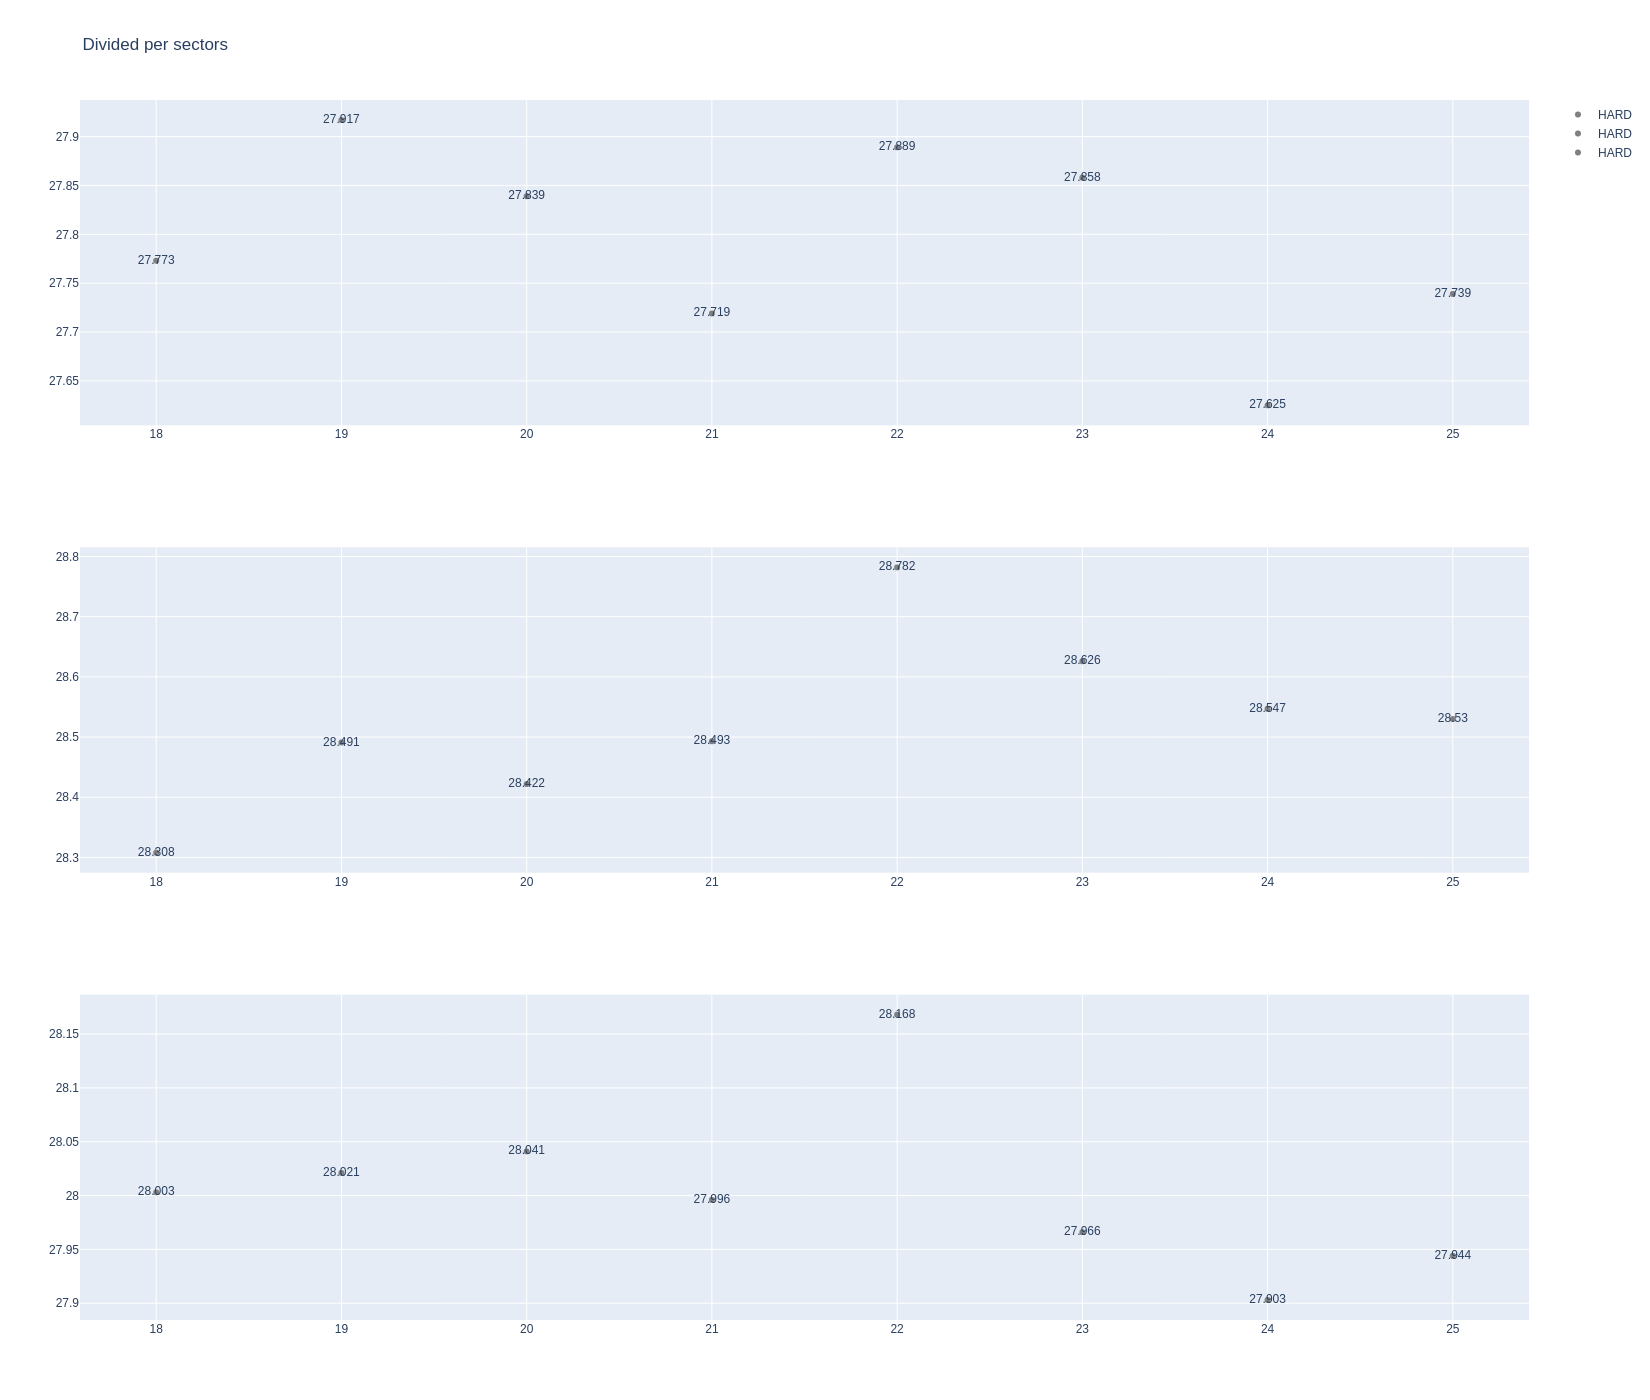

In [69]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [70]:
data = libraryDataF1.getinfolongruns(jointables2,87,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data


full_name compound                        date_start  lap_number  \
311  Oliver BEARMAN     HARD  2025-09-05T15:45:22.431000+00:00          17   
322  Oliver BEARMAN     HARD  2025-09-05T15:46:47.145000+00:00          18   
338  Oliver BEARMAN     HARD  2025-09-05T15:48:12.022000+00:00          19   
355  Oliver BEARMAN     HARD  2025-09-05T15:49:36.920000+00:00          20   
393  Oliver BEARMAN     HARD  2025-09-05T15:52:28.245000+00:00          22   
412  Oliver BEARMAN     HARD  2025-09-05T15:53:52.412000+00:00          23   
431  Oliver BEARMAN     HARD  2025-09-05T15:55:16.840000+00:00          24   
471  Oliver BEARMAN     HARD  2025-09-05T15:58:11.521000+00:00          26   
490  Oliver BEARMAN     HARD  2025-09-05T15:59:36.846000+00:00          27   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
311             27.931             28.588             28.233        84.752  
322             27.985             28.676             28.168        84.829  
338             27.877             28.671             28.389        84.937  
355             27.662             28.767             28.115        84.544  
393             27.606             28.595             28.049        84.250  
412             27.524             28.770             28.076        84.370  
431             27.542             28.821             28.237        84.600  
471             27.892             28.975             28.526        85.393  
490             27.665             29.312             28.083        85.060

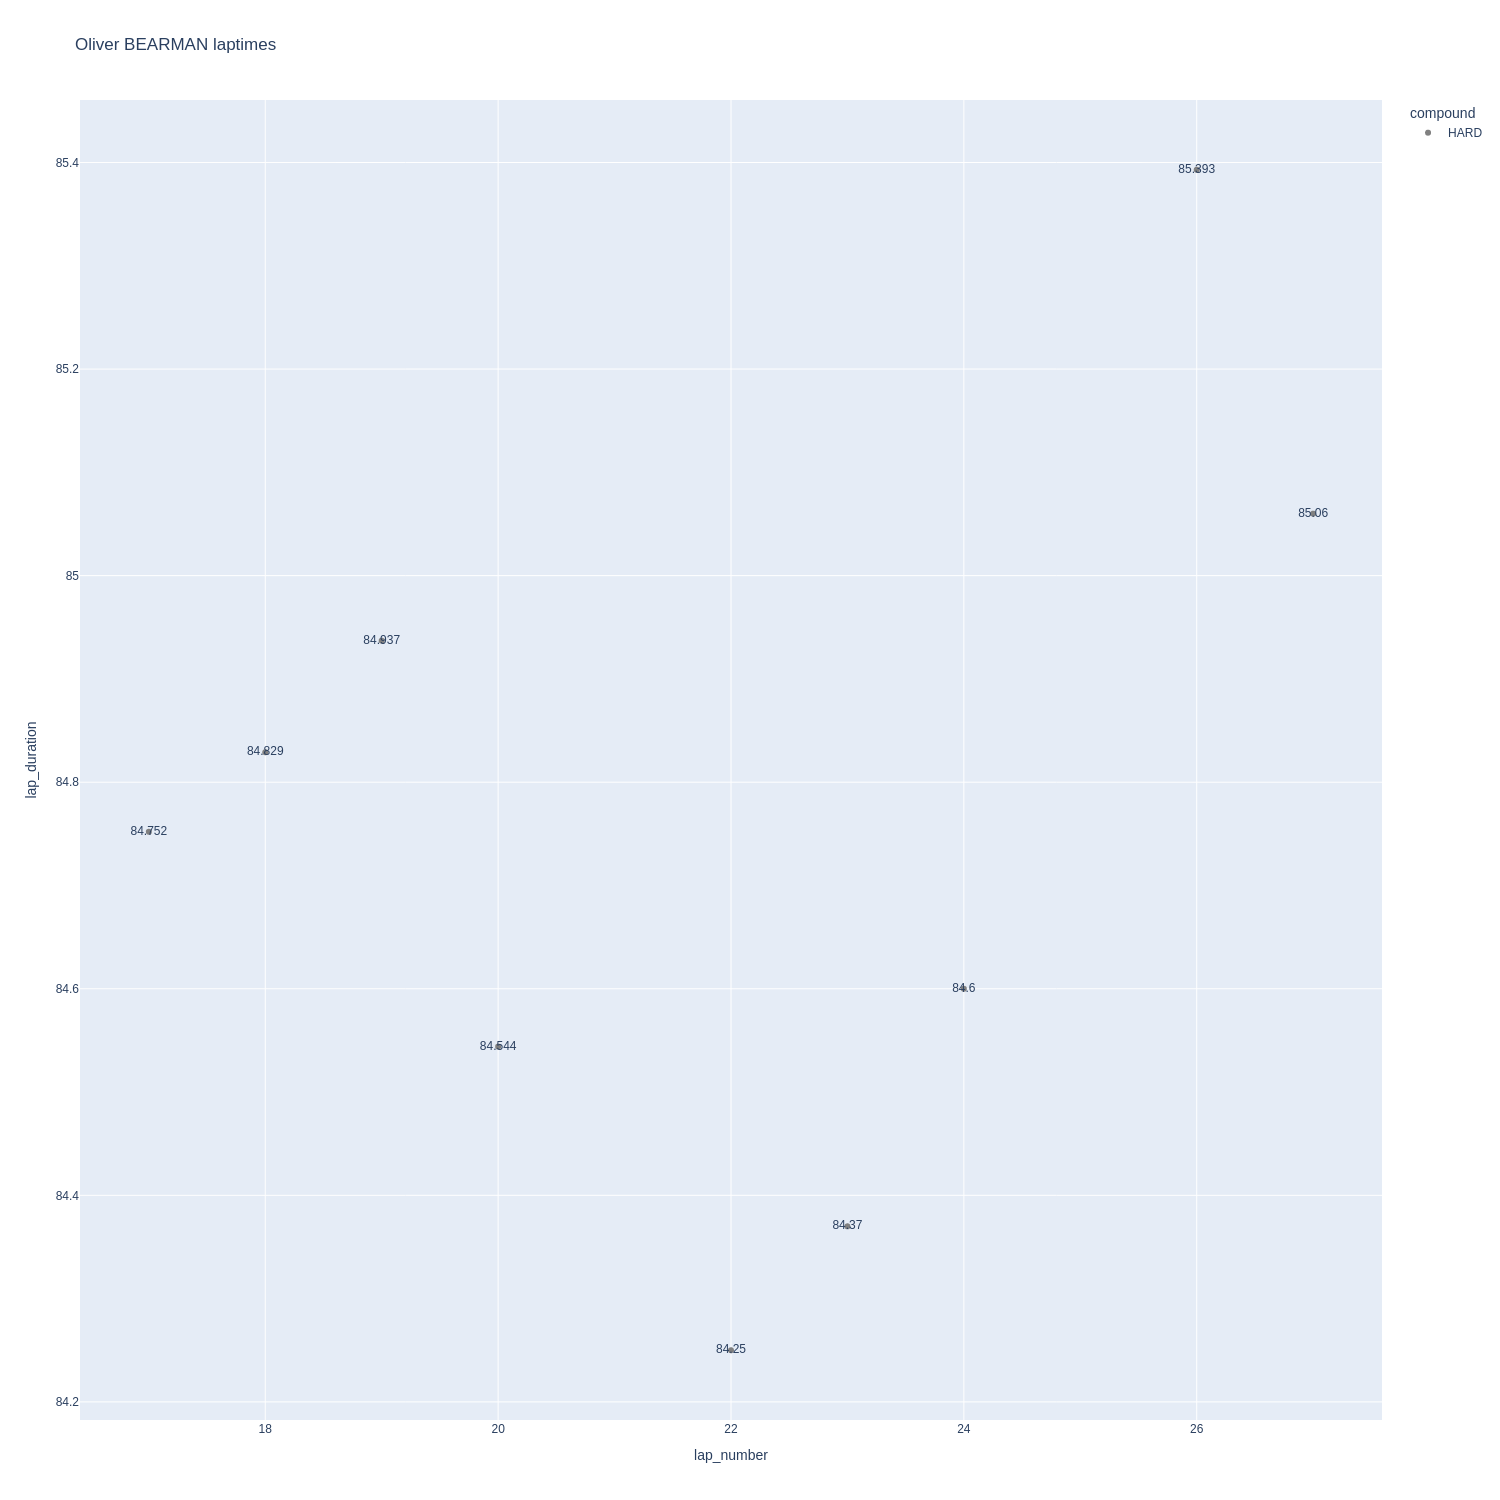

In [71]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

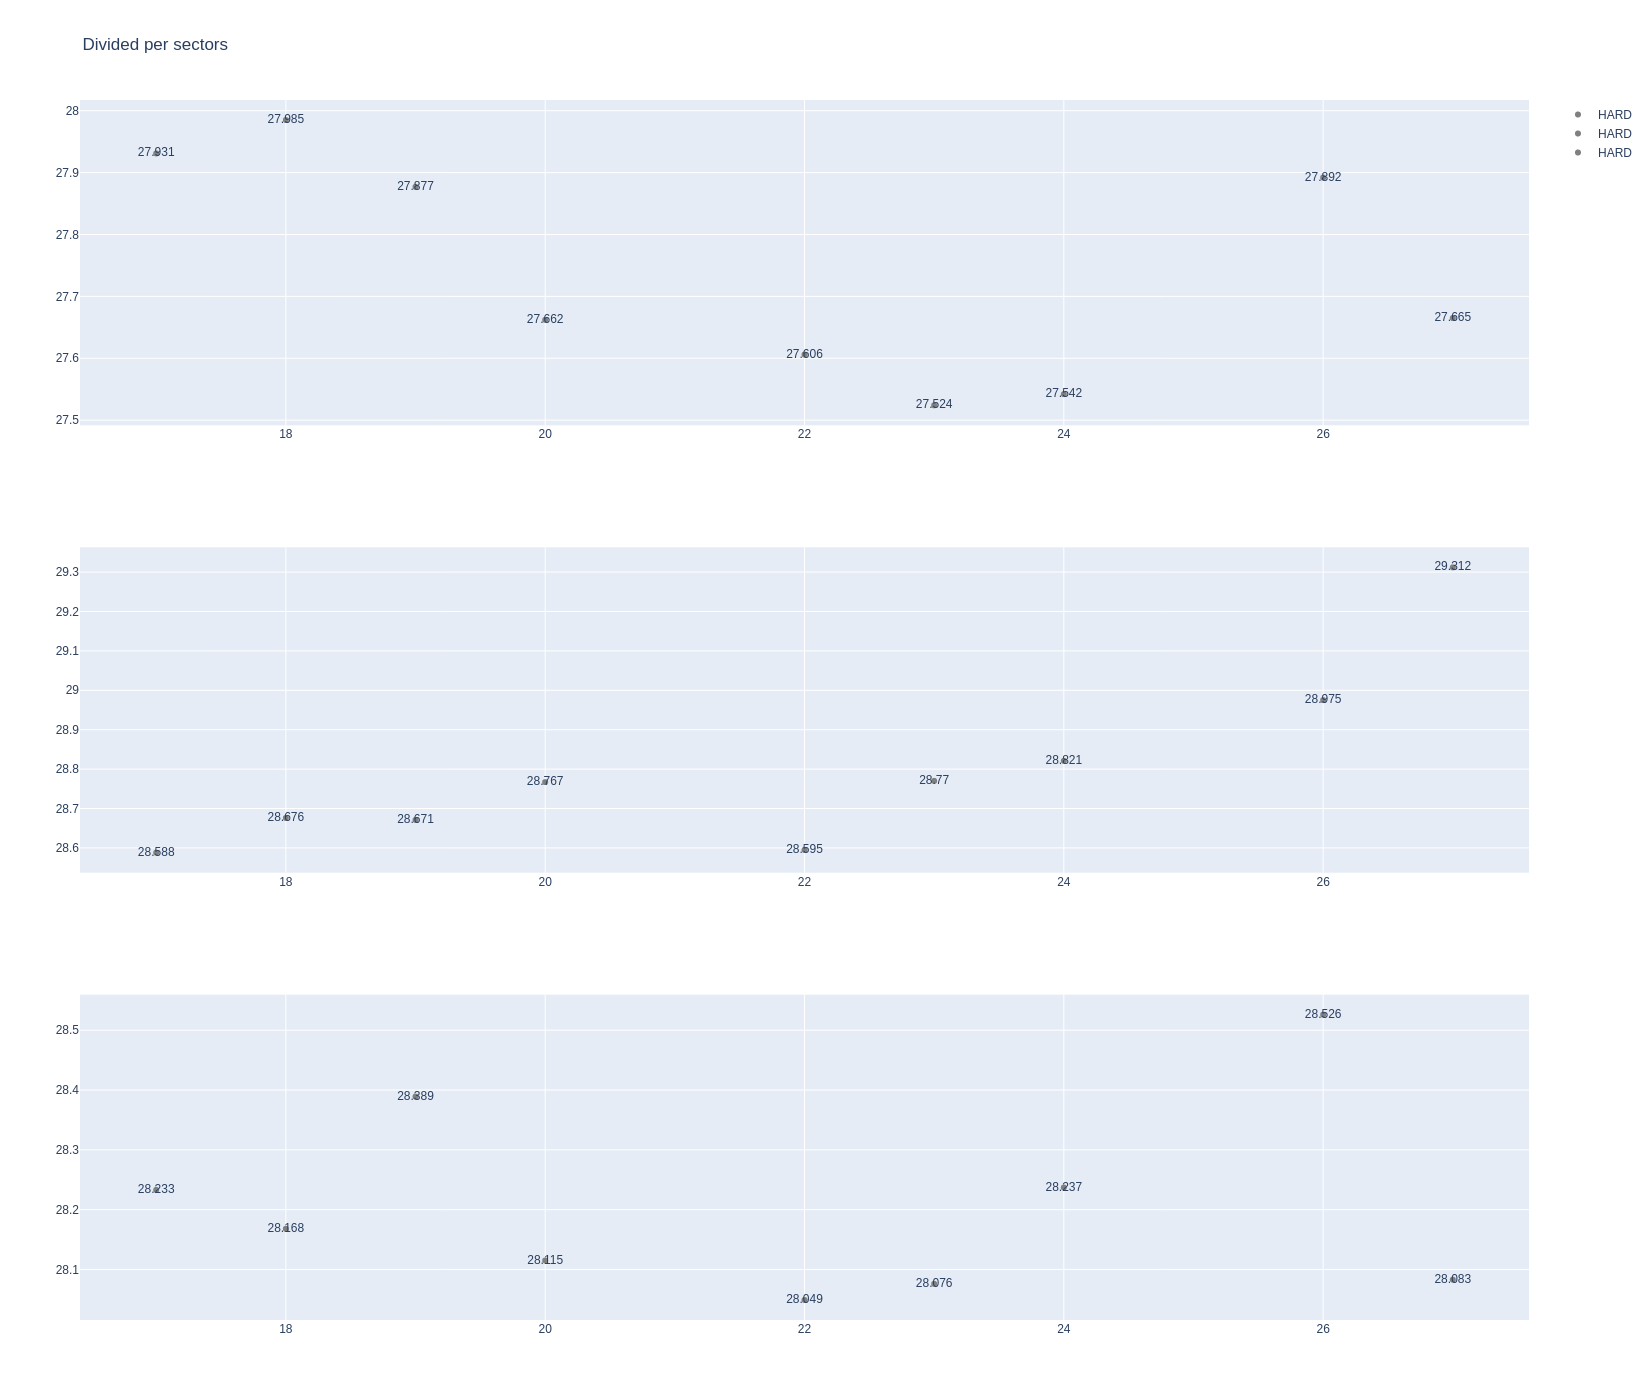

In [72]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Alpine

In [73]:
stintInformation.query('driver_number == 10 or driver_number == 43')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
21         1268         9906             1             43          1        5   
22         1268         9906             1             10          1        5   
28         1268         9906             2             43          6        8   
30         1268         9906             2             10          6        8   
39         1268         9906             3             43          9       11   
57         1268         9906             4             43         12       14   
58         1268         9906             3             10          9       14   
83         1268         9906             5             43         15       30   
99         1268         9906             4             10         15       30   

   compound  tyre_age_at_start  
21   MEDIUM                  0  
22   MEDIUM                  0  
28   MEDIUM                  5  
30   MEDIUM                  5  
39     SOFT                  0  
57     SOFT                  3  
58     SOFT                  0  
83   MEDIUM                  8  
99   MEDIUM                  8

In [74]:
data =libraryDataF1.getinfolongruns(jointables2,43,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
20   Franco COLAPINTO   MEDIUM  2025-09-05T15:02:14.079000+00:00           2   
63   Franco COLAPINTO   MEDIUM  2025-09-05T15:05:56.834000+00:00           4   
295  Franco COLAPINTO   MEDIUM  2025-09-05T15:41:41.574000+00:00          16   
299  Franco COLAPINTO   MEDIUM  2025-09-05T15:43:07.012000+00:00          17   
305  Franco COLAPINTO   MEDIUM  2025-09-05T15:44:32.082000+00:00          18   
317  Franco COLAPINTO   MEDIUM  2025-09-05T15:45:56.938000+00:00          19   
330  Franco COLAPINTO   MEDIUM  2025-09-05T15:47:21.547000+00:00          20   
347  Franco COLAPINTO   MEDIUM  2025-09-05T15:48:46.149000+00:00          21   
364  Franco COLAPINTO   MEDIUM  2025-09-05T15:50:11.546000+00:00          22   
383  Franco COLAPINTO   MEDIUM  2025-09-05T15:51:36.402000+00:00          23   
402  Franco COLAPINTO   MEDIUM  2025-09-05T15:53:01.328000+00:00          24   
421  Franco COLAPINTO   MEDIUM  2025-09-05T15:54:26.106000+00:00          25   
440  Franco COLAPINTO   MEDIUM  2025-09-05T15:55:50.729000+00:00          26   
459  Franco COLAPINTO   MEDIUM  2025-09-05T15:57:15.045000+00:00          27   
475  Franco COLAPINTO   MEDIUM  2025-09-05T15:58:39.863000+00:00          28   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
20              27.649             28.066             28.607        84.322  
63              27.347             27.844             28.218        83.409  
295             28.002             29.067             28.380        85.449  
299             27.992             28.851             28.286        85.129  
305             27.974             28.633             28.163        84.770  
317             27.901             28.620             28.101        84.622  
330             27.884             28.698             28.149        84.731  
347             27.982             28.848             28.469        85.299  
364             27.655             28.898             28.345        84.898  
383             27.764             28.840             28.236        84.840  
402             27.741             28.845             28.187        84.773  
421             27.744             28.913             28.056        84.713  
440             27.688             28.709             27.930        84.327  
459             27.731             28.819             28.171        84.721  
475             27.738             28.934             28.048        84.720

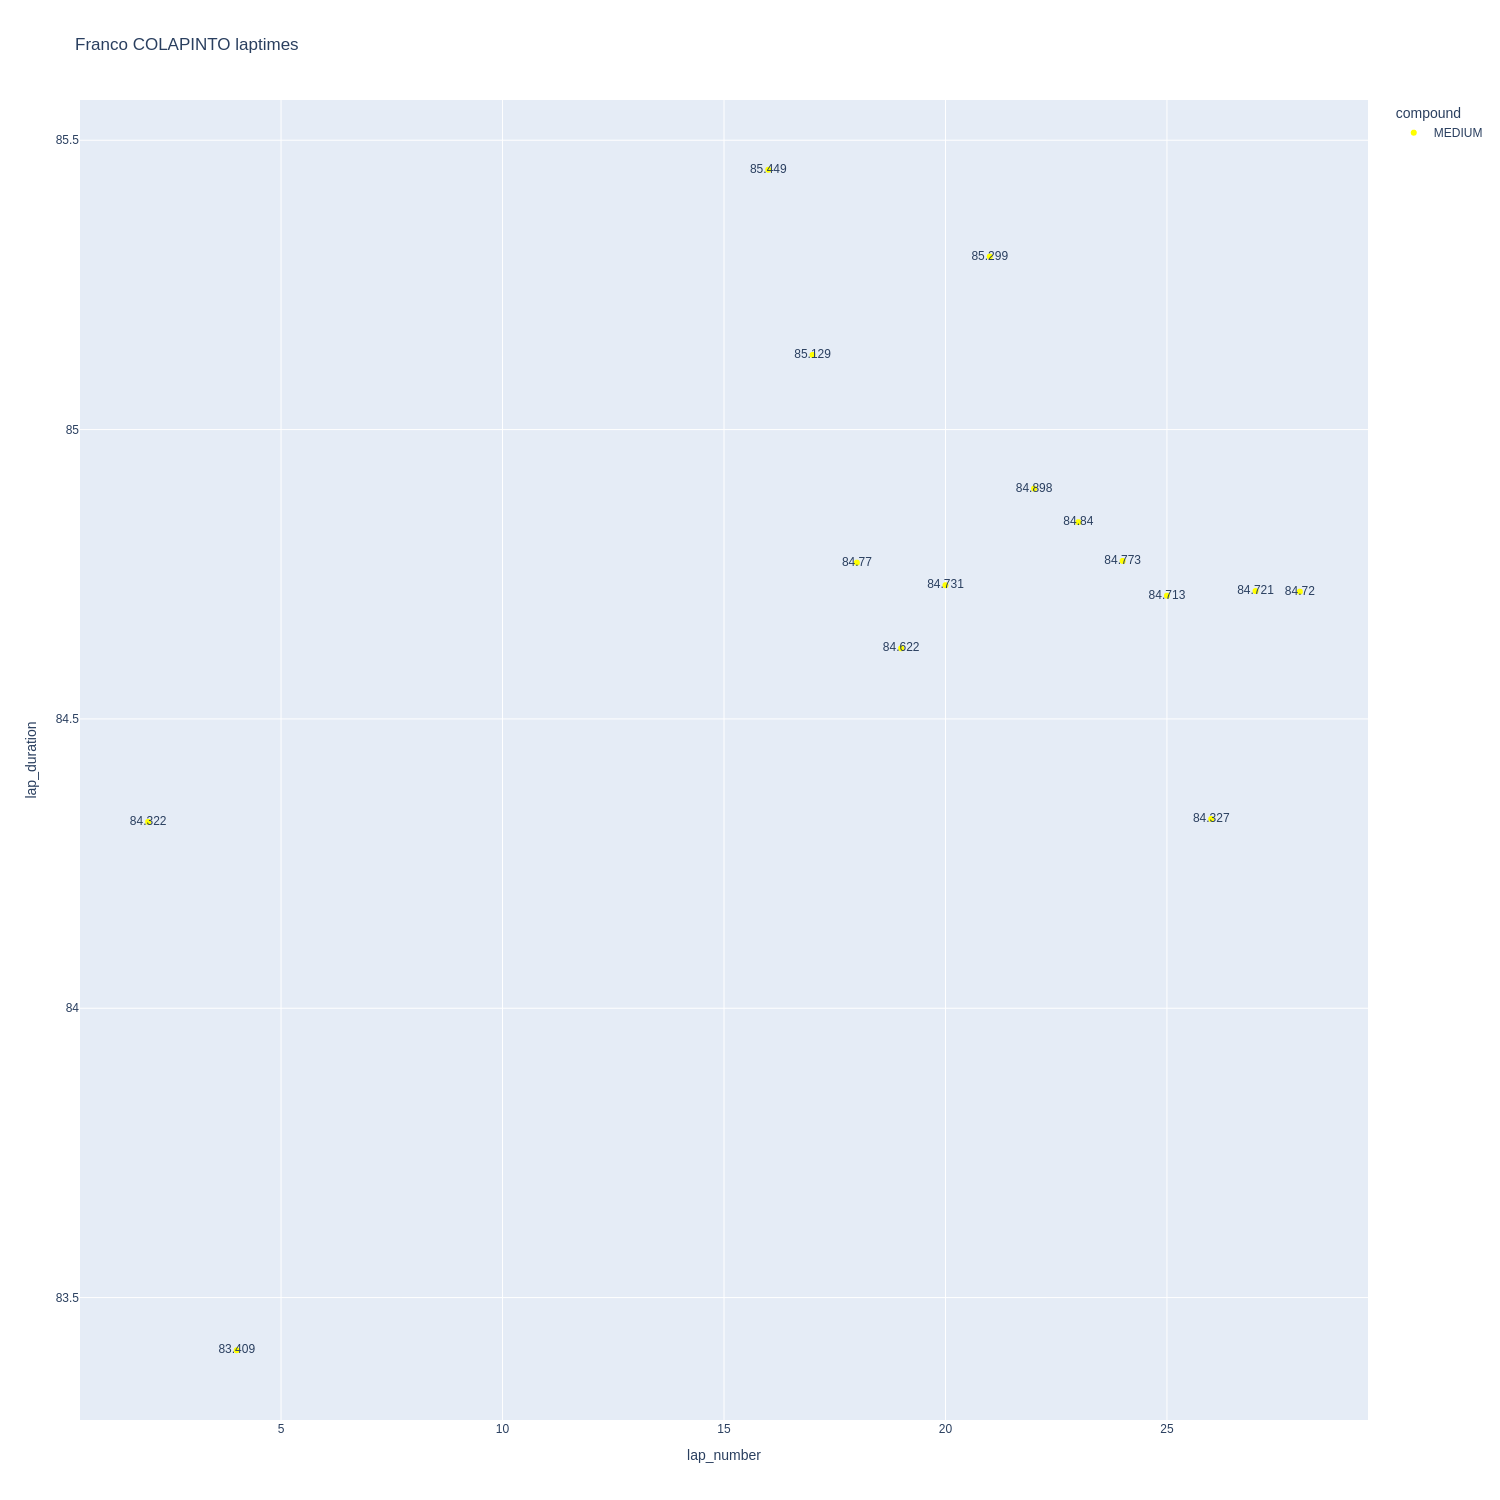

In [75]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

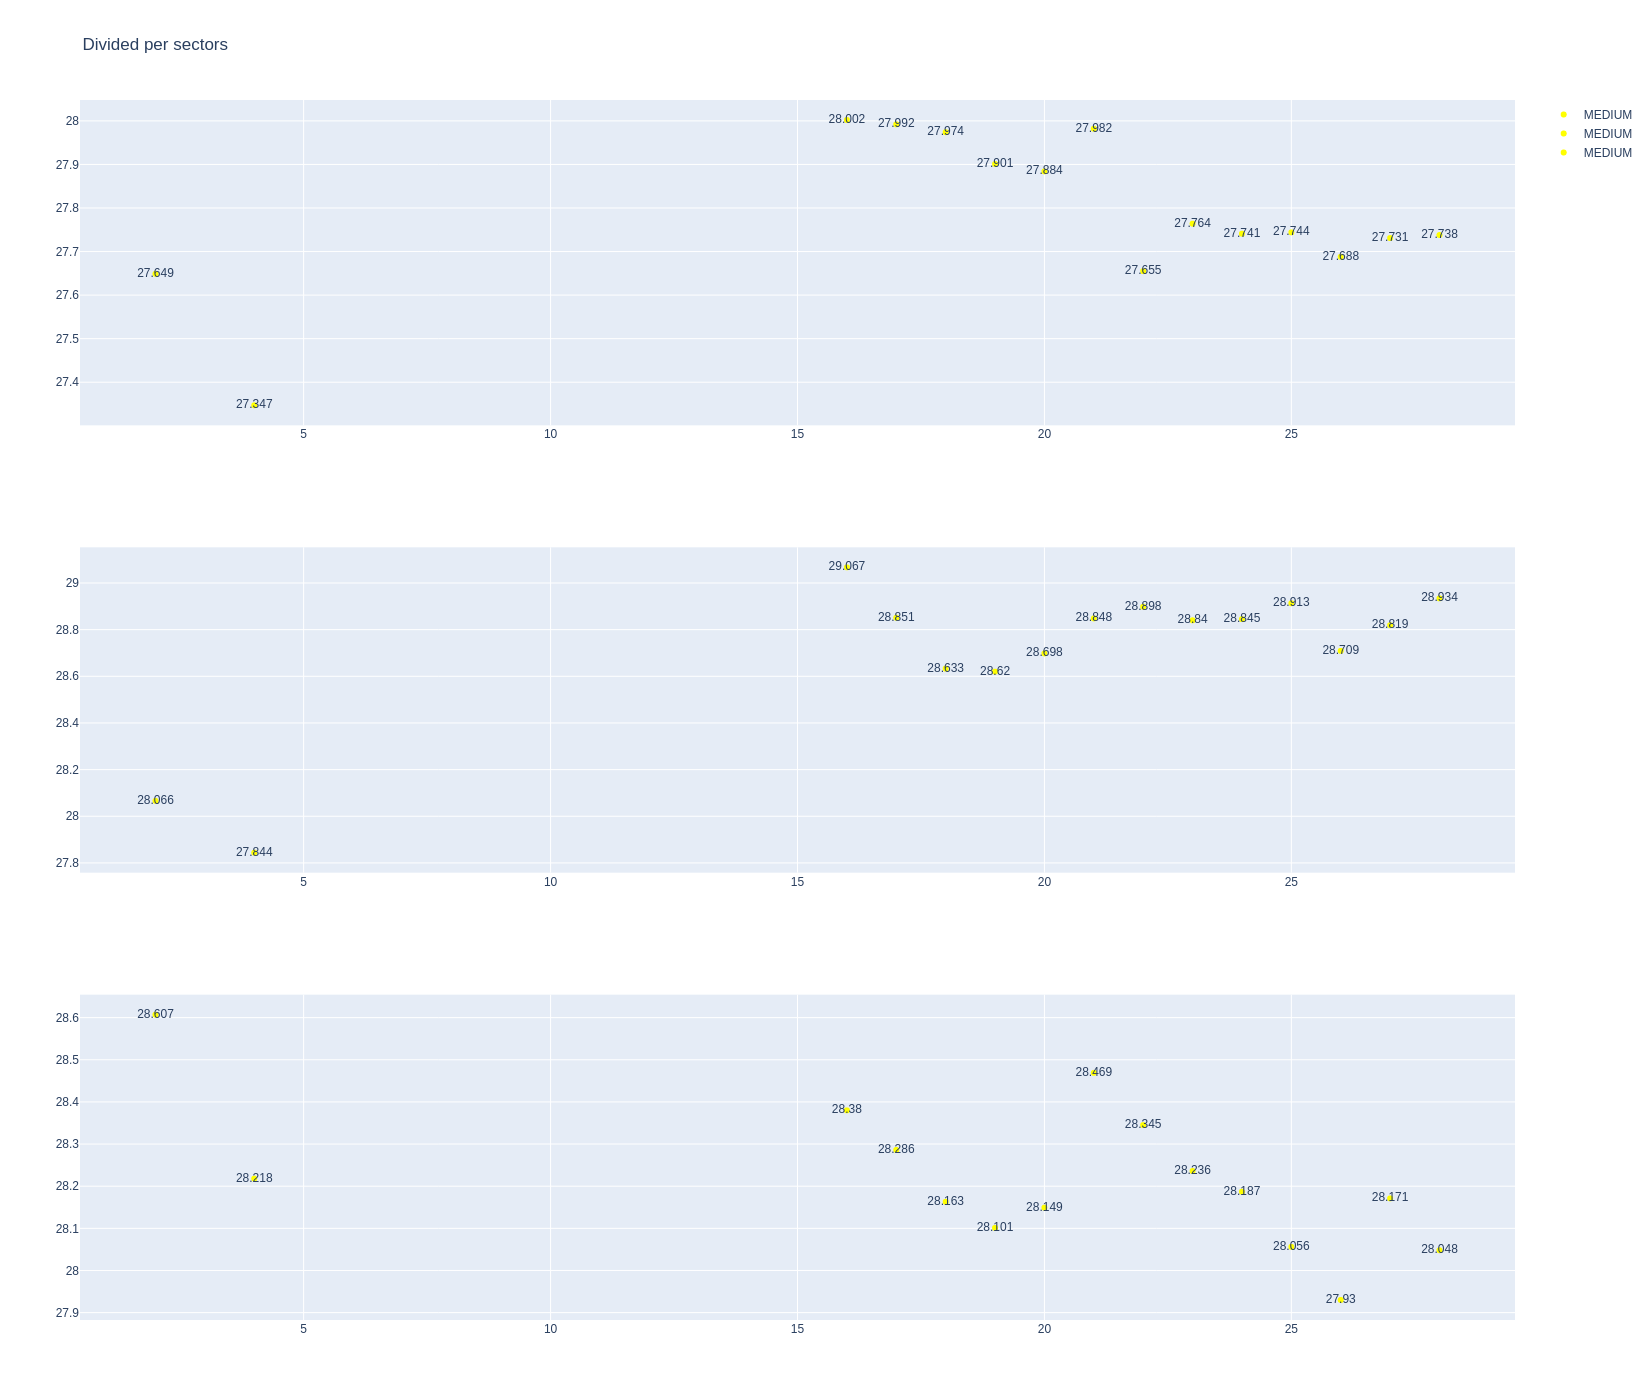

In [76]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [77]:
data = libraryDataF1.getinfolongruns(jointables2,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
297  Pierre GASLY   MEDIUM  2025-09-05T15:42:48.600000+00:00          16   
304  Pierre GASLY   MEDIUM  2025-09-05T15:44:13.521000+00:00          17   
314  Pierre GASLY   MEDIUM  2025-09-05T15:45:38.322000+00:00          18   
327  Pierre GASLY   MEDIUM  2025-09-05T15:47:02.855000+00:00          19   
343  Pierre GASLY   MEDIUM  2025-09-05T15:48:27.522000+00:00          20   
360  Pierre GASLY   MEDIUM  2025-09-05T15:49:51.928000+00:00          21   
379  Pierre GASLY   MEDIUM  2025-09-05T15:51:16.222000+00:00          22   
398  Pierre GASLY   MEDIUM  2025-09-05T15:52:40.710000+00:00          23   
417  Pierre GASLY   MEDIUM  2025-09-05T15:54:05.321000+00:00          24   
436  Pierre GASLY   MEDIUM  2025-09-05T15:55:29.324000+00:00          25   
473  Pierre GASLY   MEDIUM  2025-09-05T15:58:19.760000+00:00          27   
492  Pierre GASLY   MEDIUM  2025-09-05T15:59:44.018000+00:00          28   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
297             27.900             28.845             28.114        84.859  
304             28.003             28.782             28.052        84.837  
314             27.802             28.823             28.010        84.635  
327             27.803             28.737             28.082        84.622  
343             27.605             28.800             28.022        84.427  
360             27.587             28.738             27.925        84.250  
379             27.740             28.738             28.014        84.492  
398             27.783             28.820             27.945        84.548  
417             27.650             28.655             27.808        84.113  
436             27.711             28.733             27.844        84.288  
473             27.772             28.586             27.818        84.176  
492             27.587             28.844             27.742        84.173

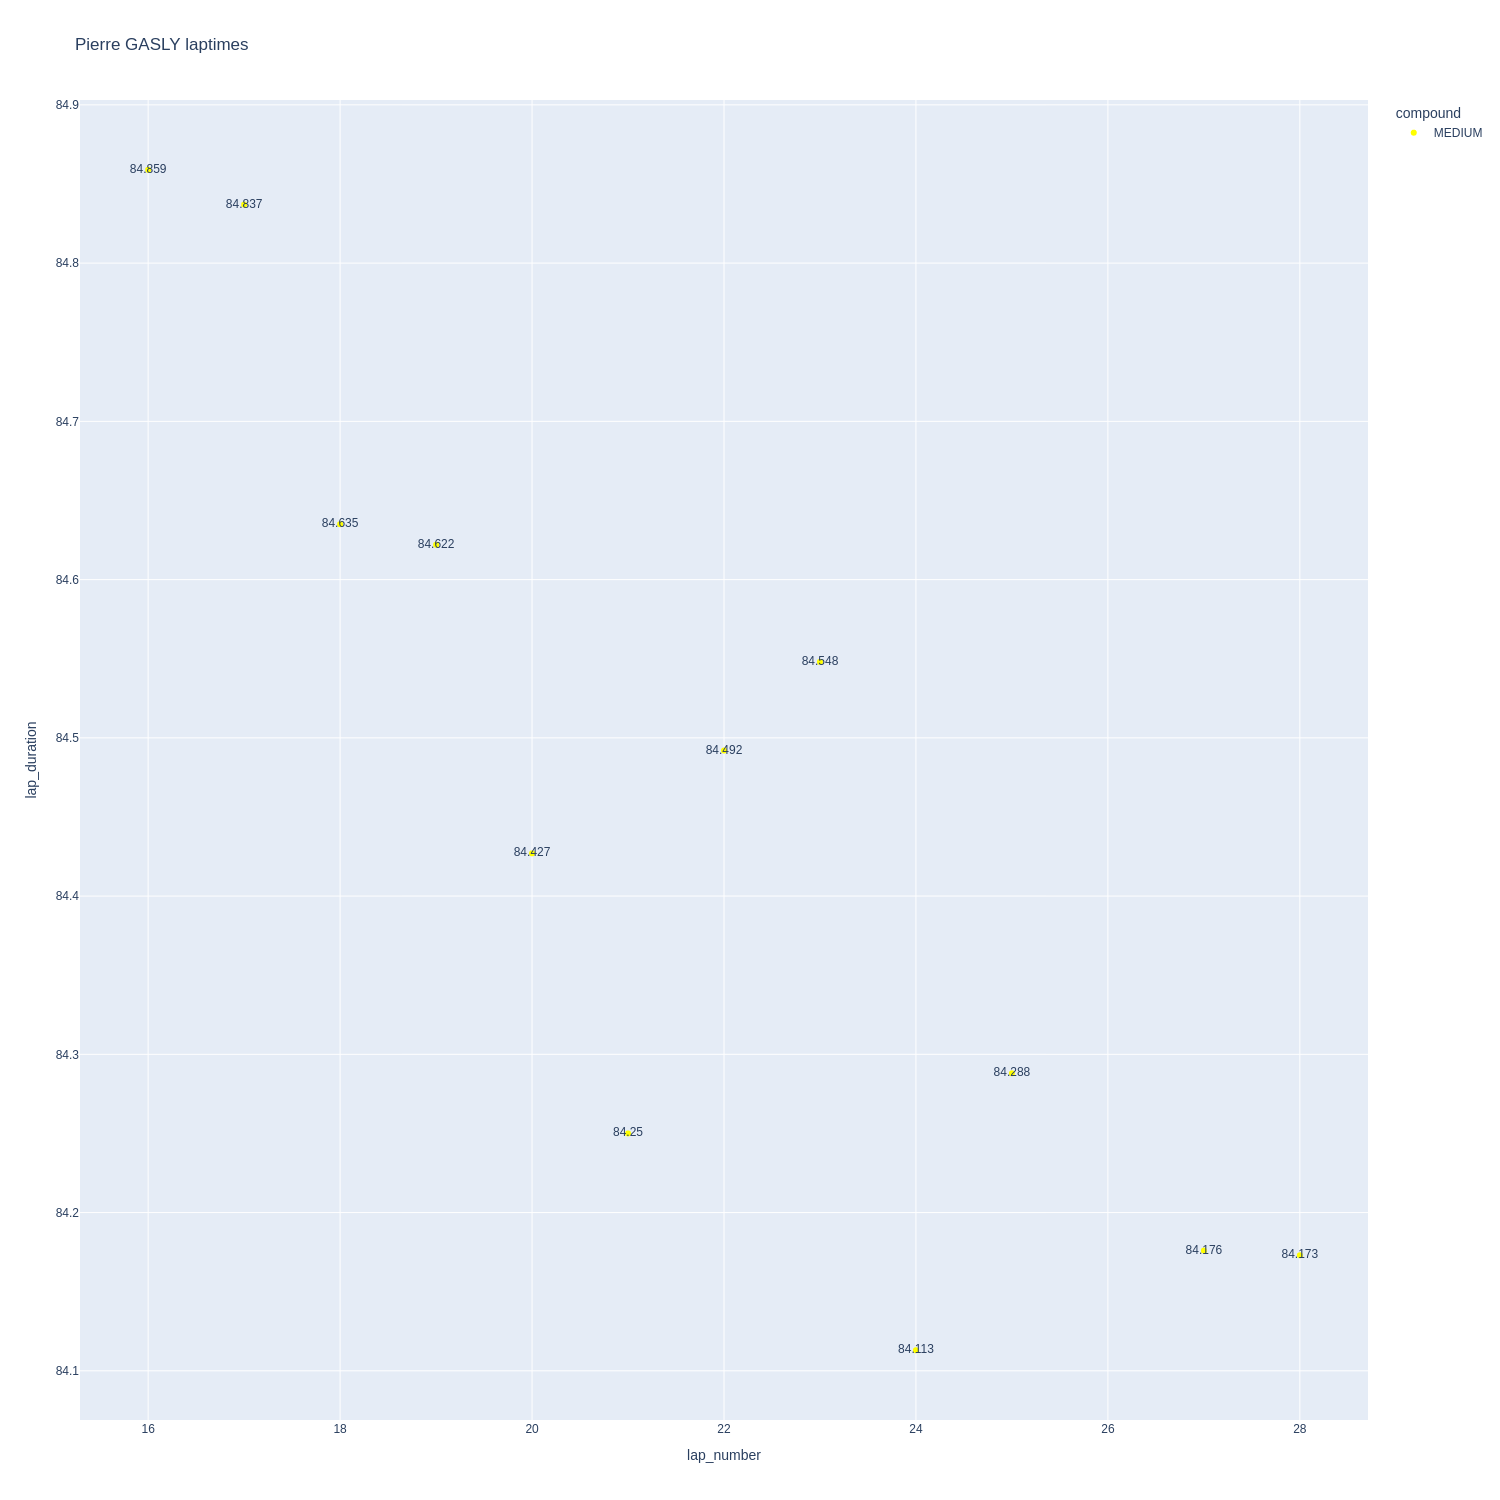

In [78]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

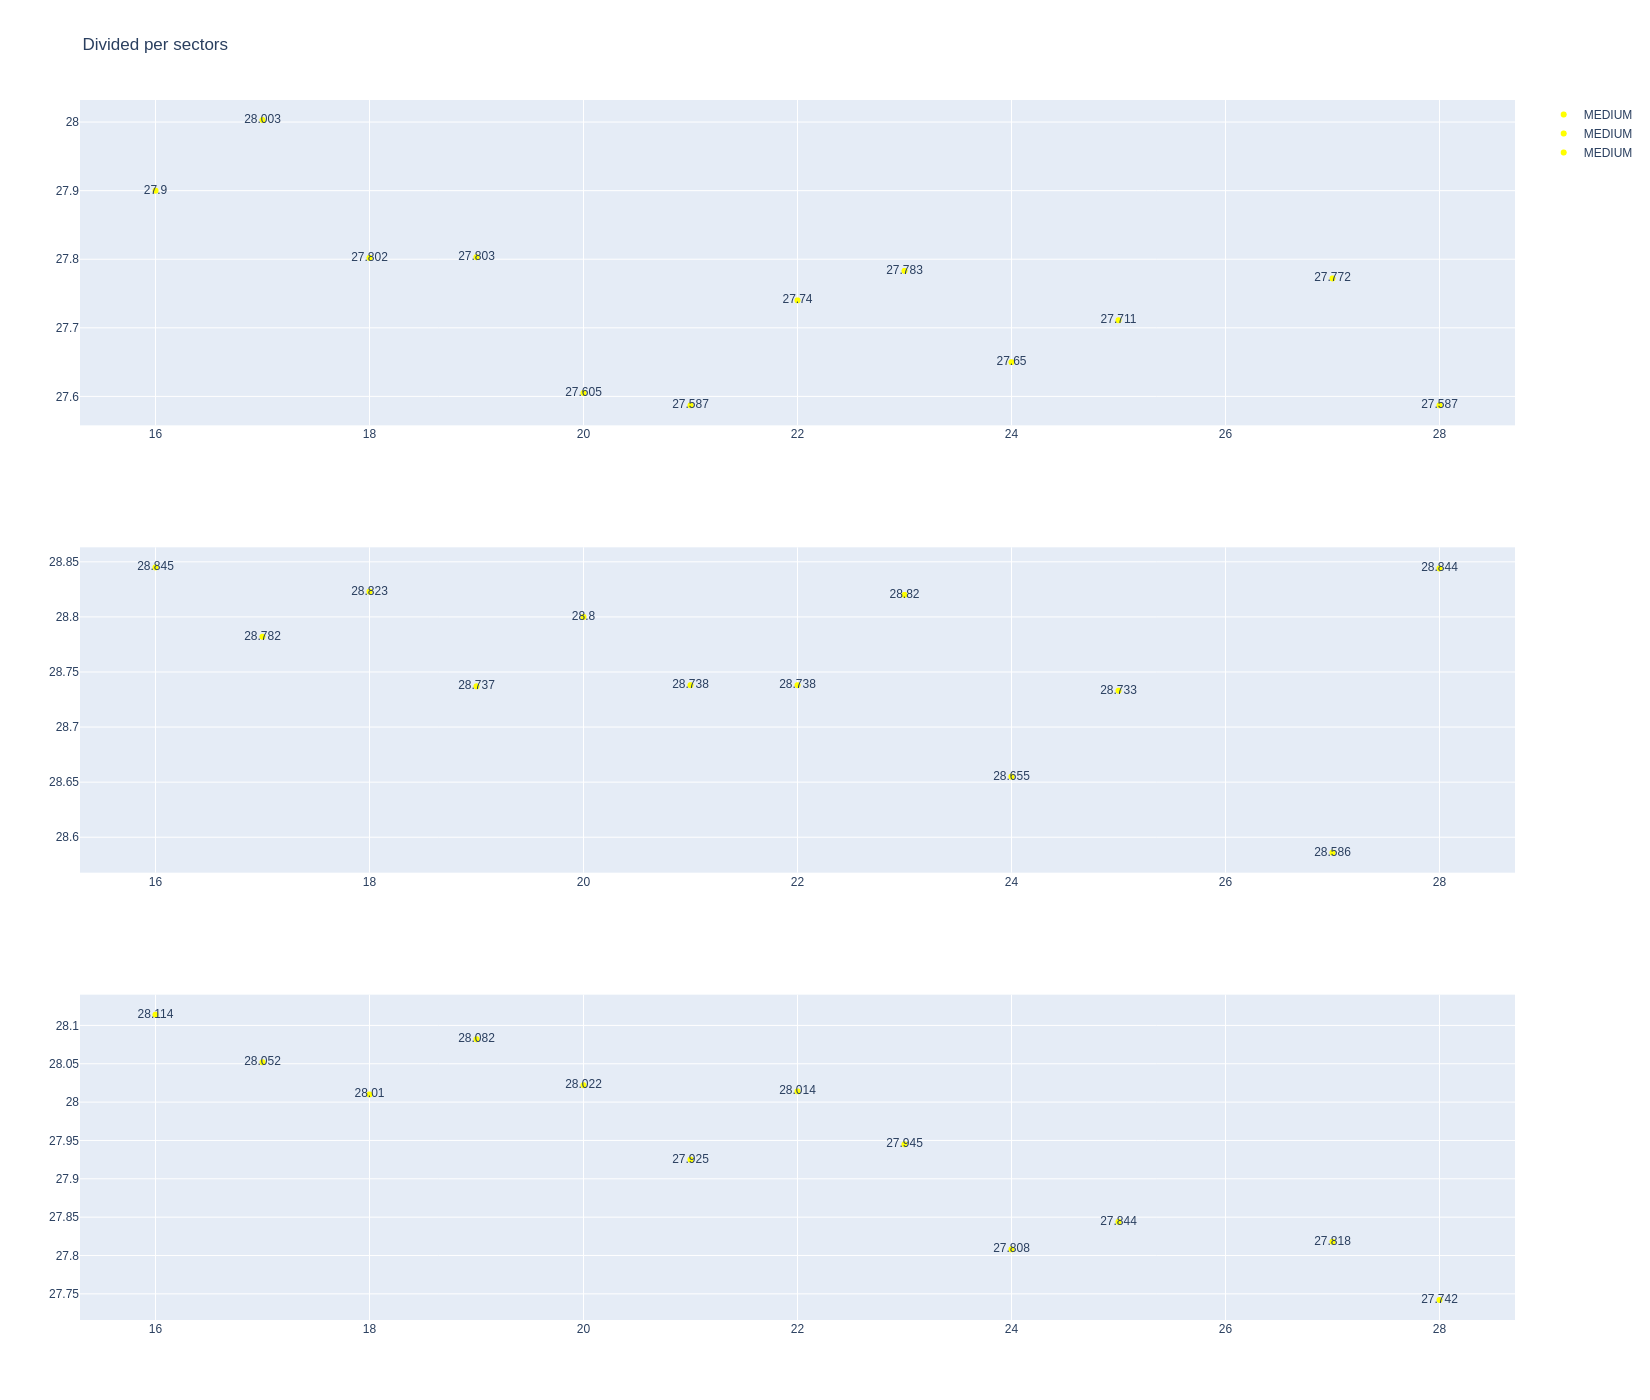

In [79]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Williams

In [80]:
stintInformation.query('driver_number == 55 or driver_number == 23')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
1          1268         9906             1             23          1        3   
2          1268         9906             1             55          1        3   
11         1268         9906             2             55          4        5   
20         1268         9906             2             23          4        5   
31         1268         9906             3             55          6       11   
33         1268         9906             3             23          6       11   
61         1268         9906             4             55         12       17   
67         1268         9906             4             23         12       16   
77         1268         9906             5             55         18       27   
78         1268         9906             5             23         17       25   
82         1268         9906             6             55         28       30   
85         1268         9906             6             23         26       28   

   compound  tyre_age_at_start  
1    MEDIUM                  0  
2    MEDIUM                  0  
11   MEDIUM                  3  
20   MEDIUM                  3  
31   MEDIUM                  5  
33   MEDIUM                  5  
61     SOFT                  0  
67     SOFT                  0  
77   MEDIUM                 11  
78   MEDIUM                 11  
82     SOFT                  6  
85     SOFT                  5

In [81]:
data = libraryDataF1.getinfolongruns(jointables2,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
329  Alexander ALBON   MEDIUM  2025-09-05T15:47:13.056000+00:00          18   
363  Alexander ALBON   MEDIUM  2025-09-05T15:50:04.661000+00:00          20   
382  Alexander ALBON   MEDIUM  2025-09-05T15:51:29.047000+00:00          21   
401  Alexander ALBON   MEDIUM  2025-09-05T15:52:53.434000+00:00          22   
420  Alexander ALBON   MEDIUM  2025-09-05T15:54:17.491000+00:00          23   
439  Alexander ALBON   MEDIUM  2025-09-05T15:55:41.468000+00:00          24   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
329             27.661             28.727             28.138        84.526  
363             27.611             28.671             28.152        84.434  
382             27.580             28.602             28.185        84.367  
401             27.447             28.693             27.920        84.060  
420             27.413             28.791             27.827        84.031  
439             27.337             28.341             28.096        83.774

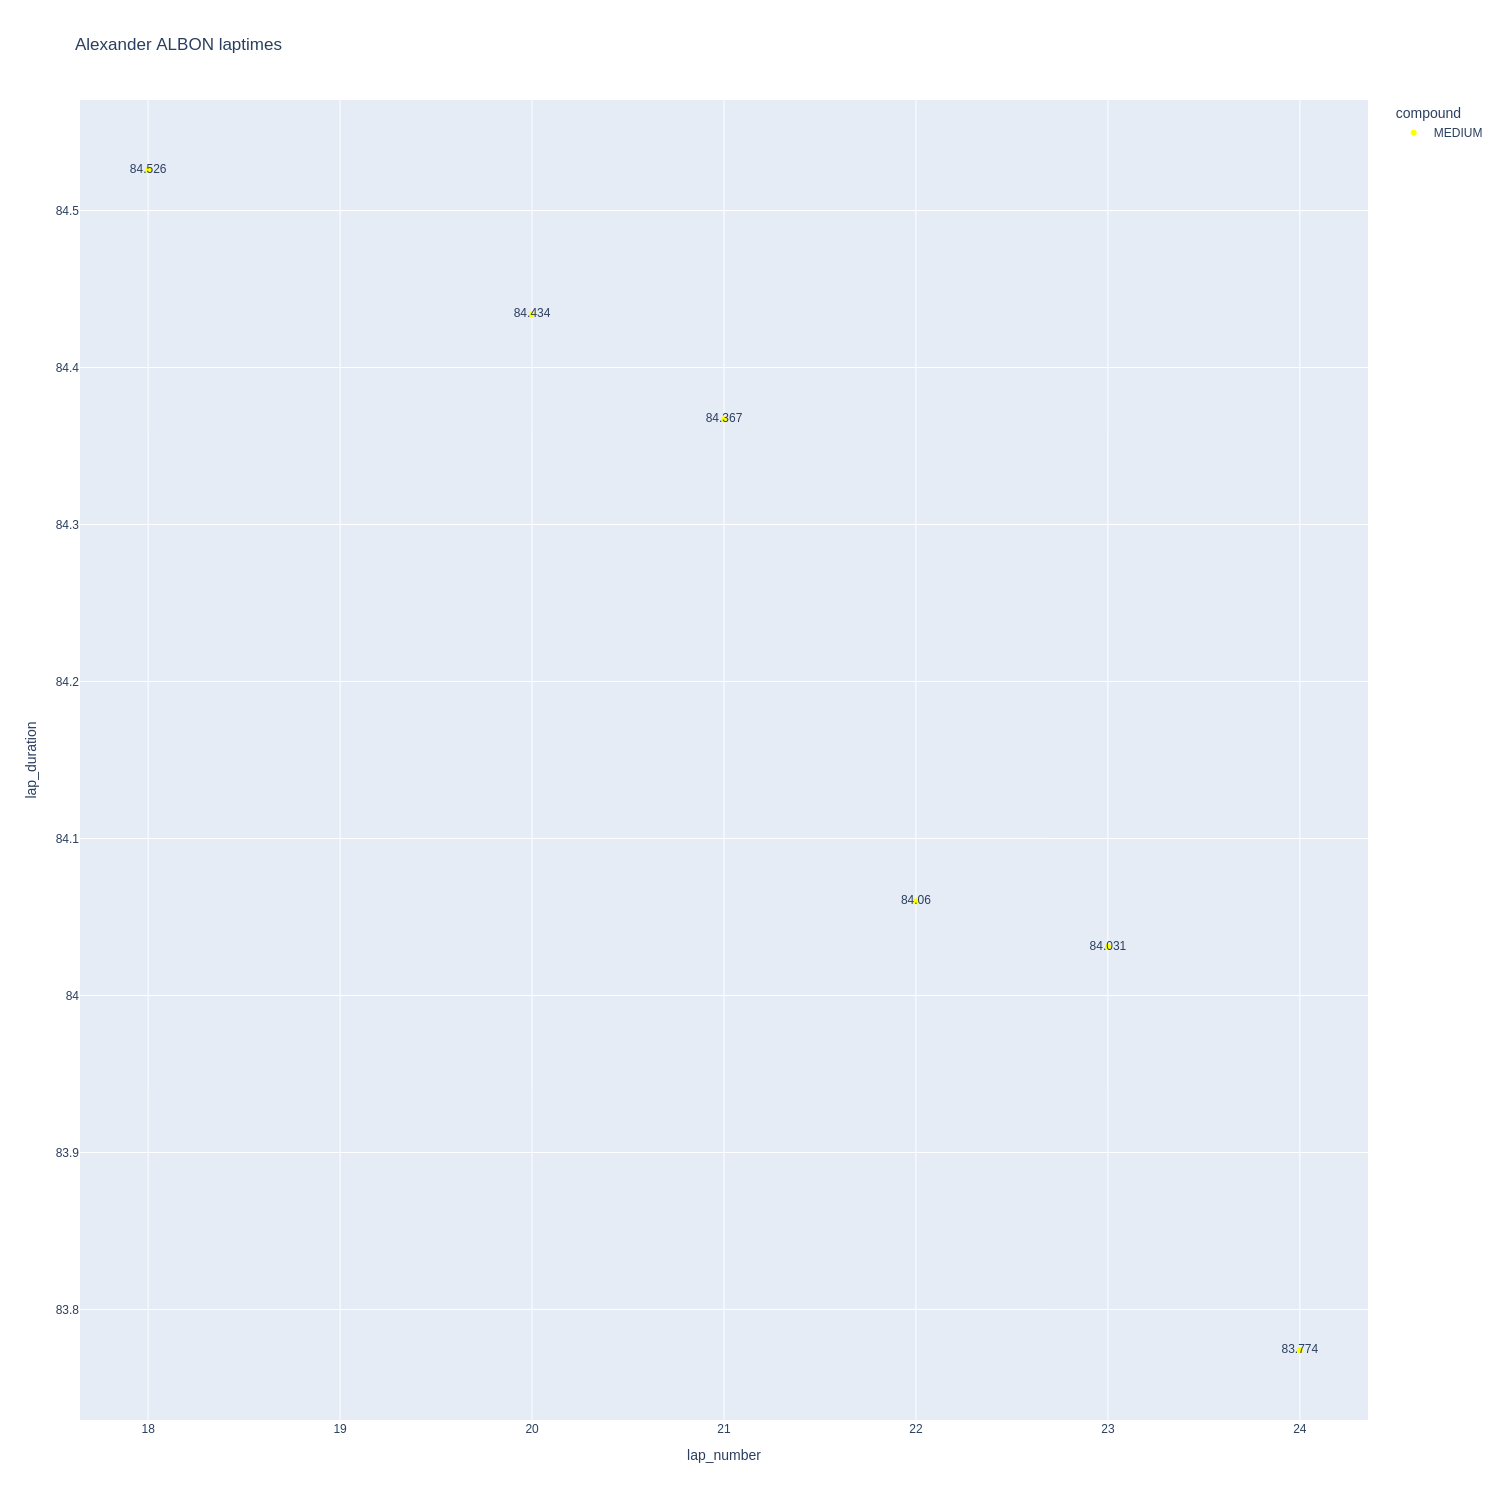

In [82]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

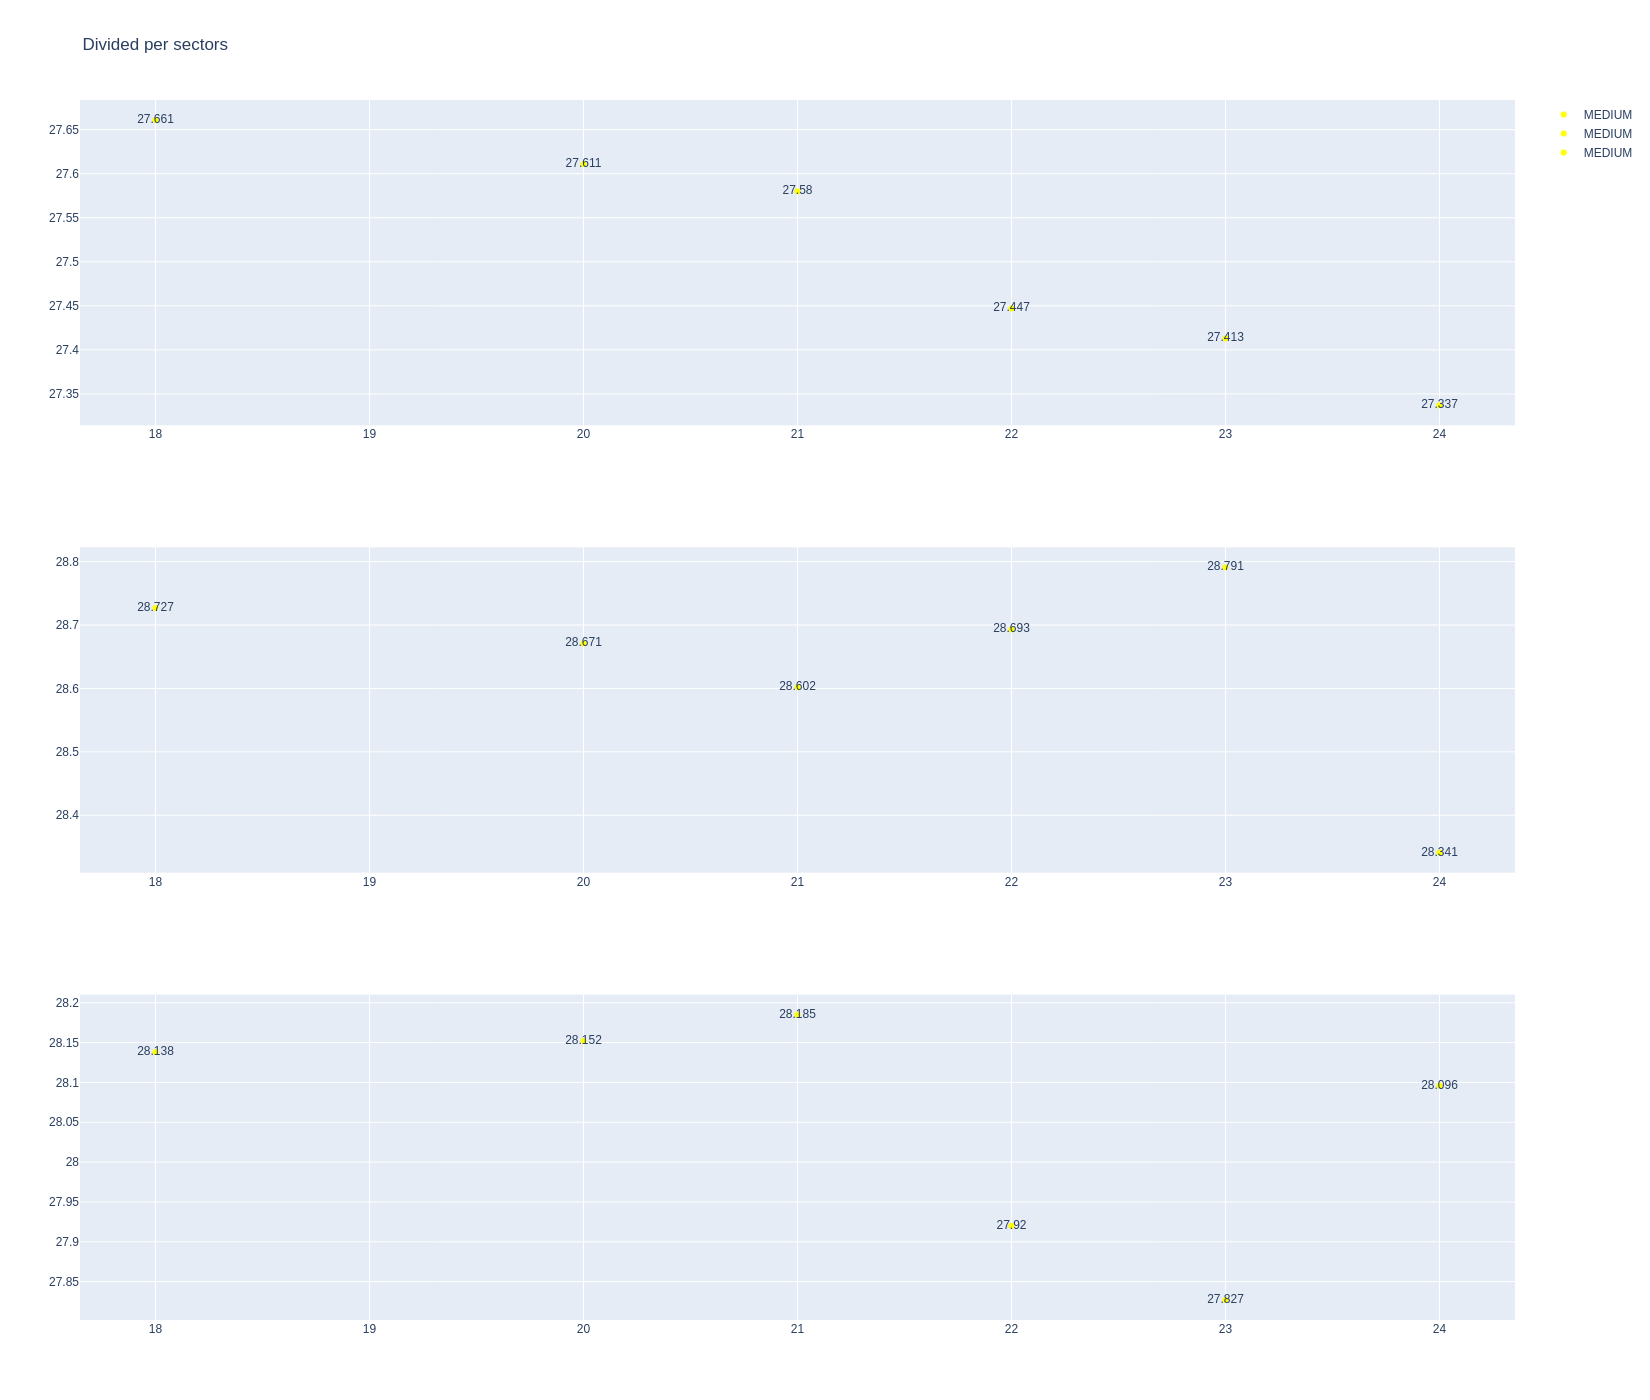

In [83]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [84]:
data= libraryDataF1.getinfolongruns(jointables2,55,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
313  Carlos SAINZ   MEDIUM  2025-09-05T15:45:32.771000+00:00          19   
342  Carlos SAINZ   MEDIUM  2025-09-05T15:48:25.822000+00:00          21   
359  Carlos SAINZ   MEDIUM  2025-09-05T15:49:50.322000+00:00          22   
378  Carlos SAINZ   MEDIUM  2025-09-05T15:51:14.556000+00:00          23   
397  Carlos SAINZ   MEDIUM  2025-09-05T15:52:38.529000+00:00          24   
416  Carlos SAINZ   MEDIUM  2025-09-05T15:54:02.366000+00:00          25   
435  Carlos SAINZ   MEDIUM  2025-09-05T15:55:26.085000+00:00          26   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
313             27.621             28.449             28.307        84.377  
342             27.734             28.526             28.229        84.489  
359             27.602             28.555             28.131        84.288  
378             27.485             28.459             28.029        83.973  
397             27.534             28.397             27.922        83.853  
416             27.452             28.362             27.789        83.603  
435             27.339             28.258             27.727        83.324

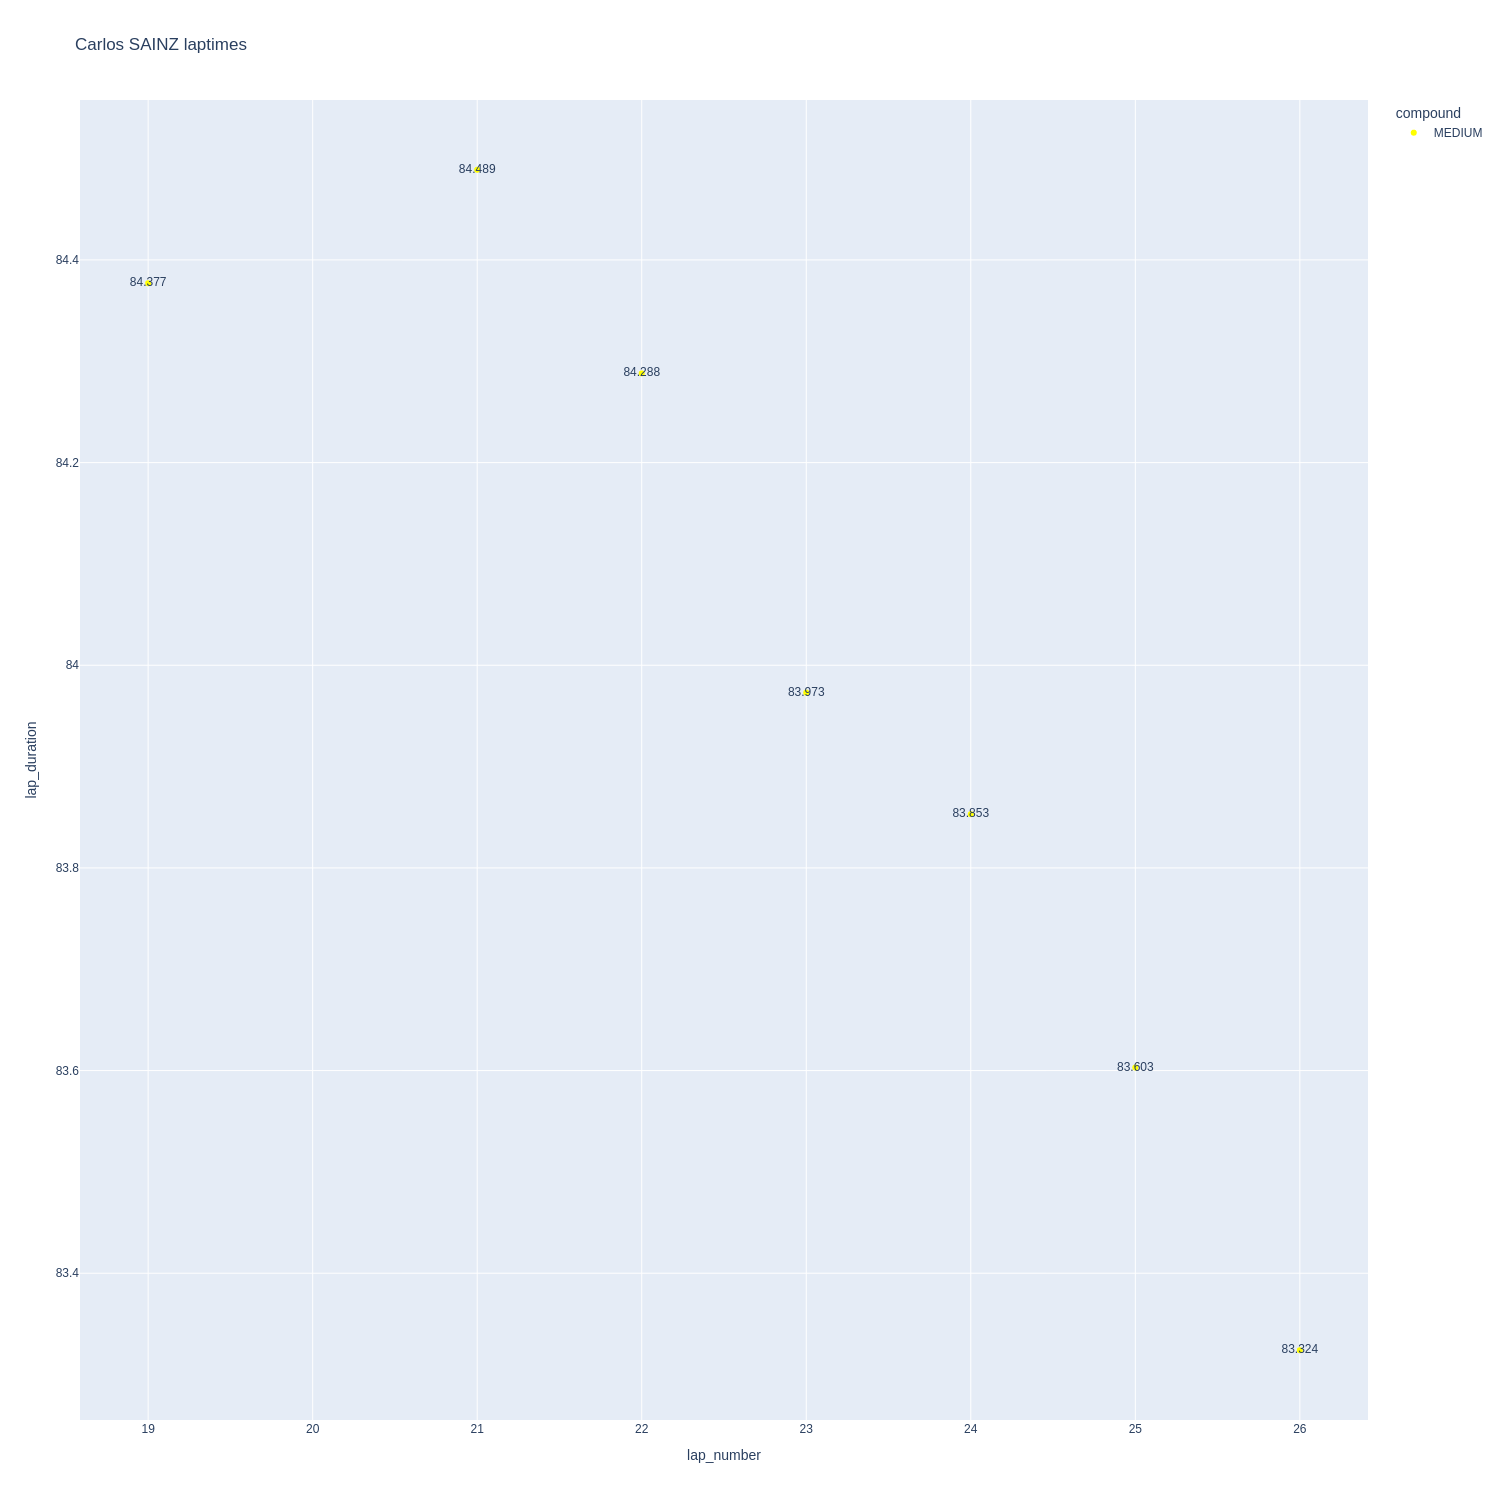

In [85]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

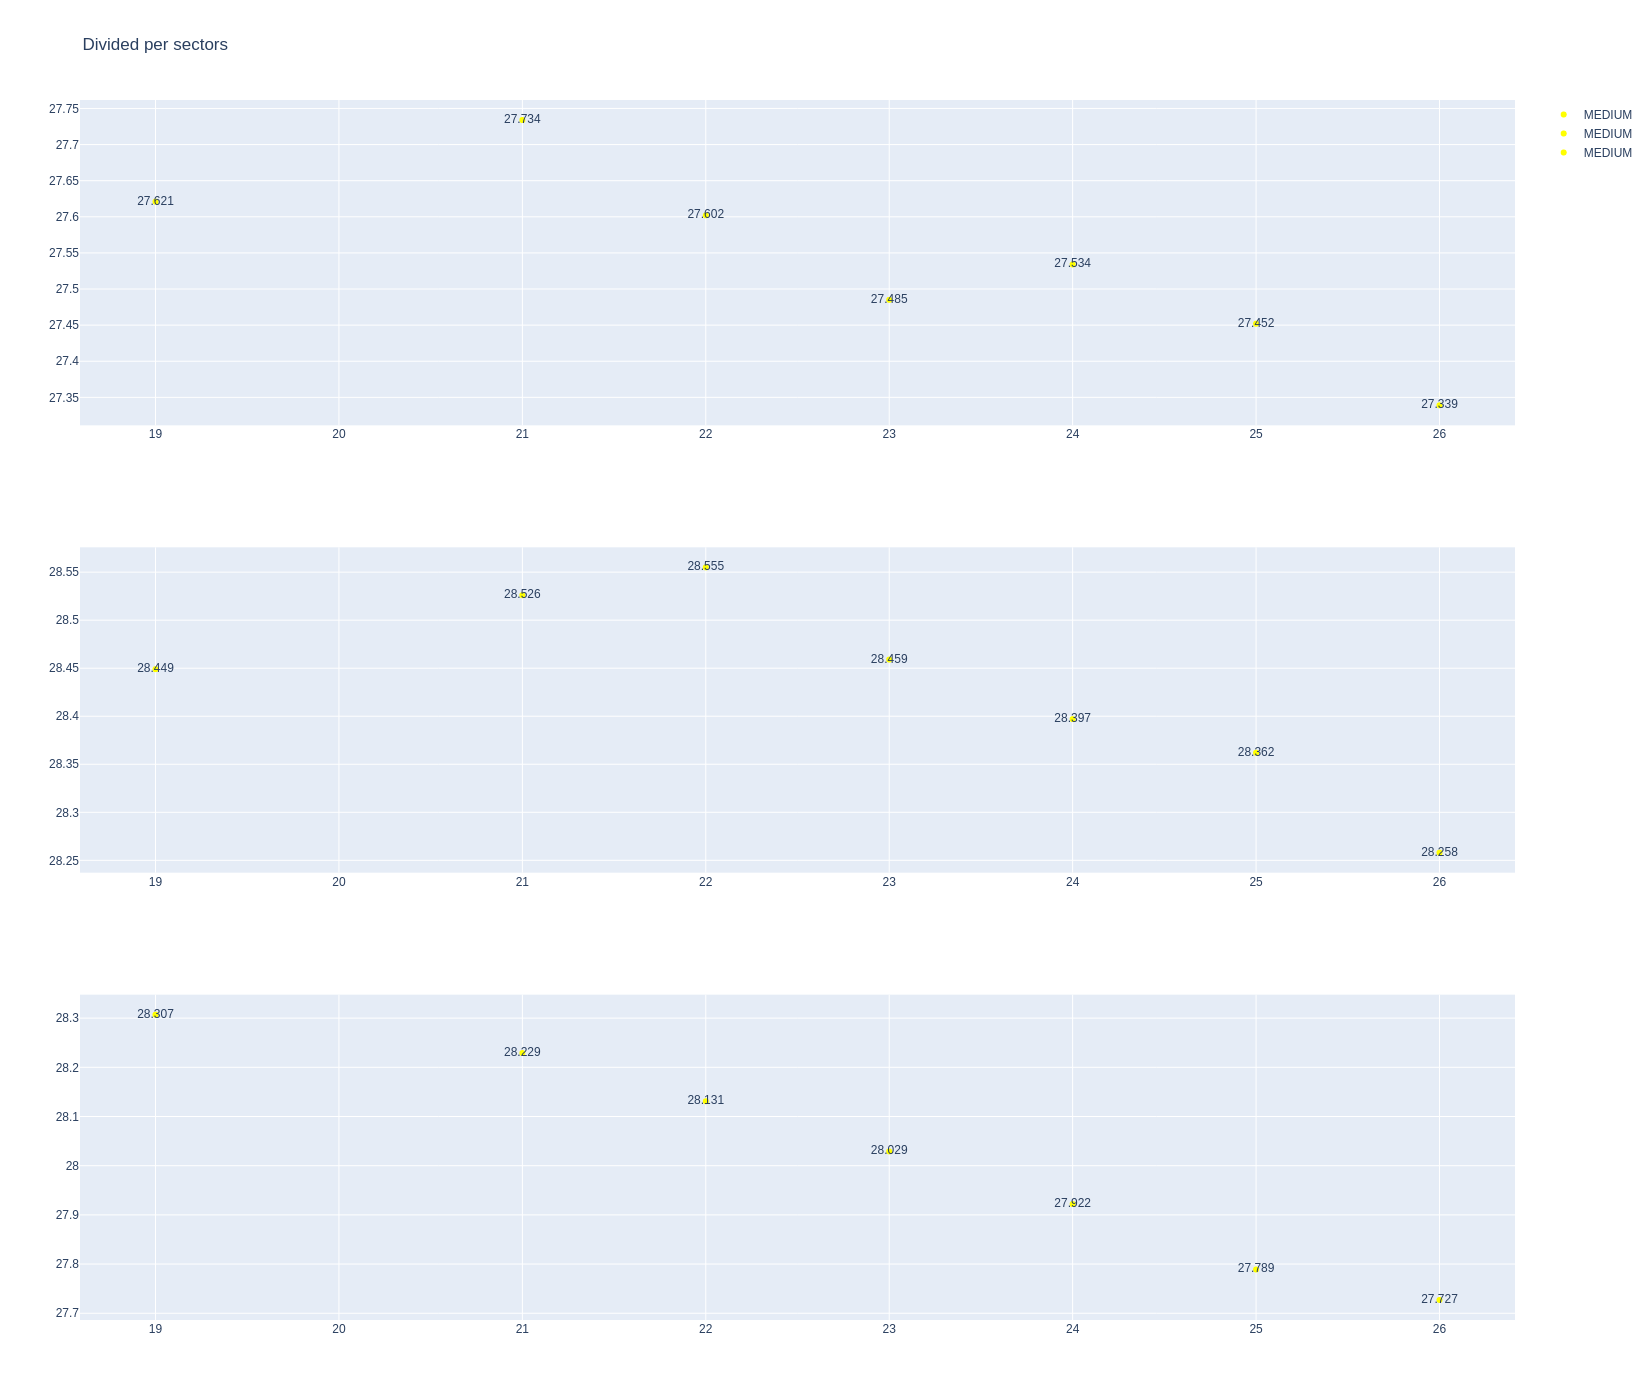

In [86]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Kick Sauber

In [87]:
stintInformation.query('driver_number == 27 or driver_number == 5')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
0          1268         9906             1              5          1        3   
8          1268         9906             2              5          4        5   
12         1268         9906             1             27          1        5   
32         1268         9906             2             27          6        8   
34         1268         9906             3              5          6        7   
49         1268         9906             3             27          9       11   
52         1268         9906             4              5          8       10   
63         1268         9906             4             27         12       14   
64         1268         9906             5              5         11       13   
71         1268         9906             6              5         14       14   
80         1268         9906             7              5         15       22   
81         1268         9906             5             27         15       24   
91         1268         9906             8              5         23       25   
93         1268         9906             6             27         25       27   

   compound  tyre_age_at_start  
0    MEDIUM                  0  
8    MEDIUM                  0  
12     HARD                  0  
32     HARD                  0  
34   MEDIUM                  0  
49     SOFT                  0  
52     SOFT                  0  
63     SOFT                  0  
64     SOFT                  0  
71   MEDIUM                  7  
80   MEDIUM                  0  
81     HARD                  8  
91     SOFT                  0  
93     SOFT                  0

In [88]:
data = libraryDataF1.getinfolongruns(jointables2,27,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
319  Nico HULKENBERG     HARD  2025-09-05T15:46:24.183000+00:00          16   
335  Nico HULKENBERG     HARD  2025-09-05T15:47:48.453000+00:00          17   
351  Nico HULKENBERG     HARD  2025-09-05T15:49:13.328000+00:00          18   
370  Nico HULKENBERG     HARD  2025-09-05T15:50:37.951000+00:00          19   
389  Nico HULKENBERG     HARD  2025-09-05T15:52:02.417000+00:00          20   
408  Nico HULKENBERG     HARD  2025-09-05T15:53:26.660000+00:00          21   
427  Nico HULKENBERG     HARD  2025-09-05T15:54:51.023000+00:00          22   
446  Nico HULKENBERG     HARD  2025-09-05T15:56:14.784000+00:00          23   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
319             27.766             28.726             27.853        84.345  
335             27.945             28.900             28.005        84.850  
351             27.737             28.832             27.989        84.558  
370             27.864             28.760             27.921        84.545  
389             27.641             28.621             27.920        84.182  
408             27.673             28.789             27.902        84.364  
427             27.668             28.533             27.686        83.887  
446             27.389             28.450             27.612        83.451

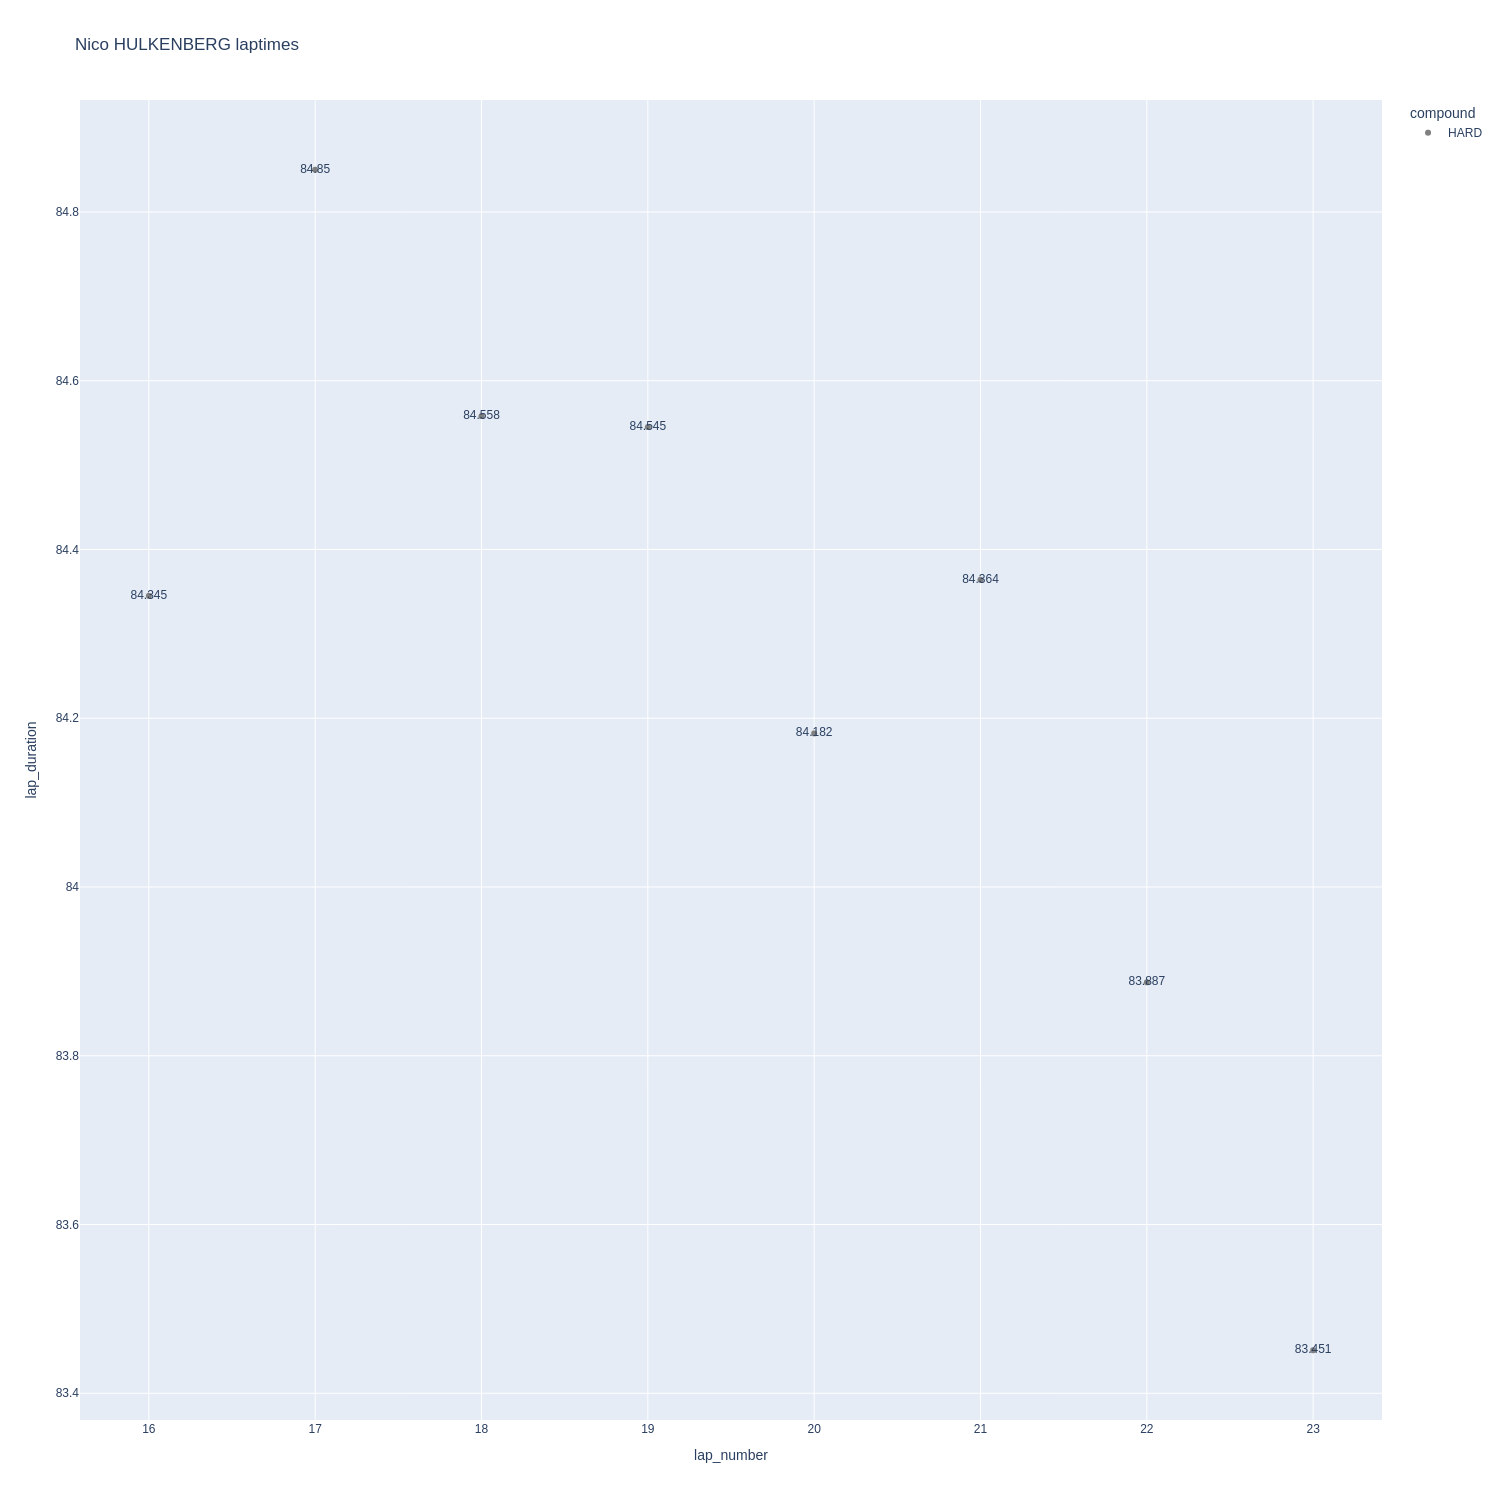

In [89]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

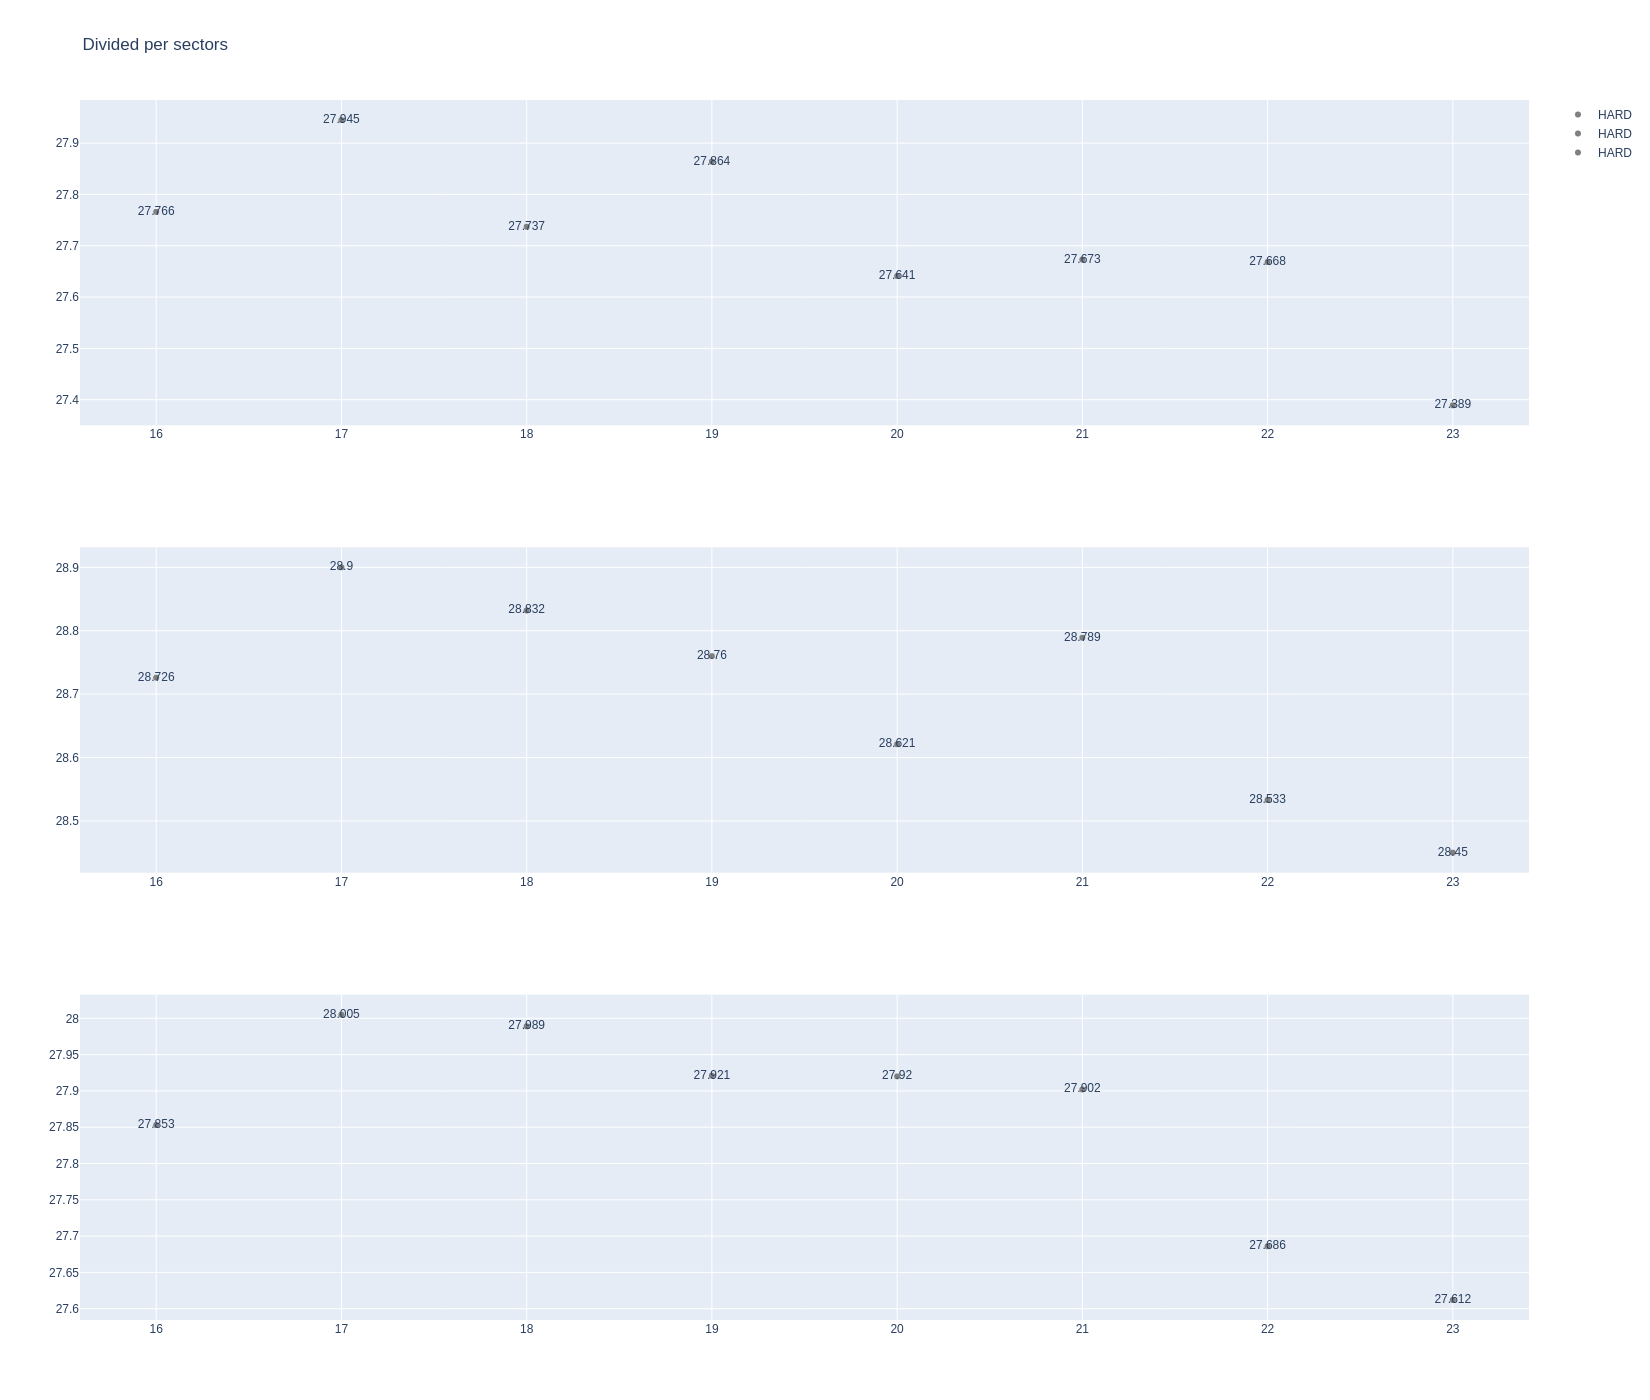

In [90]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [91]:
data = libraryDataF1.getinfolongruns(jointables2,5,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
345  Gabriel BORTOLETO   MEDIUM  2025-09-05T15:48:35.582000+00:00          16   
362  Gabriel BORTOLETO   MEDIUM  2025-09-05T15:49:59.477000+00:00          17   
381  Gabriel BORTOLETO   MEDIUM  2025-09-05T15:51:23.923000+00:00          18   
400  Gabriel BORTOLETO   MEDIUM  2025-09-05T15:52:48.338000+00:00          19   
419  Gabriel BORTOLETO   MEDIUM  2025-09-05T15:54:12.248000+00:00          20   
438  Gabriel BORTOLETO   MEDIUM  2025-09-05T15:55:36.323000+00:00          21   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
345             27.611             28.474             27.913        83.998  
362             27.670             28.626             28.165        84.461  
381             27.744             28.517             28.025        84.286  
400             27.537             28.516             27.904        83.957  
419             27.660             28.551             27.936        84.147  
438             27.586             28.223             27.690        83.499

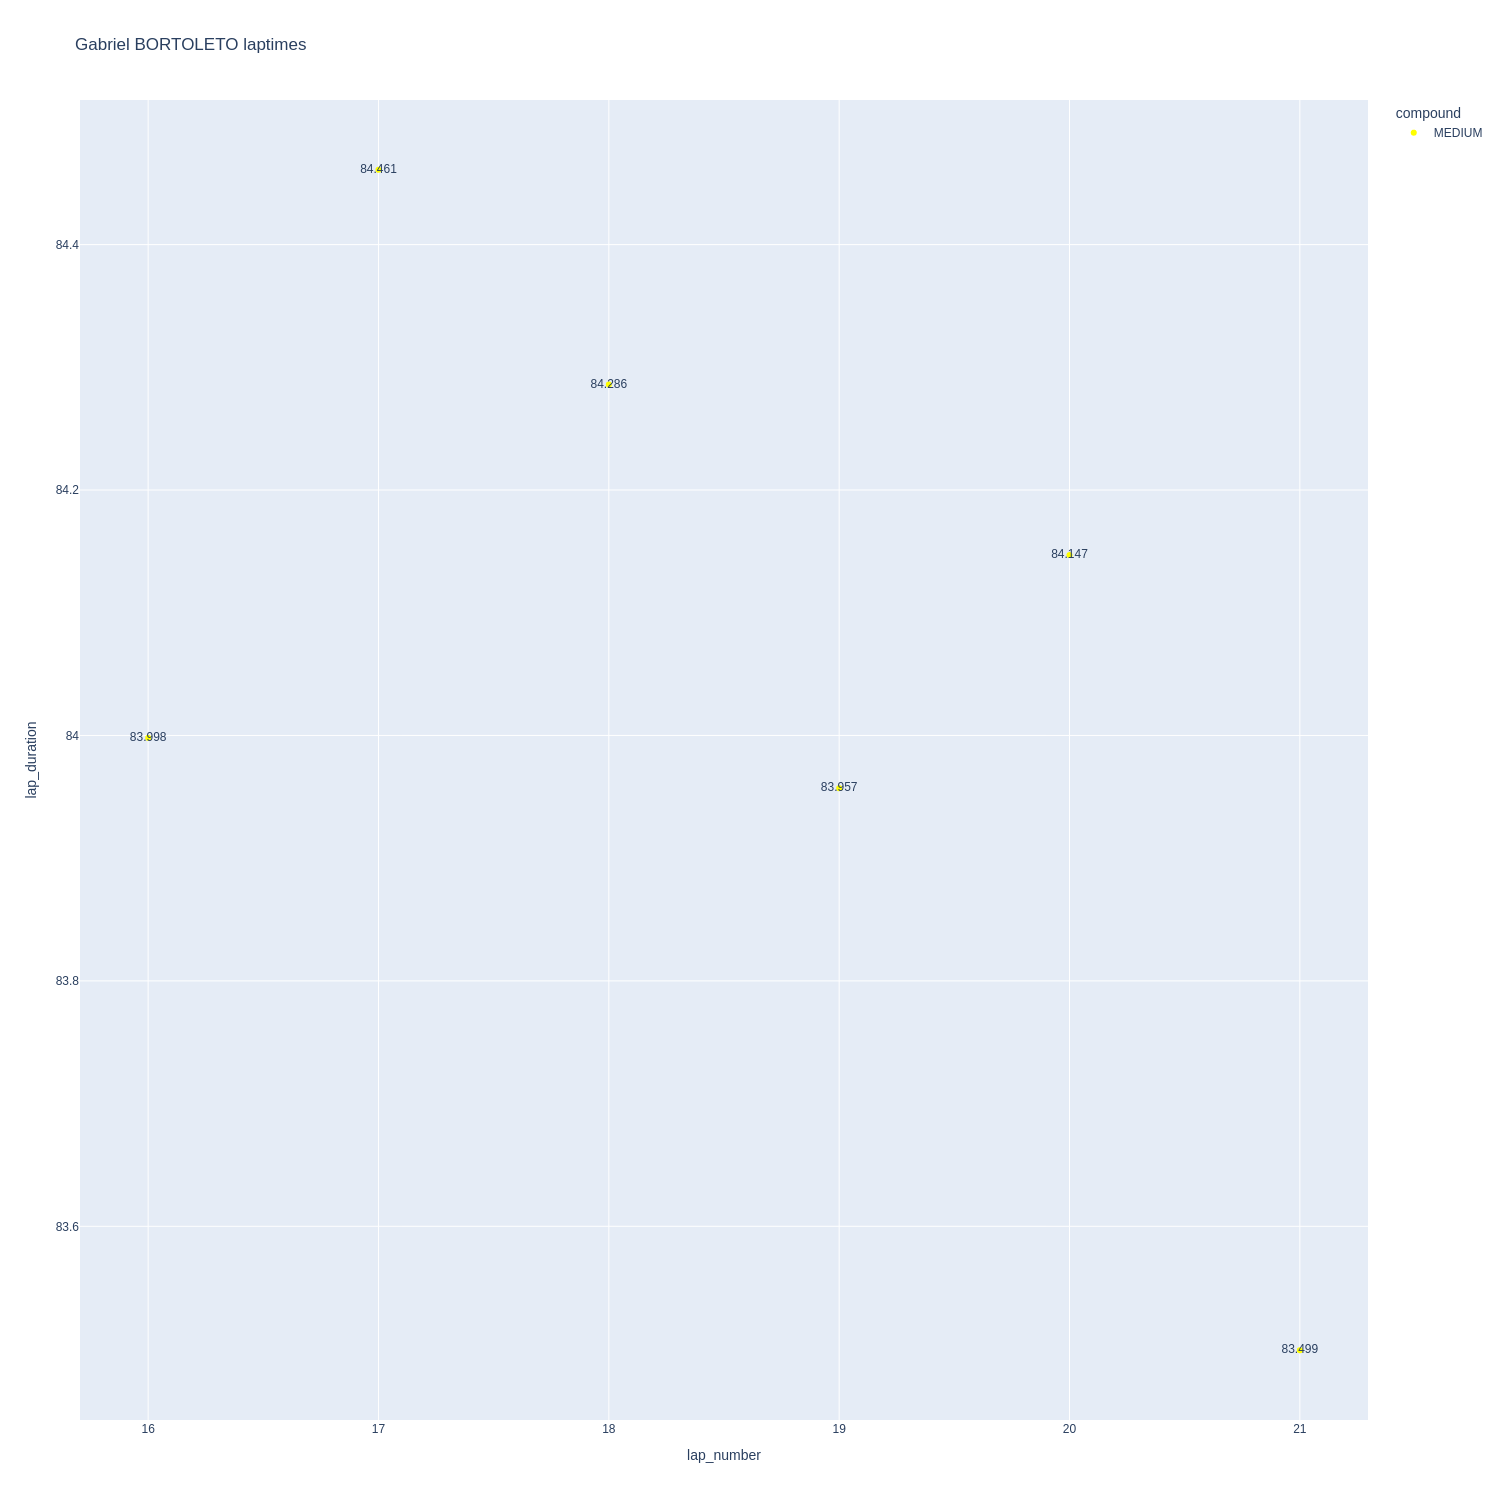

In [92]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

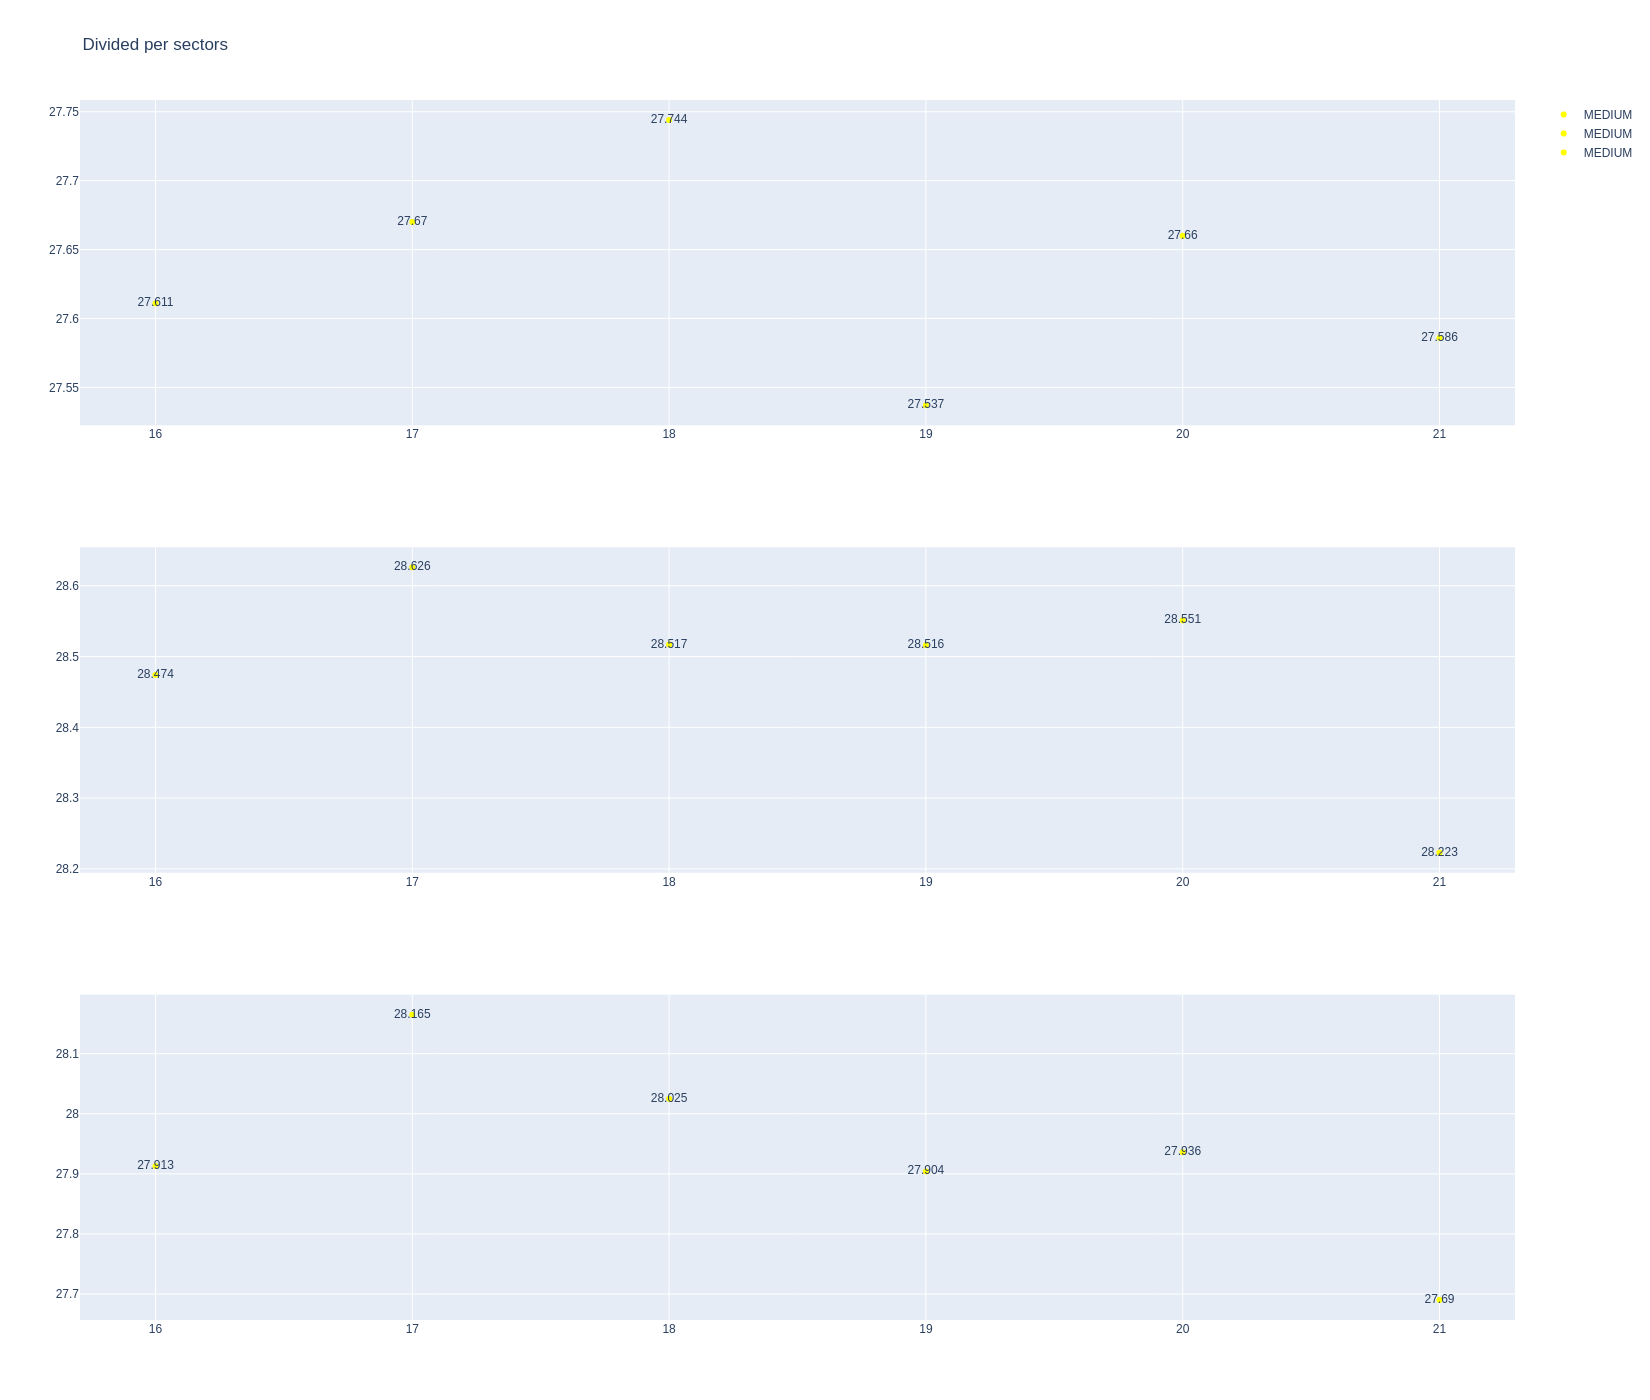

In [93]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Long runs mean for each driver

In [94]:
longrun_data = libraryDataF1.obtainLongRunData(drivers,jointables2,MINIMUN_SECONDS,MAXIMUM_SECONDS)

##### Sorted by lap duration
It seems that teams powered by HOnda suffers in S1 while Alpine had a good pace. It seems that Aston is the fourth team in race pace witrh softs and mediums.
Aston in S2 is competitive. Colapinto's pace in S3 is interesting and Stroll suffers here.

In [95]:
sorted_laps = pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3'])

In [96]:
sorted_laps.sort_values(by='lap_duration',ascending=True)

driver compound  lap_duration    sector1    sector2    sector3
1        Lando NORRIS   MEDIUM     83.696727  27.498909  28.419455  27.778364
0      Max VERSTAPPEN   MEDIUM     83.922100  27.599000  28.472100  27.851000
15       Carlos SAINZ   MEDIUM     83.986714  27.538143  28.429429  28.019143
17      Oscar PIASTRI   MEDIUM     84.001556  27.602556  28.507889  27.891111
2   Gabriel BORTOLETO   MEDIUM     84.058000  27.634667  28.484500  27.938833
9     Alexander ALBON   MEDIUM     84.198667  27.508167  28.637500  28.053000
16     George RUSSELL     HARD     84.201375  27.564000  28.483875  28.153500
10    Nico HULKENBERG     HARD     84.272750  27.710375  28.701375  27.861000
12       Esteban OCON     HARD     84.325000  27.794875  28.524875  28.005250
3        Isack HADJAR   MEDIUM     84.373667  27.843000  28.515889  28.014778
14     Lewis HAMILTON     HARD     84.441889  27.406667  28.628667  28.406556
6     Charles LECLERC     SOFT     84.444333  27.778800  28.538500  28.163333
4        Pierre GASLY   MEDIUM     84.451667  27.745250  28.758417  27.948000
11        Liam LAWSON   MEDIUM     84.521667  27.827444  28.670556  28.023667
13   Franco COLAPINTO   MEDIUM     84.714867  27.786133  28.705667  28.223067
5     Fernando ALONSO   MEDIUM     84.747167  27.684167  28.444000  28.619000
18     Oliver BEARMAN     HARD     84.748333  27.742667  28.797222  28.208444
7        Lance STROLL   MEDIUM     84.768333  27.695000  28.685667  28.387667
8        Yuki TSUNODA   MEDIUM     84.779444  27.911333  28.891000  27.977111

##### Sorted by sector 1

In [97]:
sorted_laps.sort_values(by='sector1',ascending=True)[['driver','compound','sector1']]

driver compound    sector1
14     Lewis HAMILTON     HARD  27.406667
1        Lando NORRIS   MEDIUM  27.498909
9     Alexander ALBON   MEDIUM  27.508167
15       Carlos SAINZ   MEDIUM  27.538143
16     George RUSSELL     HARD  27.564000
0      Max VERSTAPPEN   MEDIUM  27.599000
17      Oscar PIASTRI   MEDIUM  27.602556
2   Gabriel BORTOLETO   MEDIUM  27.634667
5     Fernando ALONSO   MEDIUM  27.684167
7        Lance STROLL   MEDIUM  27.695000
10    Nico HULKENBERG     HARD  27.710375
18     Oliver BEARMAN     HARD  27.742667
4        Pierre GASLY   MEDIUM  27.745250
6     Charles LECLERC     SOFT  27.778800
13   Franco COLAPINTO   MEDIUM  27.786133
12       Esteban OCON     HARD  27.794875
11        Liam LAWSON   MEDIUM  27.827444
3        Isack HADJAR   MEDIUM  27.843000
8        Yuki TSUNODA   MEDIUM  27.911333

##### Sorted by sector 2

In [98]:
sorted_laps.sort_values(by='sector2',ascending=True)[['driver','compound','sector2']]

driver compound    sector2
1        Lando NORRIS   MEDIUM  28.419455
15       Carlos SAINZ   MEDIUM  28.429429
5     Fernando ALONSO   MEDIUM  28.444000
0      Max VERSTAPPEN   MEDIUM  28.472100
16     George RUSSELL     HARD  28.483875
2   Gabriel BORTOLETO   MEDIUM  28.484500
17      Oscar PIASTRI   MEDIUM  28.507889
3        Isack HADJAR   MEDIUM  28.515889
12       Esteban OCON     HARD  28.524875
6     Charles LECLERC     SOFT  28.538500
14     Lewis HAMILTON     HARD  28.628667
9     Alexander ALBON   MEDIUM  28.637500
11        Liam LAWSON   MEDIUM  28.670556
7        Lance STROLL   MEDIUM  28.685667
10    Nico HULKENBERG     HARD  28.701375
13   Franco COLAPINTO   MEDIUM  28.705667
4        Pierre GASLY   MEDIUM  28.758417
18     Oliver BEARMAN     HARD  28.797222
8        Yuki TSUNODA   MEDIUM  28.891000

##### Sorted by sector 3

In [99]:
sorted_laps.sort_values(by='sector3',ascending=True)[['driver','compound','sector3']]

driver compound    sector3
1        Lando NORRIS   MEDIUM  27.778364
0      Max VERSTAPPEN   MEDIUM  27.851000
10    Nico HULKENBERG     HARD  27.861000
17      Oscar PIASTRI   MEDIUM  27.891111
2   Gabriel BORTOLETO   MEDIUM  27.938833
4        Pierre GASLY   MEDIUM  27.948000
8        Yuki TSUNODA   MEDIUM  27.977111
12       Esteban OCON     HARD  28.005250
3        Isack HADJAR   MEDIUM  28.014778
15       Carlos SAINZ   MEDIUM  28.019143
11        Liam LAWSON   MEDIUM  28.023667
9     Alexander ALBON   MEDIUM  28.053000
16     George RUSSELL     HARD  28.153500
6     Charles LECLERC     SOFT  28.163333
18     Oliver BEARMAN     HARD  28.208444
13   Franco COLAPINTO   MEDIUM  28.223067
7        Lance STROLL   MEDIUM  28.387667
14     Lewis HAMILTON     HARD  28.406556
5     Fernando ALONSO   MEDIUM  28.619000

#### Long runs mean

In [ ]:

longruns_summary = libraryDataF1.obtainMeanLongRuns(drivers,jointables2,MINIMUN_SECONDS,MAXIMUM_SECONDS)

##### Mean pace per compound

In [101]:
libraryDataF1.showDataLongRuns(longruns_summary,"MEDIUM","mean_lap_time",['driver','mean_lap_time'])

driver  mean_lap_time
1       L NORRIS         83.697
0   M VERSTAPPEN         83.922
15       C SAINZ         83.987
17     O PIASTRI         84.002
2    G BORTOLETO         84.058
9        A ALBON         84.199
3       I HADJAR         84.374
4        P GASLY         84.452
11      L LAWSON         84.522
13   F COLAPINTO         84.715
5       F ALONSO         84.747
7       L STROLL         84.768
8      Y TSUNODA         84.779

In [102]:
libraryDataF1.showDataLongRuns(longruns_summary,"SOFT","mean_lap_time",['driver','mean_lap_time'])

driver  mean_lap_time
6  C LECLERC         84.444

In [103]:
libraryDataF1.showDataLongRuns(longruns_summary,"HARD","mean_lap_time",['driver','mean_lap_time'])

driver  mean_lap_time
16     G RUSSELL         84.201
10  N HULKENBERG         84.273
12        E OCON         84.325
14    L HAMILTON         84.337
18     O BEARMAN         84.748

## Free Practice 3
### Obtain setup

In [104]:
practice = libraryDataF1.obtain_information('laps',session_key=9907)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9907)
drivers = libraryDataF1.obtain_information('drivers',session_key=9907)

In [105]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
libraryDataF1.obtain_drivers_colours(drivers)

In [106]:
session = ff1.get_session(2025, 16, 'FP3')
session.load();

req         WARNING 	DEFAULT CACHE ENABLED! (4.83 GB) /home/frank/.cache/fastf1
core           INFO 	Loading data for Italian Grand Prix - Practice 3 [v3.3.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status d

### Speed trap

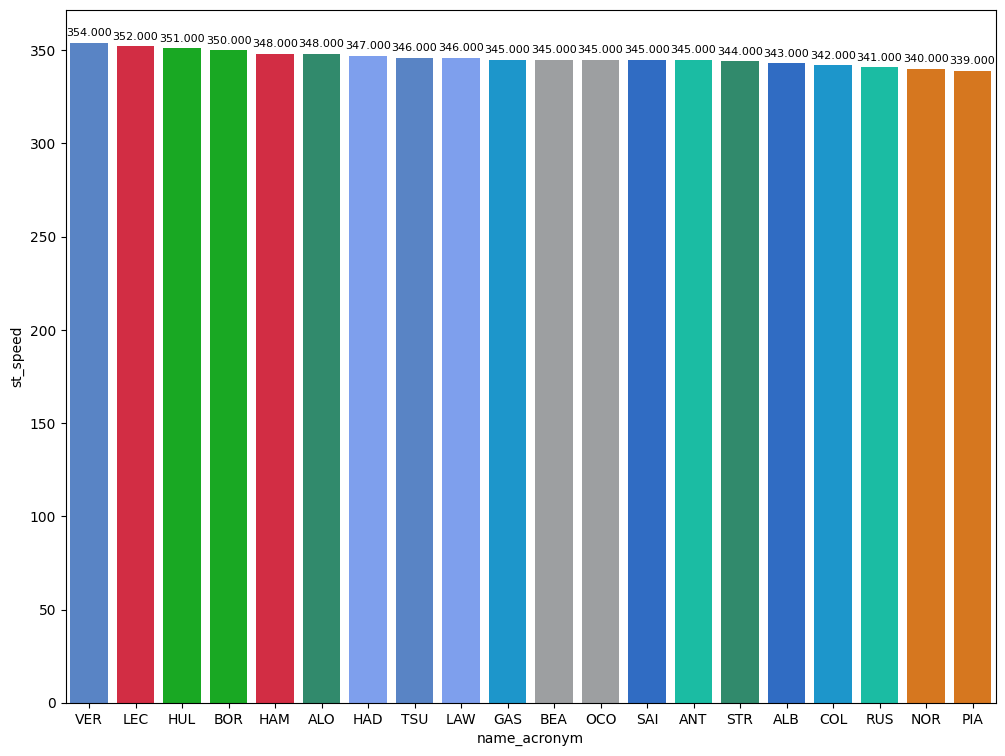

In [107]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

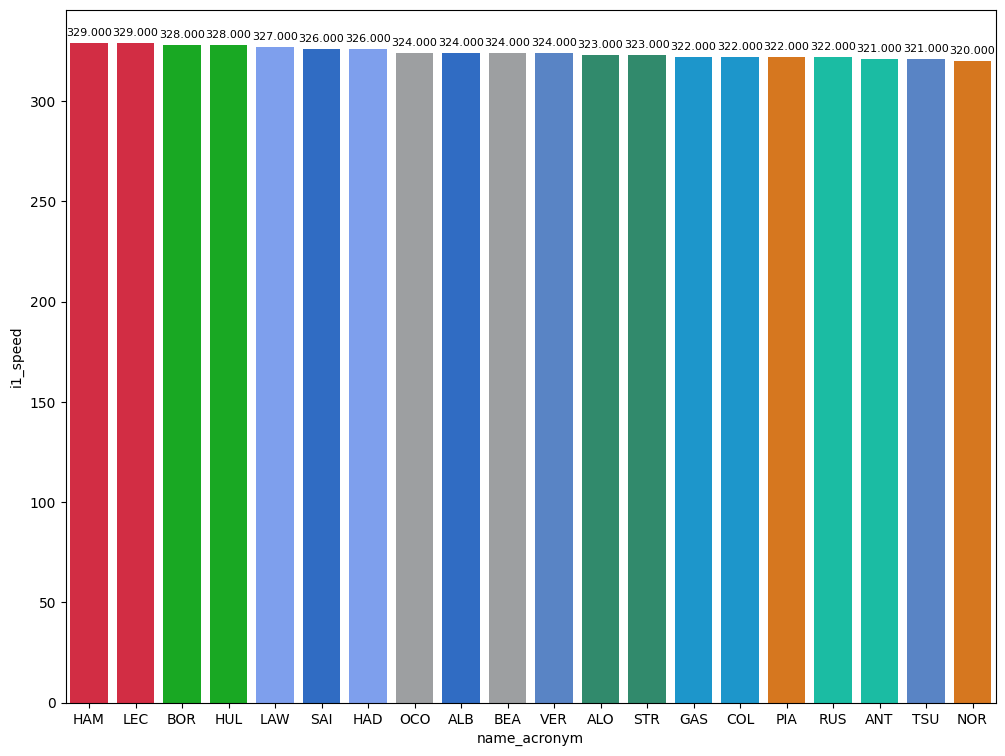

In [108]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

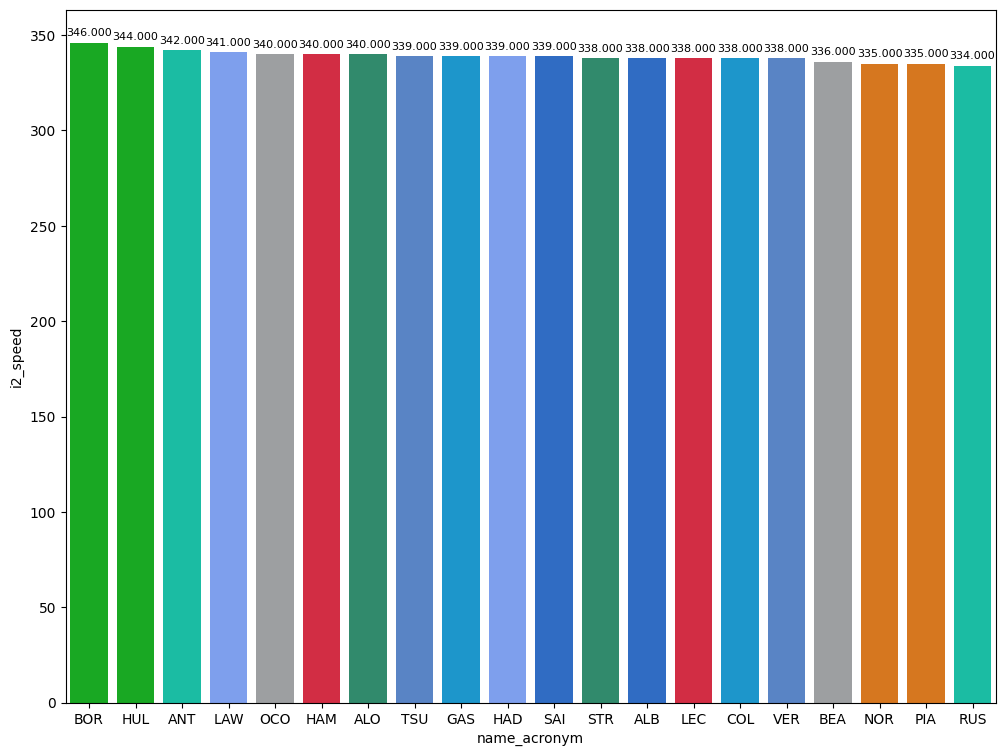

In [109]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [110]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

full_name compound  duration_sector_1  duration_sector_2  \
76     Yuki TSUNODA     HARD             26.818             27.018   
206  Lewis HAMILTON   MEDIUM             26.510             26.996   
256    Lando NORRIS     SOFT             26.654             26.411   

     duration_sector_3  lap_duration  
76              26.626        80.462  
206             26.423        79.929  
256             26.266        79.331

### Deltas
In this section we can see the deltas of the fastest lap of each driver compared with the fastest lap of the session

In [111]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


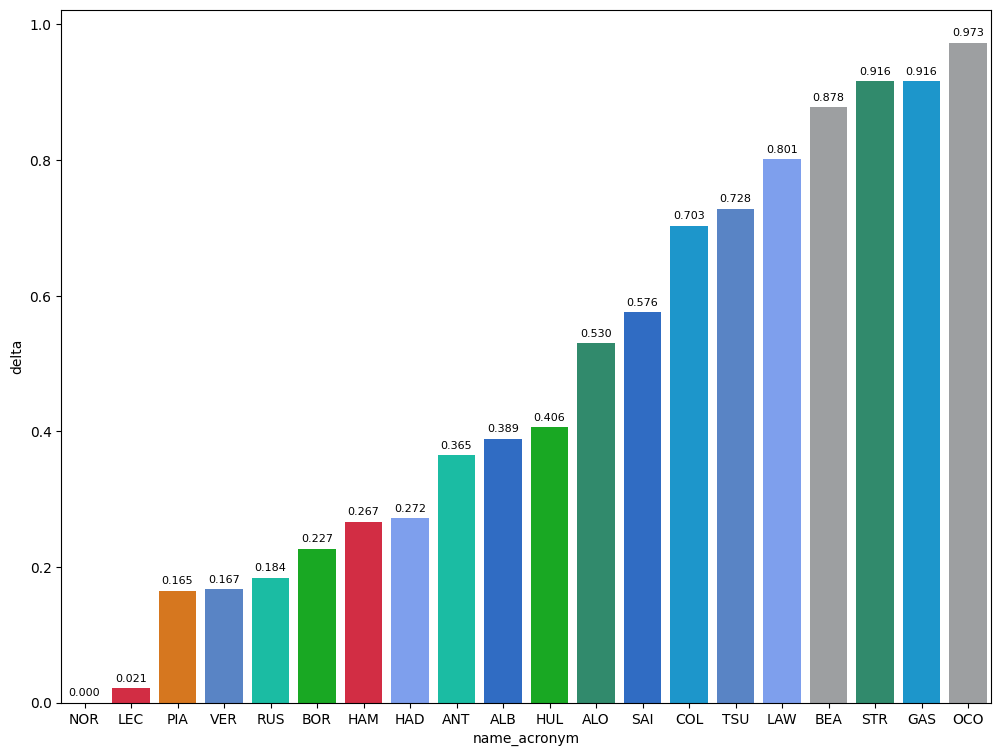

In [112]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
In this section, best sector are taken of each sector to see the car's performance in each sector.

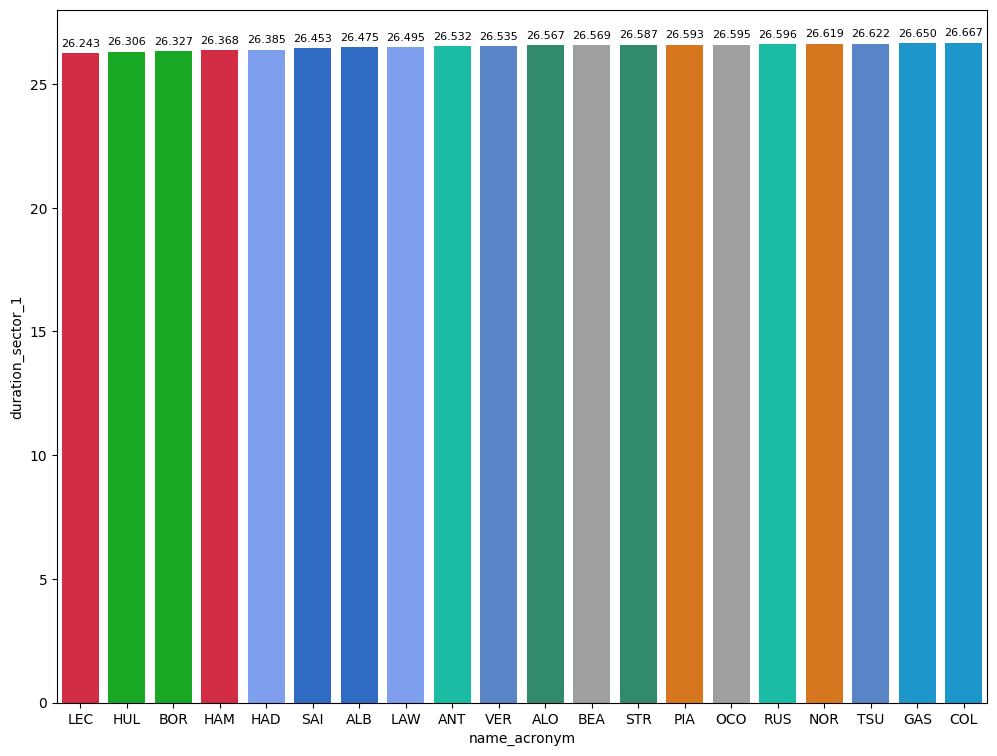

In [113]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin().dropna()].sort_values(by=['duration_sector_1'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_1",sectorPace)

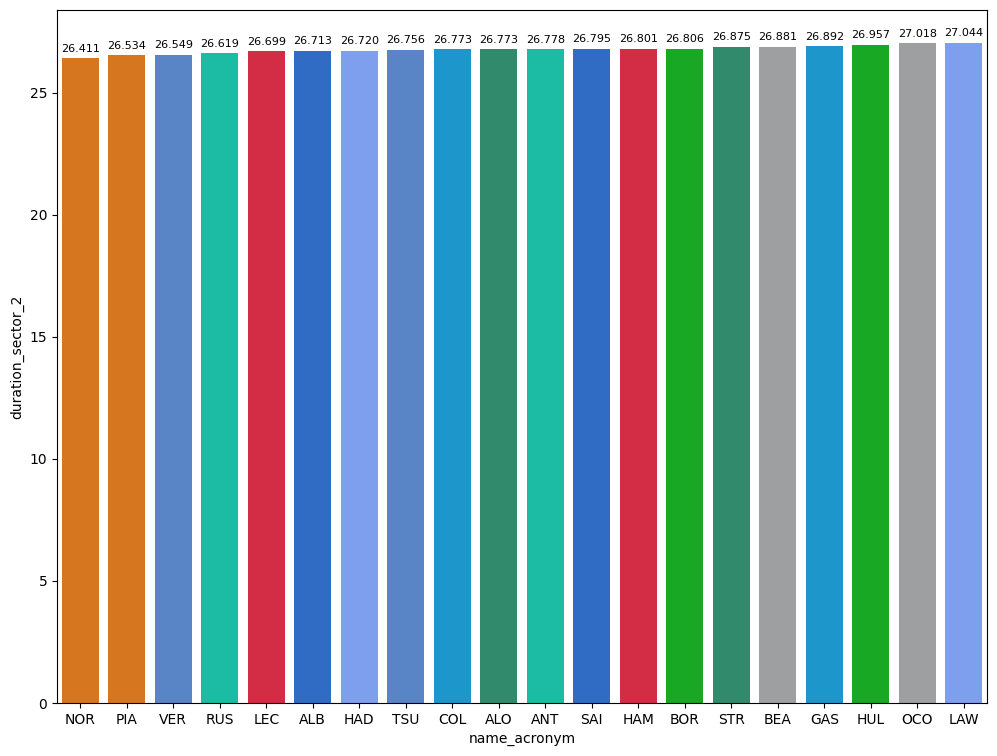

In [114]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin().dropna()].sort_values(by=['duration_sector_2'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_2",sectorPace)

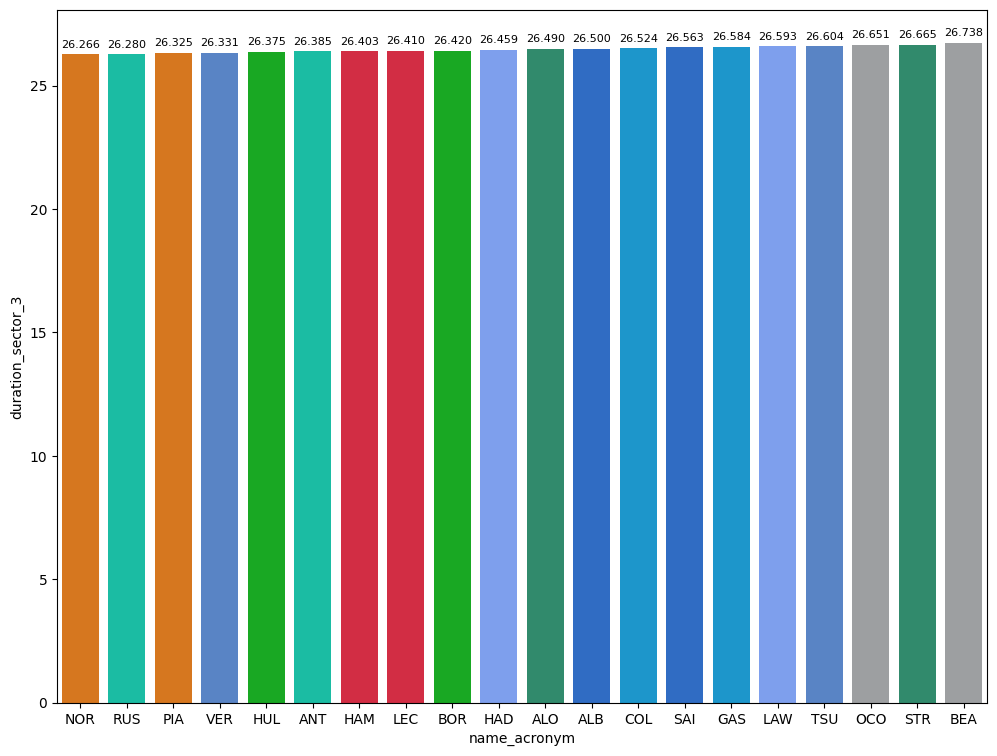

In [115]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin().dropna()].sort_values(by=['duration_sector_3'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_3",sectorPace)

### Mean pace with the different compound used on the session

In [116]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False and lap_duration <88 and lap_duration > 84").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

lap_duration
compound              
SOFT         84.540667
HARD         87.013000
MEDIUM       87.582000

### Comparaison between the poleman and the second

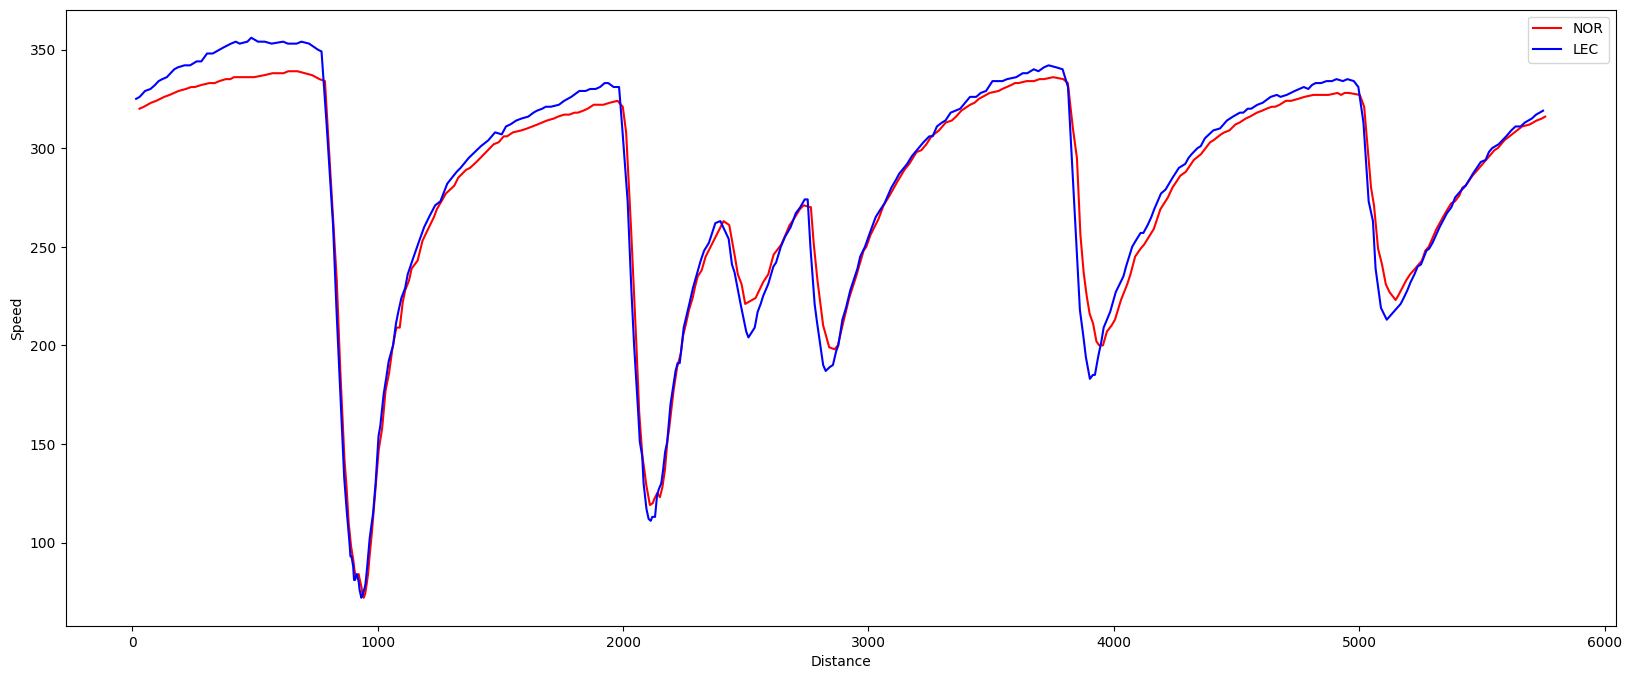

In [117]:
libraryDataF1.plot_telemetry("Distance","Speed",dt,session)

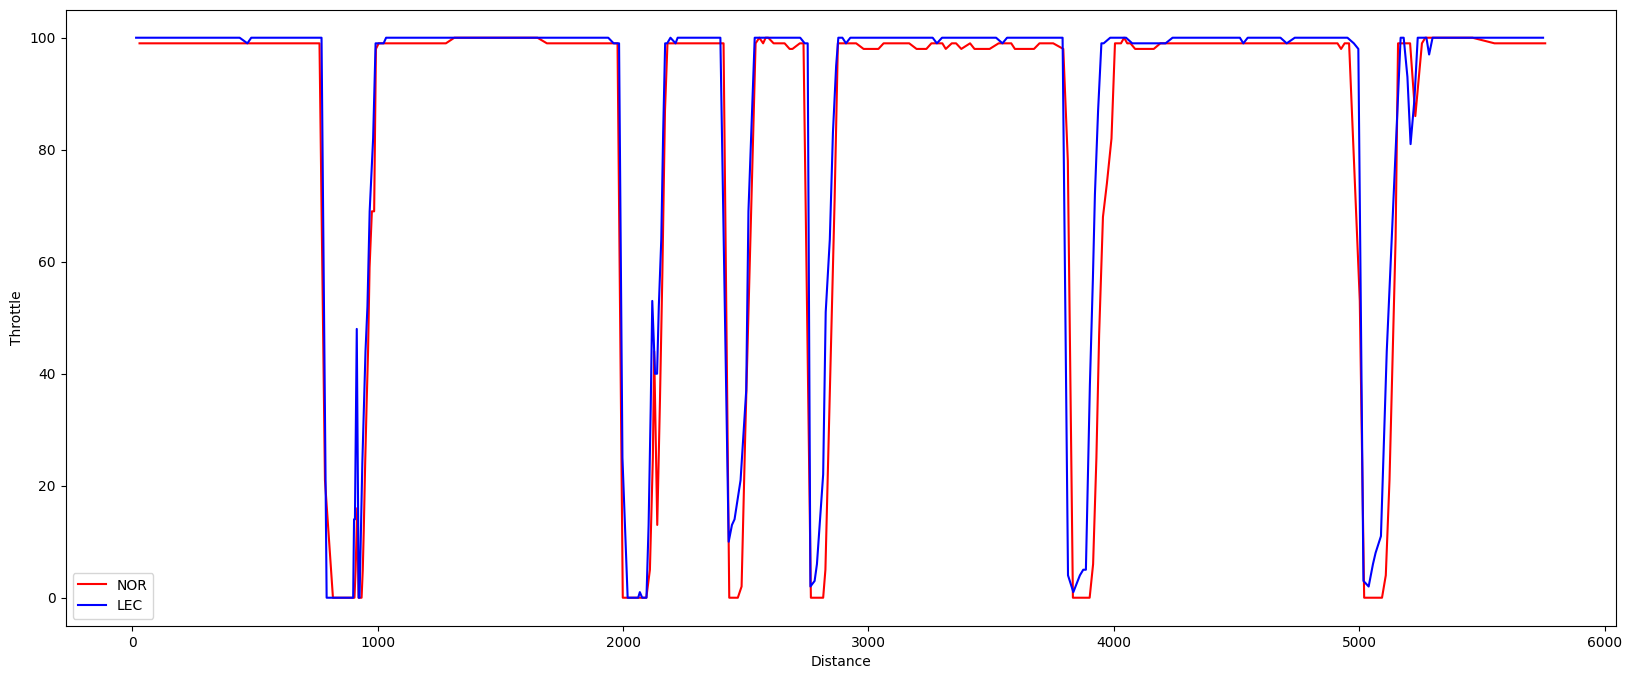

In [118]:
libraryDataF1.plot_telemetry("Distance","Throttle",dt,session)

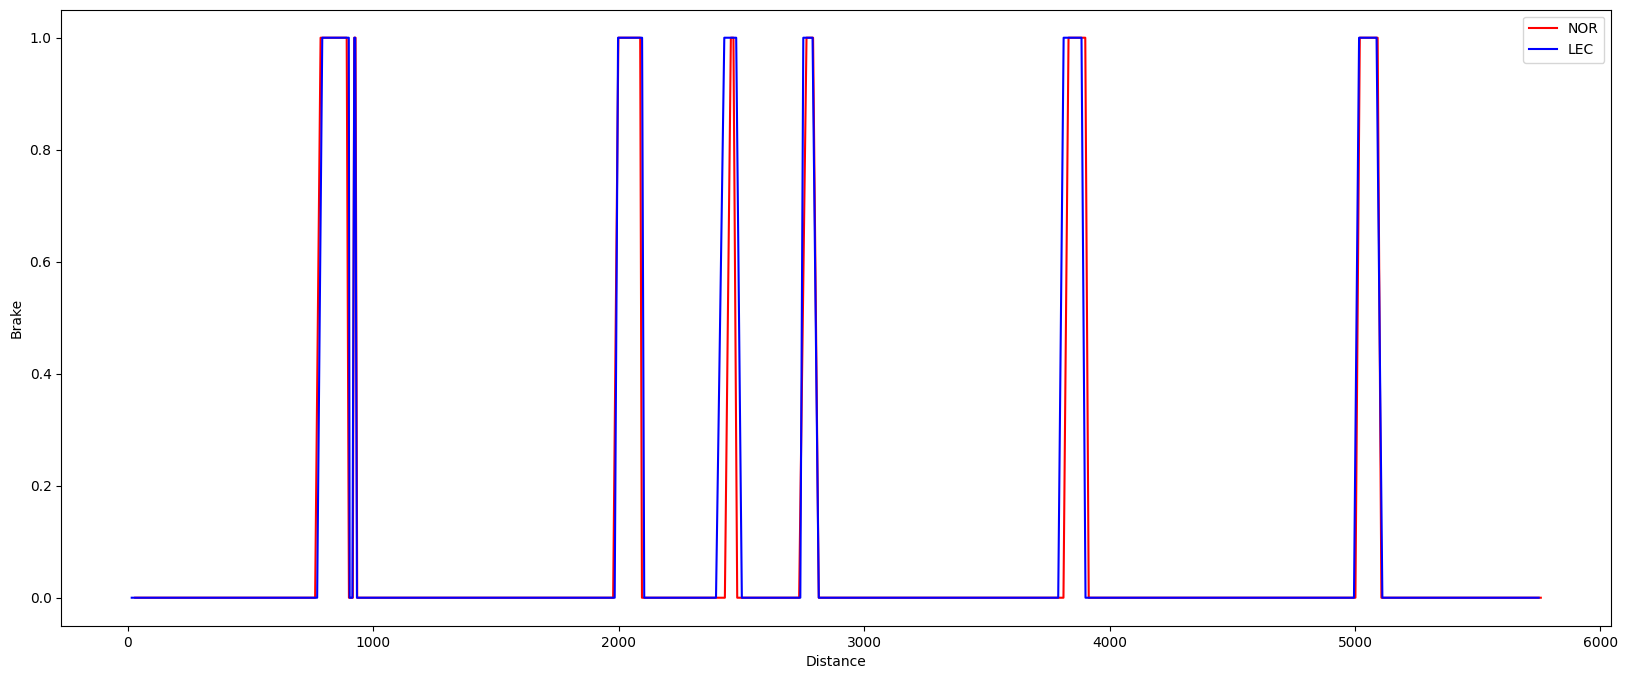

In [119]:
libraryDataF1.plot_telemetry("Distance","Brake",dt,session)

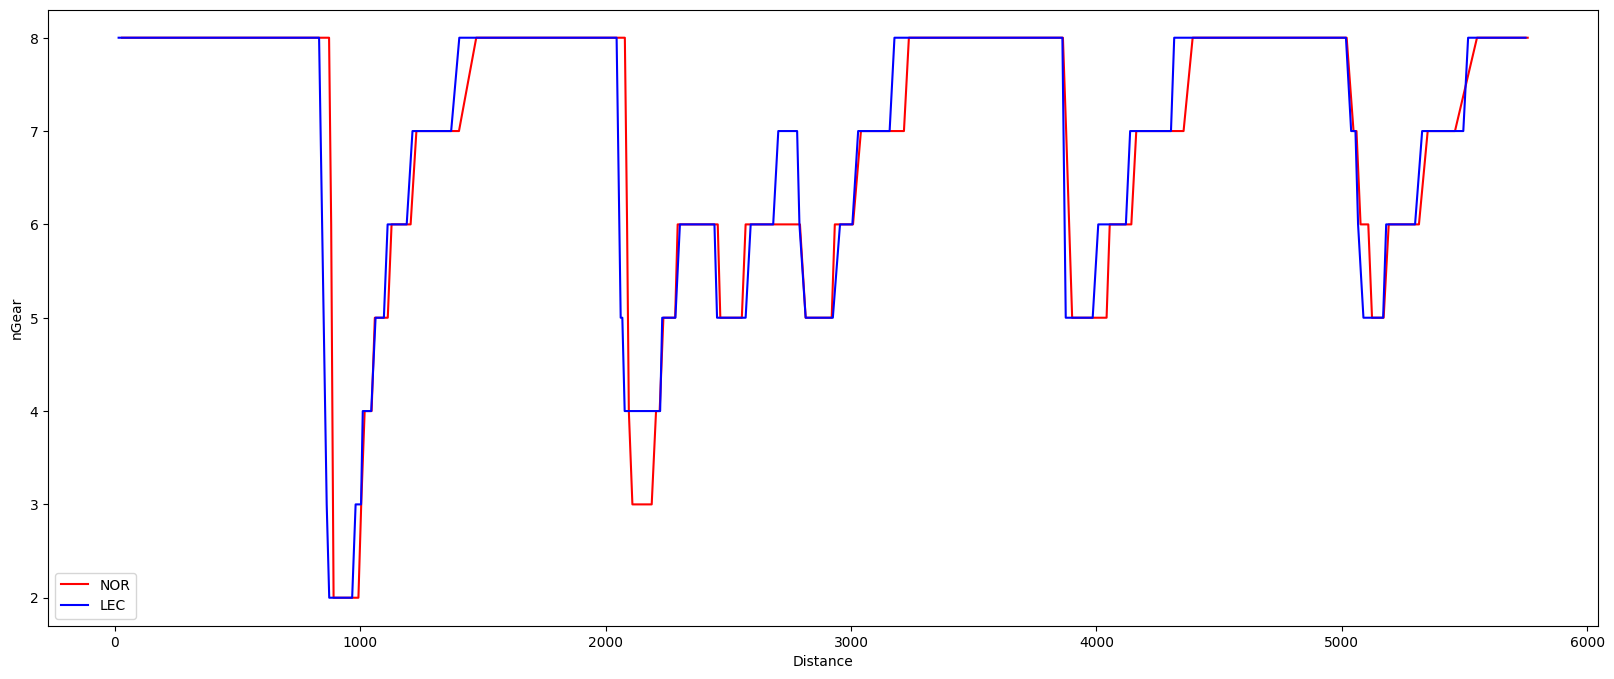

In [120]:
libraryDataF1.plot_telemetry("Distance","nGear",dt,session)

## Predictions

In [ ]:
# Free Practice 3
practice = libraryDataF1.obtain_information('laps',session_key=9585)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9585)
drivers = libraryDataF1.obtain_information('drivers',session_key=9585)

stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointablesfreepractice3 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])

# Free Practice 2
practice = libraryDataF1.obtain_information('laps',session_key=9584)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9584)
drivers = libraryDataF1.obtain_information('drivers',session_key=9584)


stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointablesfreepractice2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])


### Qualyfing prediction

In [ ]:
qualy_simulation = libraryDataF1.qualyfing_prediction([jointablesfreepractice3,jointablesfreepractice2],drivers,0.02,0.02,0.08)
qualy_simulation.sort_values(by='qualy_lap_time')

### Race prediction

In [ ]:
race_simulation = libraryDataF1.race_prediction(jointablesfreepractice2,drivers,84,88.8)
race_simulation.groupby('team').mean().sort_values(by='mean_lap_duration')

## Qualyfing
### Set up
First of all, it is neccesary to obtain the data about the qualyfing
#### Race control
This section has been added in order to know which laps has been deleted and knowing what happened on track during this session. As every laptime that has been deleted were slow laps, none of them were removed.

In [ ]:
libraryDataF1.obtain_information('race_control',session_key=9586)

### Obtain setup

In [ ]:
qualyfing = libraryDataF1.obtain_information('laps',session_key=9586)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9586)
drivers = libraryDataF1.obtain_information('drivers',session_key=9586)
libraryDataF1.obtain_drivers_colours(drivers)

In [ ]:
session = ff1.get_session(2024, 16, 'Q')
session.load();
session.laps["LapTimeSeconds"] = session.laps["LapTime"].dt.total_seconds()

In [ ]:
laptimes_deleted = [110.311,82.531]
driver_number_lap_deleted = [81,43]

for ltime_deleted, dn_time_deleted in zip(laptimes_deleted,driver_number_lap_deleted):
    try:
        id_deleted = qualyfing.query("driver_number == @dn_time_deleted and lap_duration == @ltime_deleted").index[0]
        qualyfing = qualyfing.drop(id_deleted)
    except:
        print("Laptime deleted associated with the selected driver does not exist. Please, check again the order of the arrays")

In [ ]:
bestlap = qualyfing.loc[qualyfing.groupby(['driver_number'])['lap_duration'].idxmin()].sort_values(by=['lap_duration'],ascending=True)

In this case, the fastest lap is 79.327 seconds (1.19.327= so that to obtain the competitve laps the fastest lap will be multiplied by 1.07 84.87989 seconds) due to, according to the rules all the drivers have to do unless one lap within this gap.

In [ ]:
competitiveLaps = qualyfing.query("is_pit_out_lap == False and lap_duration <= 84.87")

In [ ]:
drivers_list = list(competitiveLaps['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_information_qualy(driver,competitiveLaps,newdataset)
jointables = pd.merge(newdataset,drivers,on=['driver_number'])
jointables.sort_values(by=['fastest_lap'],ascending=True)
print()

#### Best lap per driver compared with the best lap of the session
In this chart we can see the deltas with compared with the fastest lap of the session that it could be different than the pole.

In [ ]:
dt = jointables.sort_values(by=['fastest_lap'],ascending=True)
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Speed trap

#### Maximum speed per drivers

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

### Maximum speed per teams

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i2_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","st_speed",top_speed)

In [ ]:
mergequaly = pd.merge(competitiveLaps,drivers,on=['driver_number'])

In order to know when each session finished, race control dataset will be consulted.

In [ ]:
maximumDateQ1 = "date_start <'2024-08-31T14:29:00+00:00'"
maximumDateQ2 = "date_start <'2024-08-31T14:52:00+00:00' and date_start >'2024-08-31T14:29:00+00:00'"
maximumDateQ3 = "date_start >'2024-08-31T14:52:00+00:00'"

### Qualyfing 1

In [ ]:
q1Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ1).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver,I will do a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap. 
With the new alphast, some drivers used two compounds to make their fastest lap. Using F1 tempo to watch the telemetry alongside the section where I comment the gap difference among the drivers eliminated compared to the driver that finished in a risk position to be eliminated.
Before the lesmos,Zhou was the fastest followed by Ricciardo, Stroll, Colapinto and Bottas. After the lesmos, Zhou lost his gap being only faster than Bottas. After the Serraglio straight we can observe that the Williams was the fastest,reaching 335 km/h and Colapinto cut his gap.After this straight, Stroll had the best second sector of this group but , unfortunately, he lost his gap in the third sector. 
Pdte: Colapinto's laptime was his fastest laptime. In his second attemp, he got wrong in the exit of the second lesmo


In [ ]:
#Reference
P15 = q1Data[14:15]

In [ ]:
print(
"Driver:",P15.full_name.to_string(index=False),
"Sector 1: ",P15.duration_sector_1.to_string(index=False),
"Sector 2: ",P15.duration_sector_2.to_string(index=False),
"Sector 3: ",P15.duration_sector_3.to_string(index=False)
)

In [ ]:
q1Data[15::]

##### Analysis of each sector of the driver at risk compared to the drivers eliminated.


In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[15::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

In [ ]:
libraryDataF1.draw_gap(P15,15,20,q1Data,drivers,session)

##### Analysis with the drivers that finished better than the driver at risk
I bring this section in order to know where the driver at risk lost his chances to improve in the qualyfing.

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[0:14].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q1Data.sort_values(by=['duration_sector_1'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q1Data.sort_values(by=['duration_sector_2'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q1Data.sort_values(by=['duration_sector_3'],ascending=True))

### Qualyfing 2

In [ ]:
q2Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ2).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.
Differences are usually narrow but, in this case, were pretty narrow. In the exit of turn 1,Ricciardo was the fastest and, since then, the fight was between Ricciardo and Hulkenberg being the Australian the fastest.
Alonso that was 1.5 tenths behind then, cut his gap thanks to the second DRS zone.being only 0.084 slower than Hulkenberg- In case of Ricciardo, he lost his lap in this straight Since the exit of the chicane of the secondd sector, Alonso was the fastest being in front of Hulkenberg but in the last turn, Hulkenberg cut the enough gap to pass to Q3.

In [ ]:
#Reference
P10 = q2Data[9:10]
print(
"Driver:",P10.full_name.to_string(index=False),
"Sector 1: ",P10.duration_sector_1.to_string(index=False),
"Sector 2: ",P10.duration_sector_2.to_string(index=False),
"Sector 3: ",P10.duration_sector_3.to_string(index=False)
)

##### Analysis of each sector of the driver at risk compared to the drivers eliminated.


In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[10::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

In [ ]:
libraryDataF1.draw_gap(P10,10,15,q2Data,drivers,session)

##### Analysis with the drivers that finished better than the driver at risk

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[0:9].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q2Data.sort_values(by=['duration_sector_1'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q2Data.sort_values(by=['duration_sector_2'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q2Data.sort_values(by=['duration_sector_3'],ascending=True))

### Qualyfing 3

In [ ]:
q3Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ3).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with poleman
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
#Reference
P1 = q3Data[:1]
print(
"Driver:",P1.full_name.to_string(index=False),
"Sector 1: ",P1.duration_sector_1.to_string(index=False),
"Sector 2: ",P1.duration_sector_2.to_string(index=False),
"Sector 3: ",P1.duration_sector_3.to_string(index=False)
)

##### Analysis of each sector of the poleman compared to the drivers eliminated.
McLaren had an extra in Monza that this one was showed in Qualyfing with McLaren achiving 1-2 in Qualy.As we can see, even though,Norris's first sector was the slowest of the group but his second sector was astonishing being only Piastri the unique driver that was in his tenth and his thrid sector, only Russell was able to be in his time.


In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q3Data[1::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P1,newdataset2)
newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q3Data.sort_values(by=['duration_sector_1'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q3Data.sort_values(by=['duration_sector_2'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q3Data.sort_values(by=['duration_sector_3'],ascending=True))

#### Best sector per driver of the session (in general)

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True)).reset_index())

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True)).reset_index())

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True)).reset_index())

### Comparaison between the poleman and the second

In [ ]:
libraryDataF1.plot_telemetry("Distance","Speed",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","Throttle",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","Brake",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","nGear",dt,session)

## Race
### Obtain setup

In [ ]:
race = libraryDataF1.obtain_information('laps',session_key=9590)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9590)
drivers = libraryDataF1.obtain_information('drivers',session_key=9590)


In [ ]:
drivers.loc[drivers['driver_number']==43,'team_name'] = 'Williams'
drivers.loc[drivers['driver_number']==43,'team_colour'] = '64C4FF'

In [ ]:
libraryDataF1.obtain_drivers_colours(drivers)
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)

In [ ]:
raceLaps = race.query("is_pit_out_lap == False")
jointables = pd.merge(raceLaps,stintsDataFrame,on=['lap_number','driver_number'])

### Speed trap

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Mean pace with the different compound used on the session

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >81 and lap_duration <=88").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

### Race pace

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >81 and lap_duration <=88").dropna().groupby("team_name")['lap_duration'].mean().sort_values(ascending=True))
race_pace

#### Mean race pace per sector
In this section, we can see the pace shown per each team in each sector sorted ascending.

#### Sector 1

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >81 and lap_duration <=88").dropna().groupby("team_name")['duration_sector_1'].mean().sort_values(ascending=True))
race_pace

#### Sector 2

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >81 and lap_duration <=88").dropna().groupby("team_name")['duration_sector_2'].mean().sort_values(ascending=True))
race_pace

#### Sector 3

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False and lap_duration >81 and lap_duration <=88").dropna().groupby("team_name")['duration_sector_3'].mean().sort_values(ascending=True))
race_pace

### Long runs

In [ ]:
MINIMUN_SECONDS = 81.8
MAXIMUM_SECONDS = 87.5

#### Red Bull Racing

In [ ]:
stintInformation.query('driver_number == 1 or driver_number == 11')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,11,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Ferrari

In [ ]:
stintInformation.query('driver_number == 55 or driver_number == 16')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,55,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Mercedes

In [ ]:
stintInformation.query('driver_number == 63 or driver_number == 44')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,44,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### McLaren

In [ ]:
stintInformation.query('driver_number == 81 or driver_number == 4')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Aston Martin

In [ ]:
stintInformation.query('driver_number == 18 or driver_number == 14')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### RB

In [ ]:
stintInformation.query('driver_number == 3 or driver_number == 22')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,3,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,22,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Haas

In [ ]:
stintInformation.query('driver_number == 20 or driver_number == 27')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,20,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,27,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data


In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Alpine

In [ ]:
stintInformation.query('driver_number == 10 or driver_number == 31')

In [ ]:
data =libraryDataF1.getinfolongruns(jointables,31,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Williams

In [ ]:
stintInformation.query('driver_number == 43 or driver_number == 23')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data= libraryDataF1.getinfolongruns(jointables,43,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Kick Sauber

In [ ]:
stintInformation.query('driver_number == 24 or driver_number == 77')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,24,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,77,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

### Pits
Before to finish the analysis, I added the Pits sections where it can see how much time teams spent in the box.

In [ ]:
pit = libraryDataF1.obtain_information('pit',session_key=9590)

In [ ]:
jointables = pd.merge(drivers,pit,on=['driver_number']).query("pit_duration<120")
jointables
pit_duration = pd.DataFrame(jointables.groupby('team_name')['pit_duration'].mean().sort_values(ascending=True))
pit_duration